In [ ]:
import numpy as np
import os
import random
from PIL import Image, ImageOps, ImageEnhance
import matplotlib.pyplot as plt

def analyze_intensity_distribution(
    input_dir='path/to/images',
    quantiles=[0.05,0.25,0.5,0.75,0.95]
):
    """
    For each subfolder in input_dir, compute per-image average intensity,
    plot a histogram of intensities, and display sample images at specified quantiles.
    """
    for label in os.listdir(input_dir):
        folder = os.path.join(input_dir, label)
        if not os.path.isdir(folder): continue
        files = [f for f in os.listdir(folder) if f.lower().endswith(('.png','.jpg','.jpeg','.bmp','.gif'))]
        intensities = []
        # Compute mean intensity for each image
        for fname in files:
            path = os.path.join(folder, fname)
            try:
                img = Image.open(path).convert('L')
                arr = np.array(img)
                intensities.append((fname, arr.mean()))
            except:
                continue
        if not intensities:
            print(f"No images found in {label}")
            continue
        # Sort by intensity
        intensities.sort(key=lambda x: x[1])
        values = [v for (_,v) in intensities]
        # Plot histogram
        plt.figure(figsize=(6,4))
        plt.hist(values, bins=50, color='gray', edgecolor='black')
        plt.title(f"{label}: Intensity Distribution")
        plt.xlabel('Average Pixel Intensity')
        plt.ylabel('Image Count')
        plt.show()
        # Select samples at quantiles
        print(f"Samples for {label} at quantiles {quantiles}:")
        n = len(values)
        fig, axes = plt.subplots(1, len(quantiles), figsize=(12,3))
        for ax, q in zip(axes, quantiles):
            idx = int(q * (n-1))
            fname, intensity = intensities[idx]
            img = Image.open(os.path.join(folder, fname)).convert('L')
            ax.imshow(img, cmap='gray')
            ax.set_title(f"{int(intensity)}")
            ax.axis('off')
            print(f"  {q}: {fname} -> mean intensity {intensity:.2f}")
        plt.suptitle(f"{label} Sample Intensities")
        plt.show()

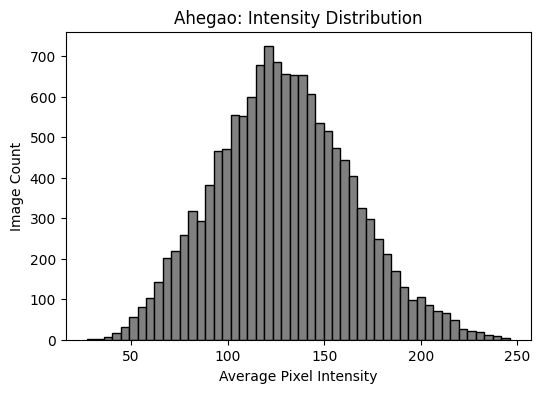

Samples for Ahegao at quantiles [0.05, 0.25, 0.5, 0.75, 0.95]:
  0.05: lol448~ahegao_rot2_bright1.png -> mean intensity 71.71
  0.25: lol681~ahegao_rot2.png -> mean intensity 104.62
  0.5: cropped_emotions.188841~ahegao_rot2_con1.png -> mean intensity 127.89
  0.75: lol752~ahegao_rot1_bright1.png -> mean intensity 152.68
  0.95: lol57~ahegao_con1.png -> mean intensity 189.29


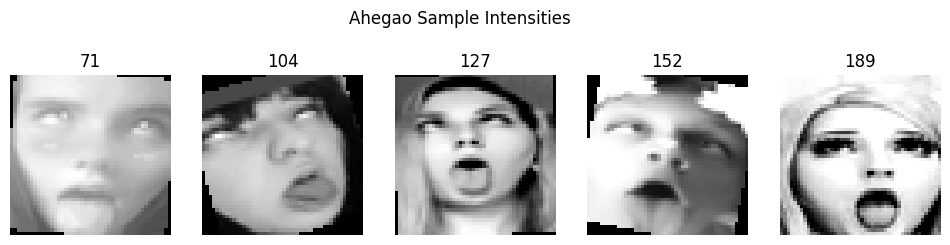

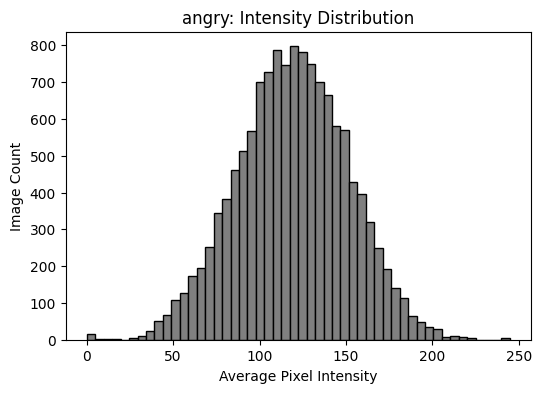

Samples for angry at quantiles [0.05, 0.25, 0.5, 0.75, 0.95]:
  0.05: Training_28884269_rot1.jpg -> mean intensity 65.54
  0.25: PublicTest_31362928.jpg -> mean intensity 97.82
  0.5: Training_24539523.jpg -> mean intensity 119.21
  0.75: da8895d92ad51007edc59d87f92cadbd7e6c5241e02dc9798b68b82b~angry_rot1.jpg -> mean intensity 141.23
  0.95: Training_22321432_rot1.jpg -> mean intensity 171.30


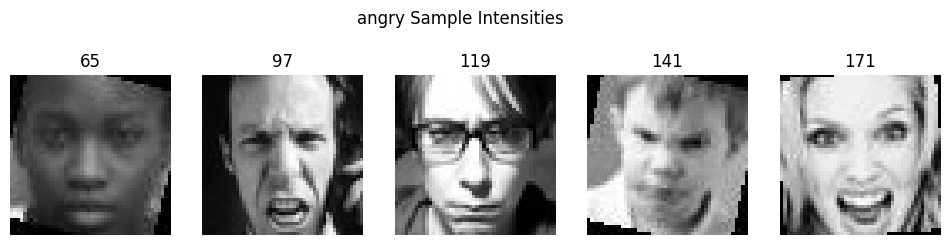

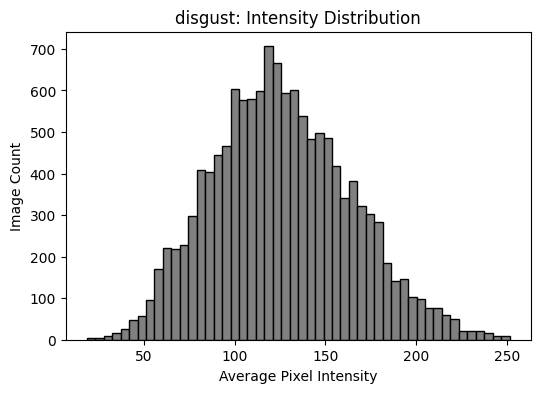

Samples for disgust at quantiles [0.05, 0.25, 0.5, 0.75, 0.95]:
  0.05: Training_20767880_rot2.jpg -> mean intensity 65.24
  0.25: PublicTest_78907529_rot1_con2_bright1.jpg -> mean intensity 99.11
  0.5: Training_76925085_rot2_con1.jpg -> mean intensity 123.64
  0.75: Training_43960078_rot2.jpg -> mean intensity 151.70
  0.95: PublicTest_75935933_con1.jpg -> mean intensity 192.43


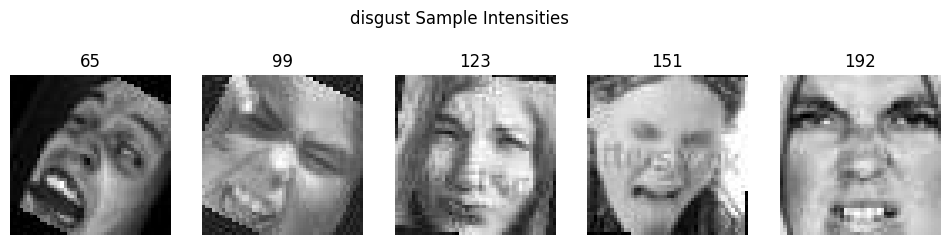

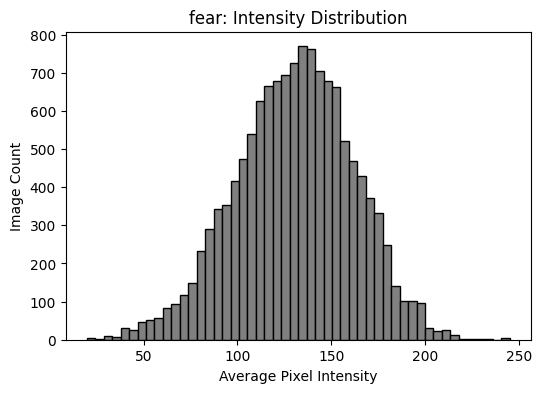

Samples for fear at quantiles [0.05, 0.25, 0.5, 0.75, 0.95]:
  0.05: PrivateTest_63058159.jpg -> mean intensity 77.73
  0.25: Training_687294_rot1.jpg -> mean intensity 109.58
  0.5: PublicTest_78041636_con1.jpg -> mean intensity 131.66
  0.75: Training_35132157.jpg -> mean intensity 152.36
  0.95: Training_68125686.jpg -> mean intensity 179.76


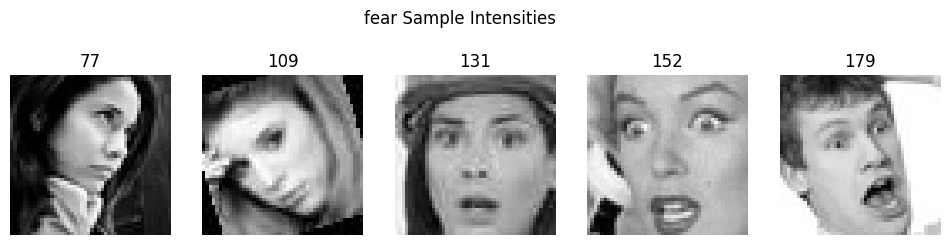

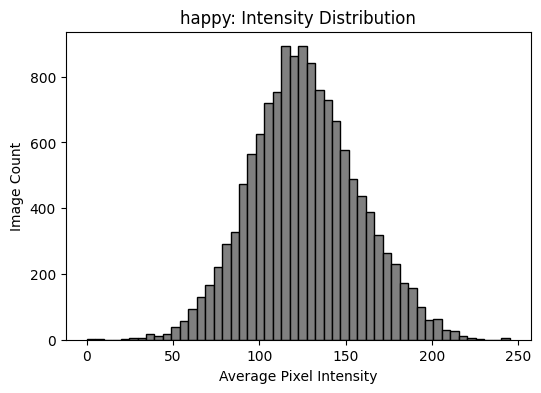

Samples for happy at quantiles [0.05, 0.25, 0.5, 0.75, 0.95]:
  0.05: Training_71568431.jpg -> mean intensity 76.68
  0.25: 00c6a7f4efd6d9eea8503997b51a130eda3173b78da84eb19e3622c0.jpg -> mean intensity 105.17
  0.5: Training_49565953.jpg -> mean intensity 124.87
  0.75: Training_60154771.jpg -> mean intensity 146.50
  0.95: Training_39238386.jpg -> mean intensity 180.18


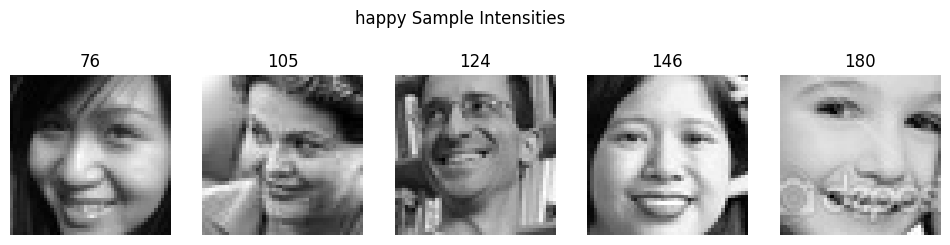

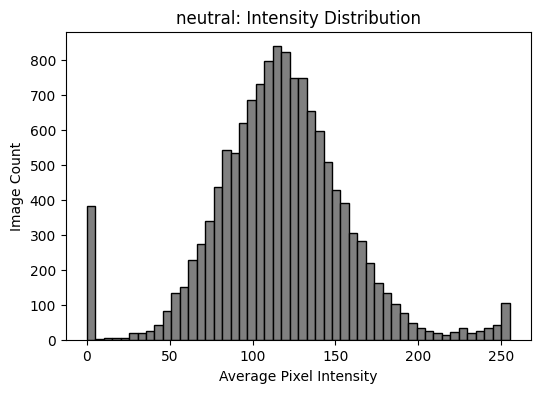

Samples for neutral at quantiles [0.05, 0.25, 0.5, 0.75, 0.95]:
  0.05: Training_21689607.jpg -> mean intensity 54.32
  0.25: cropped_emotions.171725f_rot1.png -> mean intensity 92.87
  0.5: cropped_emotions.277790f.png -> mean intensity 116.31
  0.75: Training_57265311.jpg -> mean intensity 139.98
  0.95: Training_58967148.jpg -> mean intensity 180.57


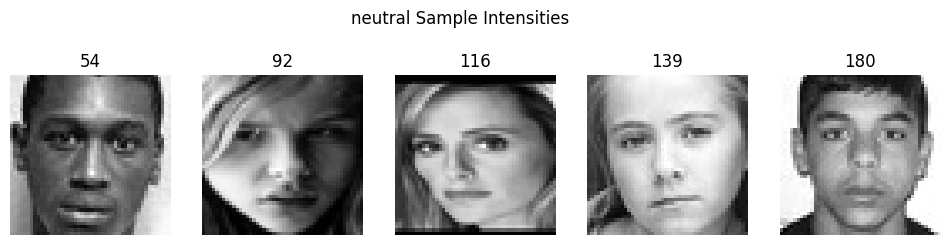

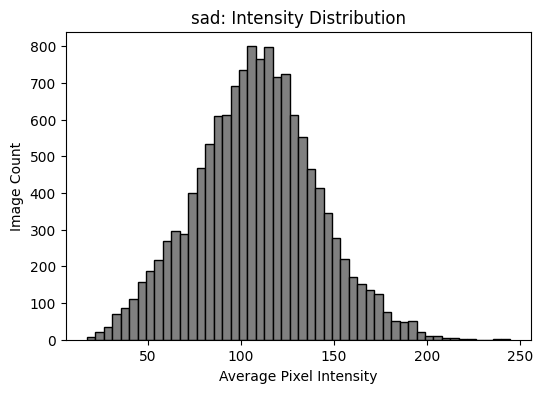

Samples for sad at quantiles [0.05, 0.25, 0.5, 0.75, 0.95]:
  0.05: cropped_emotions.499233.png -> mean intensity 53.45
  0.25: 1a153bd10817db16bf4614f692c614847fdeff629558b7a3bc40c6aa_rot1.jpg -> mean intensity 86.86
  0.5: 6e730fc43c142708aee9d998b6d022ed1ae06b7b8a029666737a040a_rot1.jpg -> mean intensity 108.44
  0.75: PublicTest_92653992.jpg -> mean intensity 129.37
  0.95: PublicTest_57708094_con1.jpg -> mean intensity 163.38


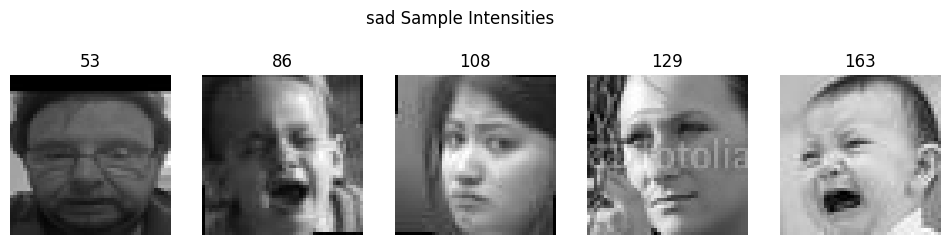

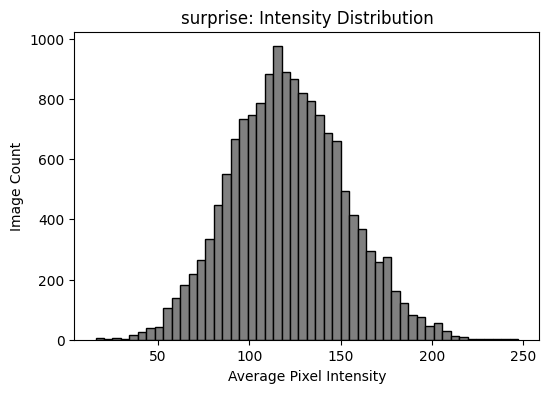

Samples for surprise at quantiles [0.05, 0.25, 0.5, 0.75, 0.95]:
  0.05: cropped_emotions.264140~12fffff.png -> mean intensity 70.87
  0.25: cropped_emotions.414934~12fffff_rot2_rot1.png -> mean intensity 99.55
  0.5: cropped_emotions.265003~12fffff.png -> mean intensity 120.27
  0.75: PublicTest_64479147_rot2_rot1.jpg -> mean intensity 142.09
  0.95: PrivateTest_15523257_rot2.jpg -> mean intensity 174.59


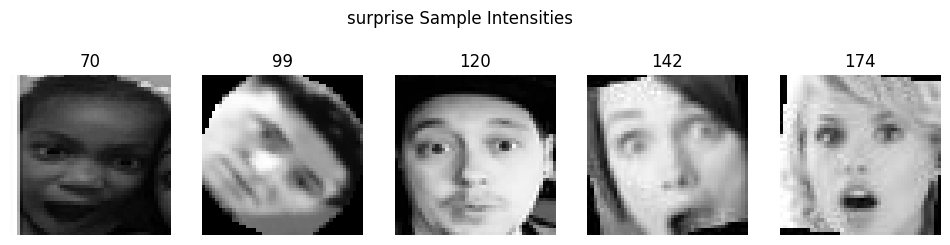

In [7]:
analyze_intensity_distribution()


=== Ahegao ===
Lowest 5 intensity images:
  lol461~ahegao_bright1.png: 27.06
  lol547~ahegao_rot1_bright1.png: 30.89
  lol461~ahegao_rot2_con1_bright1.png: 32.58
  lol547~ahegao_con1_bright1.png: 35.30
  lol785~ahegao_rot1_con1_bright1.png: 36.39
Highest 5 intensity images:
  lol61~ahegao_con1_bright1.png: 245.91
  cropped_emotions.51583~ahegao_bright1.png: 244.44
  cropped_emotions.188663~ahegao_bright1.png: 243.19
  cropped_emotions.34718~ahegao_bright1.png: 242.57
  lol579~ahegao_rot1_con1_bright1.png: 241.54


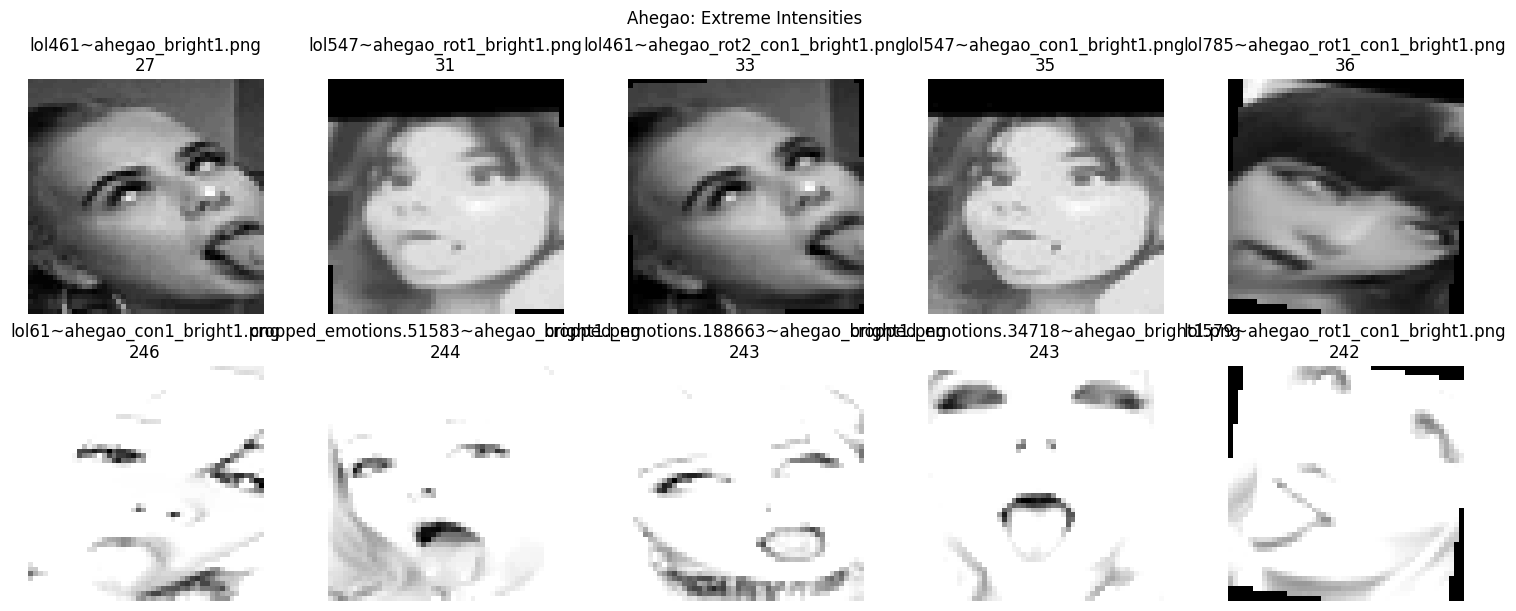


=== angry ===
Lowest 5 intensity images:
  PublicTest_5543497.jpg: 0.00
  PublicTest_5543497_rot1.jpg: 0.00
  Training_10131352.jpg: 0.00
  Training_10131352_rot1.jpg: 0.00
  Training_28756096.jpg: 0.00
Highest 5 intensity images:
  Training_87875595.jpg: 244.68
  PrivateTest_26784100.jpg: 243.49
  Training_67604214.jpg: 240.88
  Training_93307158.jpg: 240.86
  PrivateTest_24139016.jpg: 223.69


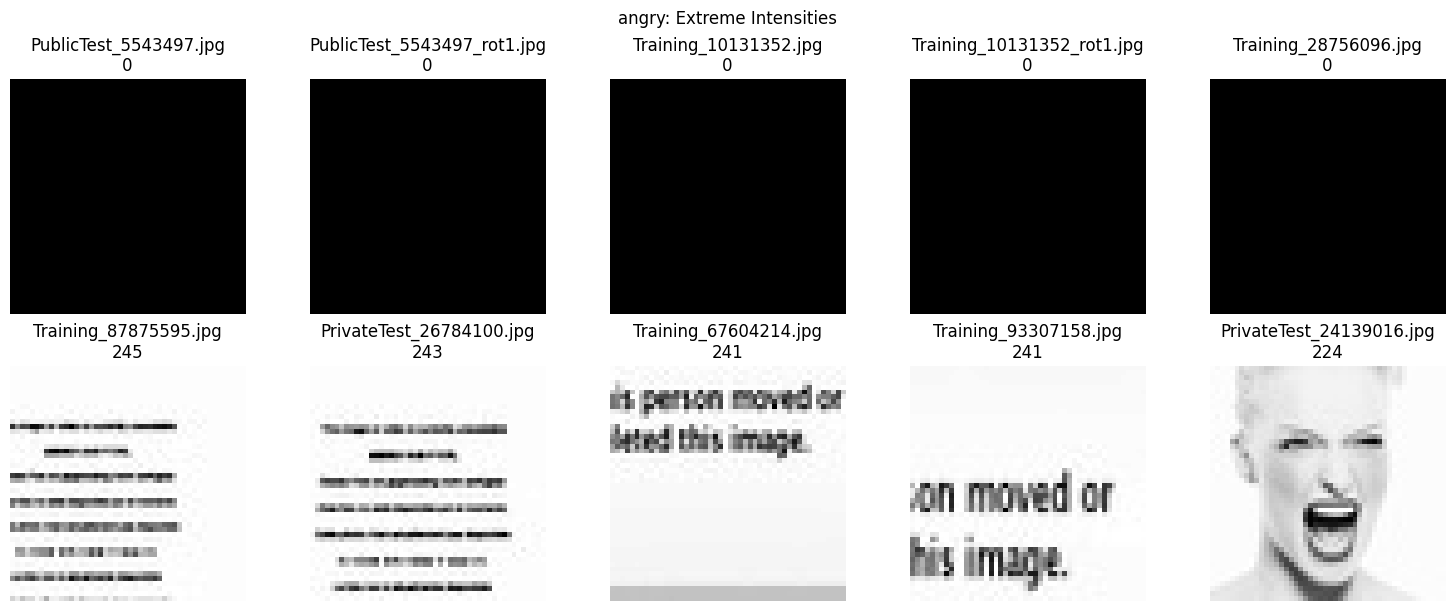


=== disgust ===
Lowest 5 intensity images:
  Training_62239274_rot2_bright1.jpg: 18.46
  Training_62239274_rot3_bright1.jpg: 18.92
  Training_62239274_rot1_bright1.jpg: 20.76
  Training_62239274_bright1.jpg: 22.76
  Training_62239274_rot1_con1_bright1.jpg: 23.61
Highest 5 intensity images:
  Training_64347942_rot2_bright1.jpg: 251.47
  Training_36703585_con1_bright1.jpg: 250.82
  Training_64347942_bright1.jpg: 250.79
  Training_17705855_con1_bright1.jpg: 250.39
  Training_42657020_bright1.jpg: 249.89


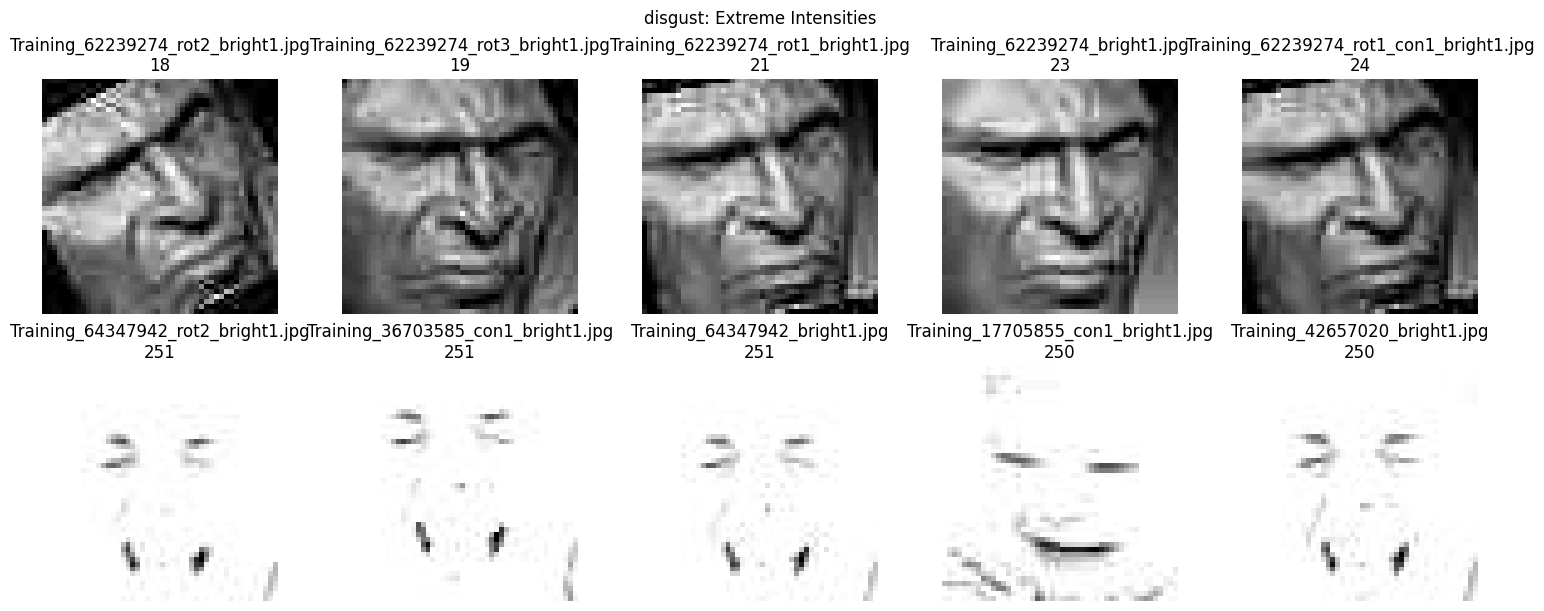


=== fear ===
Lowest 5 intensity images:
  Training_19304002_rot1_con1.jpg: 19.66
  Training_19304002_rot1.jpg: 20.31
  Training_19304002.jpg: 22.16
  Training_65365689_rot1.jpg: 22.46
  Training_42781717_rot1.jpg: 24.15
Highest 5 intensity images:
  Training_75260133.jpg: 245.02
  Training_1018372.jpg: 242.34
  Training_1018372_con1.jpg: 241.39
  PrivateTest_65872116.jpg: 240.95
  Training_62764355.jpg: 235.35


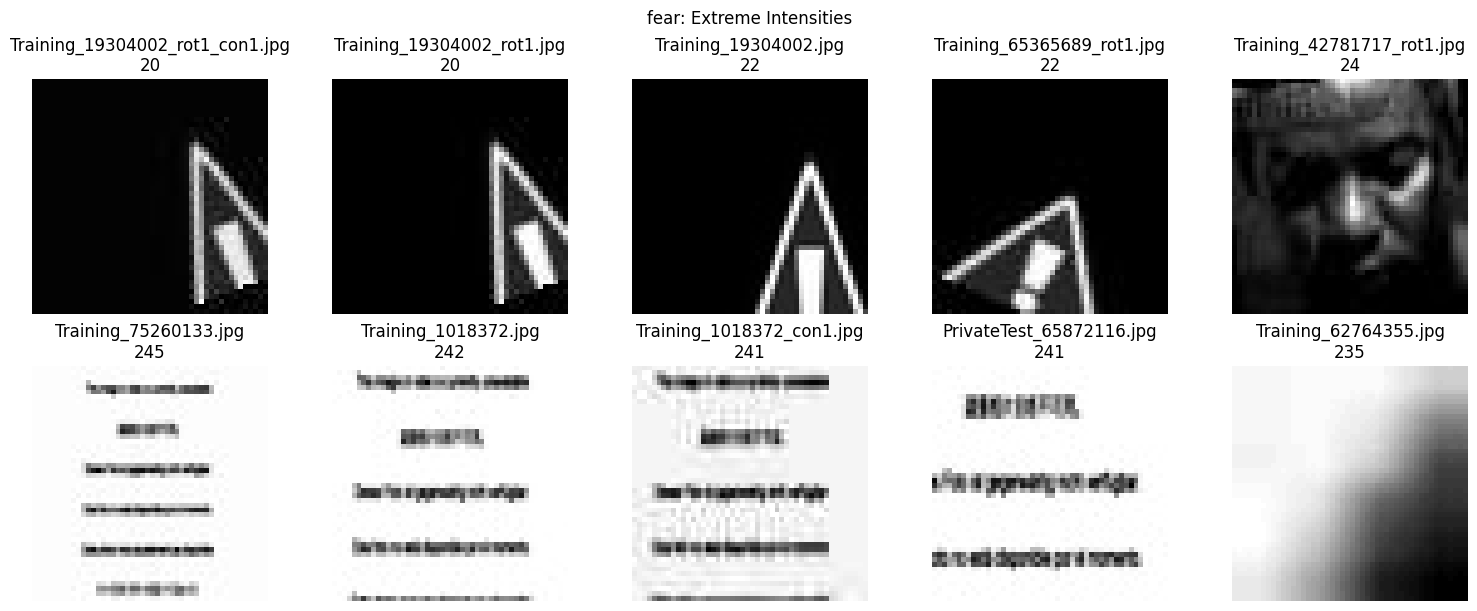


=== happy ===
Lowest 5 intensity images:
  Training_87607167.jpg: 0.00
  PublicTest_21832858.jpg: 5.07
  Training_19307133.jpg: 8.64
  PrivateTest_4871052.jpg: 19.94
  cropped_emotions.506097.png: 26.72
Highest 5 intensity images:
  Training_30373500.jpg: 244.84
  Training_13969968.jpg: 244.22
  Training_79595939.jpg: 243.13
  Training_62231267.jpg: 241.76
  Training_33313497.jpg: 241.66


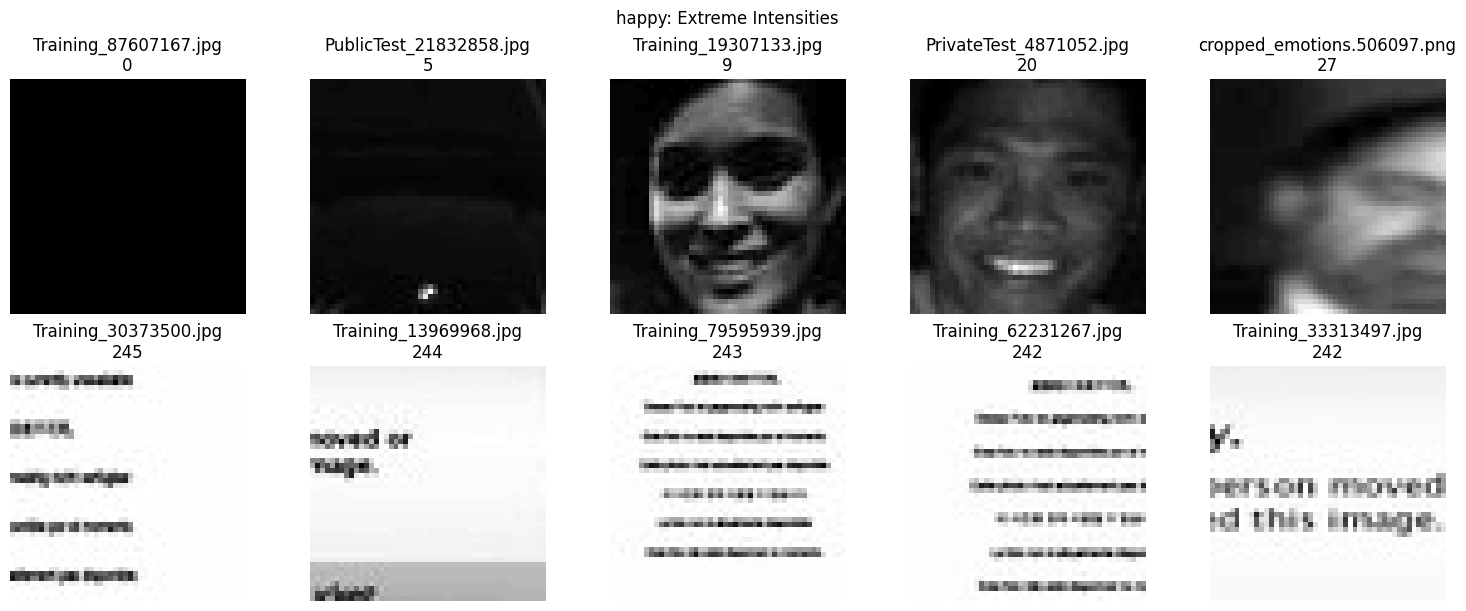


=== neutral ===
Lowest 5 intensity images:
  00aab737f46ad7b56b0a77cb2a2f6d6dfd2532302e3803e0e6a4244cf_rot1_bright1.jpg: 0.00
  00b6d6cccd570d1ac06219aec65fb4c667760e645db8e074c7dac0adf_rot1_bright1.JPG: 0.00
  00b79ac8682465afe81f47602eebb127d734ef56e9cbff3a1587d8d2f_bright1.jpg: 0.00
  00bc1854acef141bf0d0cc28fa1e13ca5dc4daf6b961a5b248fb3b2ff_bright1.jpg: 0.00
  00d3aeac29d4ad3abe69530f37d8f4e5c348aa0db5527ccfbaab20fbf_rot1_bright1.jpg: 0.00
Highest 5 intensity images:
  Training_48177454_bright1.jpg: 255.00
  Training_40407129_con1_bright1.jpg: 255.00
  Training_39467282_bright1.jpg: 255.00
  Training_26269032_con1_bright1.jpg: 255.00
  Training_25518250_bright1.jpg: 255.00


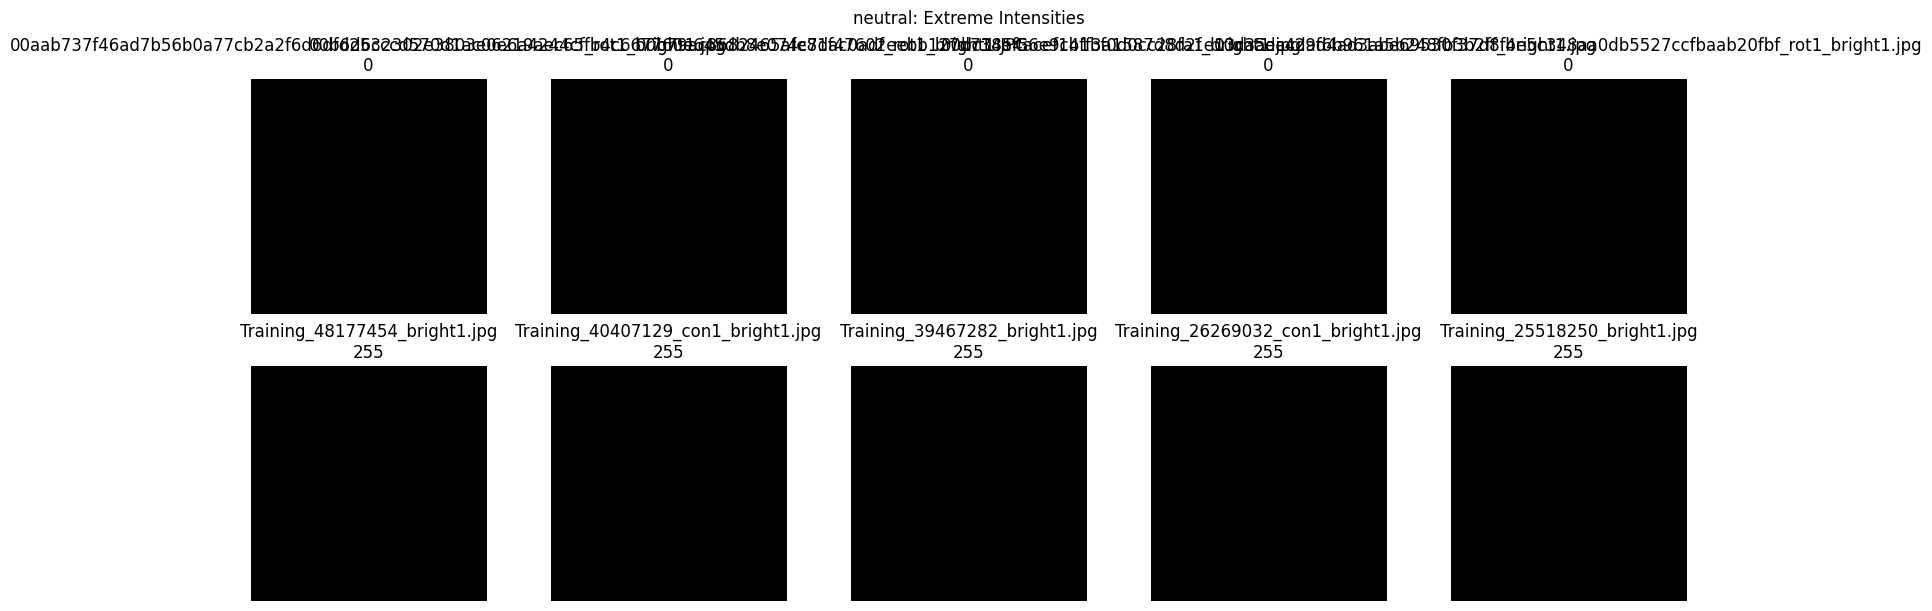


=== sad ===
Lowest 5 intensity images:
  5c685d82d0bb73ee91e12660f542b39537f4f4a3b266c89da7c7b3fb_rot1.png: 17.30
  PublicTest_75763309_rot1.jpg: 18.33
  PublicTest_75763309_rot1_con1.jpg: 18.68
  5c685d82d0bb73ee91e12660f542b39537f4f4a3b266c89da7c7b3fb.png: 18.83
  PublicTest_75763309.jpg: 20.49
Highest 5 intensity images:
  PrivateTest_82792706.jpg: 244.29
  PublicTest_83014731.jpg: 236.89
  PrivateTest_82792706_rot1.jpg: 224.29
  PublicTest_19663674.jpg: 219.53
  PublicTest_19663674_rot1.jpg: 217.74


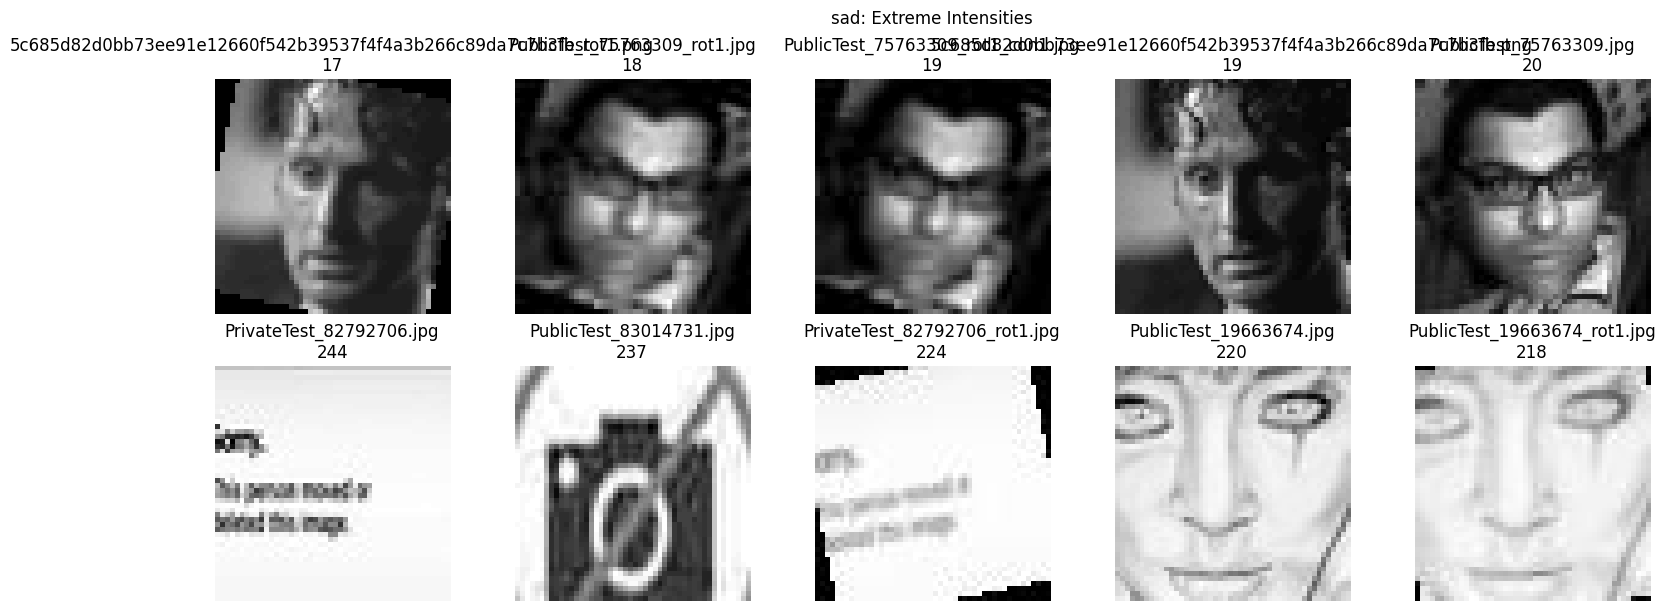


=== surprise ===
Lowest 5 intensity images:
  PublicTest_53795000_rot2_con1_rot1.jpg: 15.78
  PublicTest_53795000_rot2_con1.jpg: 16.54
  PublicTest_53795000.jpg: 17.02
  PublicTest_53795000_rot2.jpg: 17.16
  PublicTest_53795000_rot1.jpg: 17.18
Highest 5 intensity images:
  PrivateTest_94417003_bright1.jpg: 247.23
  PublicTest_15712657_bright1.jpg: 246.12
  PrivateTest_57200649.jpg: 244.81
  PublicTest_5954279_con1_bright1.jpg: 242.05
  PublicTest_34645495_bright1.jpg: 237.72


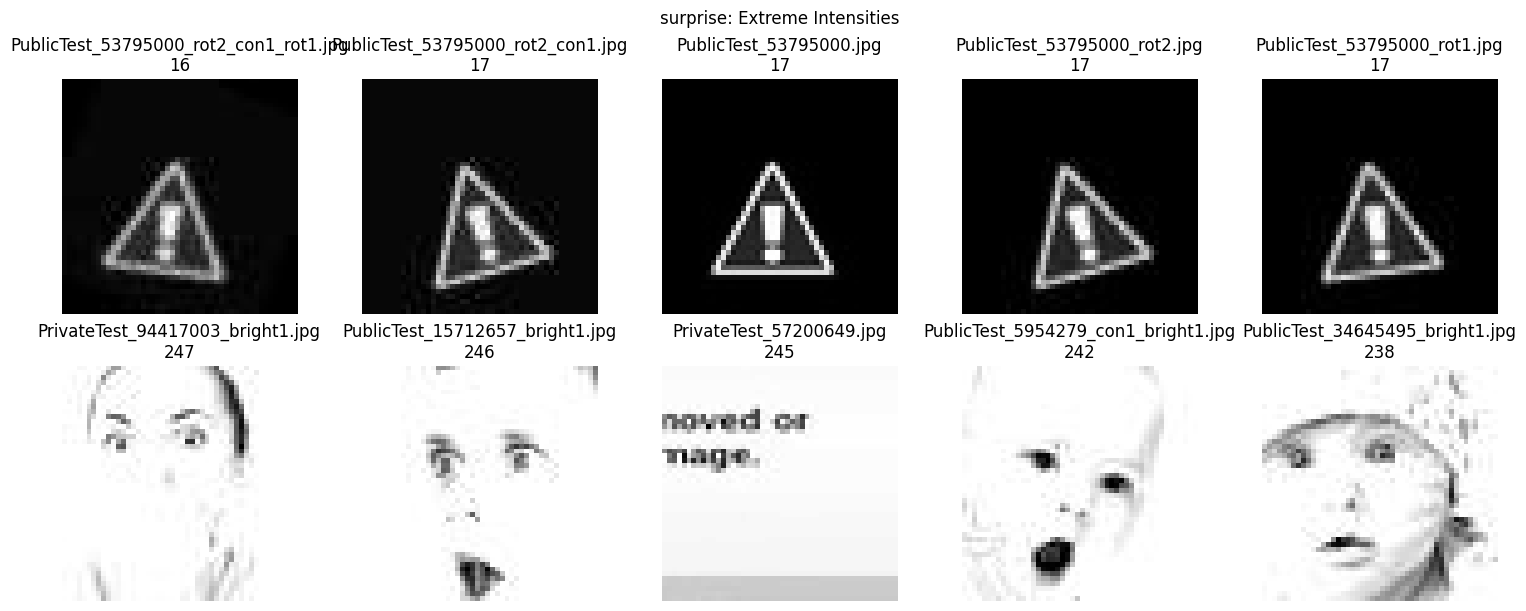

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_extreme_intensity_images(
    input_dir='path_to/images',
    num_extremes=5
):
    """
    For each subfolder in input_dir:
      - computes per-image average intensity
      - sorts them
      - prints filenames + mean intensity of the num_extremes lowest/highest
      - displays those images (low on first row, high on second)
    """
    for label in os.listdir(input_dir):
        folder = os.path.join(input_dir, label)
        if not os.path.isdir(folder):
            continue

        # collect (fname, mean_intensity)
        intensities = []
        for fname in os.listdir(folder):
            if not fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                continue
            path = os.path.join(folder, fname)
            try:
                img = Image.open(path).convert('L')
                mean_int = np.array(img).mean()
                intensities.append((fname, mean_int))
            except Exception as e:
                print(f"  Skipping {fname}: {e}")

        if not intensities:
            print(f"No images found in {label}")
            continue

        # sort and split extremes
        intensities.sort(key=lambda x: x[1])
        lows = intensities[:num_extremes]
        highs = intensities[-num_extremes:]

        # print out
        print(f"\n=== {label} ===")
        print(f"Lowest {num_extremes} intensity images:")
        for fname, intensity in lows:
            print(f"  {fname}: {intensity:.2f}")
        print(f"Highest {num_extremes} intensity images:")
        for fname, intensity in highs[::-1]:
            print(f"  {fname}: {intensity:.2f}")

        # display them
        fig, axes = plt.subplots(2, num_extremes,
                                 figsize=(num_extremes * 3, 6),
                                 constrained_layout=True)
        for i, (fname, intensity) in enumerate(lows):
            img = Image.open(os.path.join(folder, fname)).convert('L')
            ax = axes[0, i]
            ax.imshow(img, cmap='gray')
            ax.set_title(f"{fname}\n{intensity:.0f}")
            ax.axis('off')

        for i, (fname, intensity) in enumerate(highs[::-1]):
            img = Image.open(os.path.join(folder, fname)).convert('L')
            ax = axes[1, i]
            ax.imshow(img, cmap='gray')
            ax.set_title(f"{fname}\n{intensity:.0f}")
            ax.axis('off')

        axes[0, 0].set_ylabel('Lowest')
        axes[1, 0].set_ylabel('Highest')
        fig.suptitle(f"{label}: Extreme Intensities")
        plt.show()


# Example usage
if __name__ == "__main__":
    display_extreme_intensity_images()


=== Folder: Ahegao ===

  Under 35 (3 images):
    lol461~ahegao_bright1.png: 27.06
    lol461~ahegao_rot2_con1_bright1.png: 32.58
    lol547~ahegao_rot1_bright1.png: 30.89


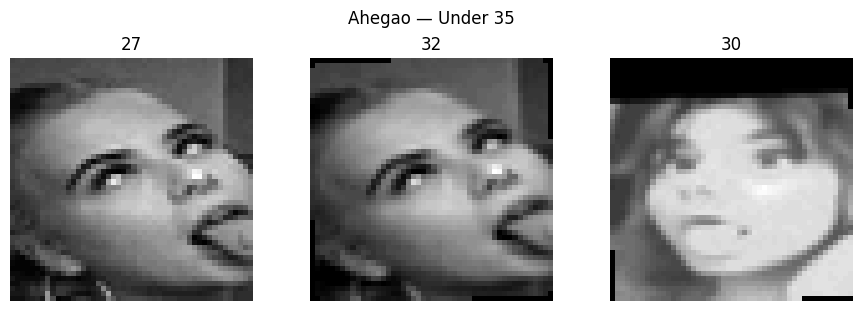


  Above 220 (91 images):
    cropped_emotions.16321~ahegao_bright1.png: 229.26
    cropped_emotions.16321~ahegao_con1_bright1.png: 223.34
    cropped_emotions.16630~ahegao_con1_bright1.png: 224.56
    cropped_emotions.17055~ahegao_bright1.png: 221.30
    cropped_emotions.188512~ahegao_con1_bright1.png: 222.88
    cropped_emotions.188663~ahegao_bright1.png: 243.19
    cropped_emotions.188812~ahegao_bright1.png: 230.40
    cropped_emotions.188812~ahegao_rot2_bright1.png: 232.86
    cropped_emotions.188876~ahegao_rot2_con1_bright1.png: 238.44
    cropped_emotions.189507~ahegao_bright1.png: 235.50
    cropped_emotions.189976~ahegao_con1_bright1.png: 226.24
    cropped_emotions.190344~ahegao_bright1.png: 227.94
    cropped_emotions.190344~ahegao_con1_bright1.png: 221.37
    cropped_emotions.190849~ahegao_con1_bright1.png: 233.29
    cropped_emotions.190849~ahegao_rot1_con1_bright1.png: 224.61
    cropped_emotions.191902~ahegao_con1_bright1.png: 221.01
    cropped_emotions.191967~ahegao_con

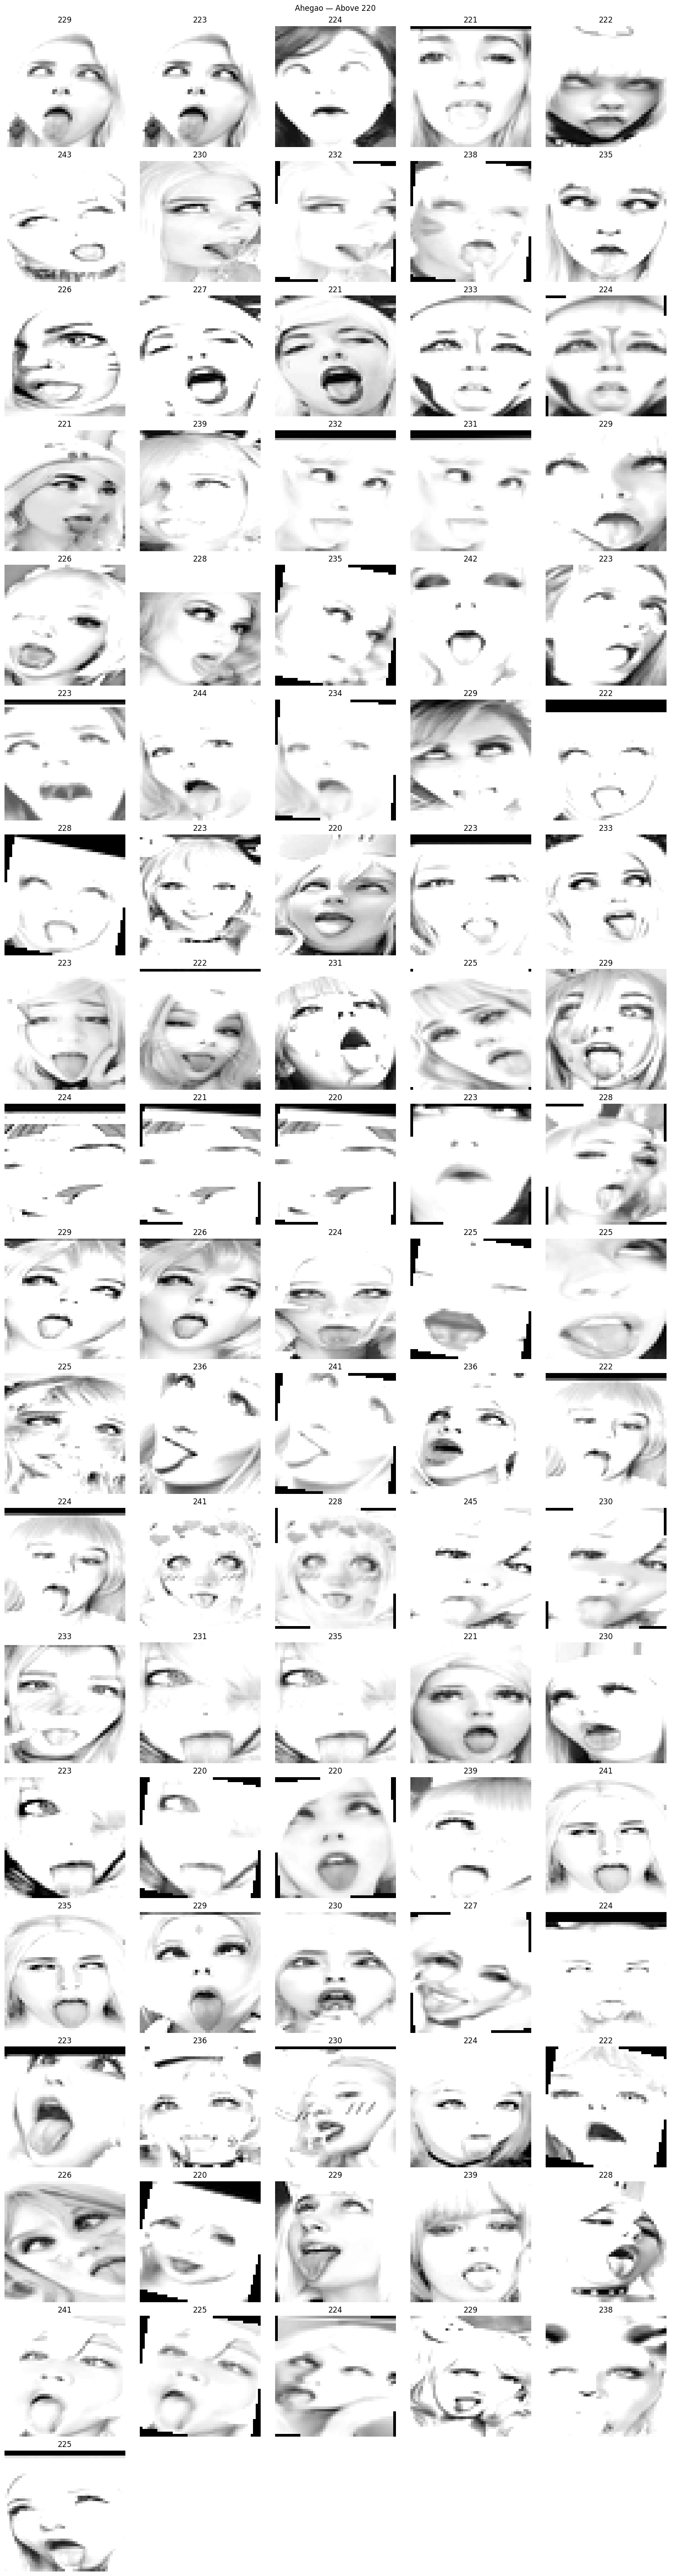


=== Folder: angry ===

  Under 35 (21 images):
    07f6dd6fe5f67db0e93ba3973a1192cad6324c7ba9c789c845f9f18f~angry.jpg: 31.01
    07f6dd6fe5f67db0e93ba3973a1192cad6324c7ba9c789c845f9f18f~angry_rot1.jpg: 27.88
    0a554a78571201f988a5182ab2227d3d00c7f6a36f240b5974231dde~angry_rot1.jpg: 34.67
    0fabf3a90120460ee1a1443c8547c229a4f620aed7ac5cda0530f2a3~angry_rot1.jpg: 34.57
    PublicTest_28415725.jpg: 34.51
    PublicTest_28415725_rot1.jpg: 33.69
    PublicTest_90129237_rot1.jpg: 32.86
    Training_1648016.jpg: 32.25
    Training_1648016_rot1.jpg: 30.49
    Training_3598867.jpg: 33.22
    Training_3598867_rot1.jpg: 32.12
    Training_48983108_rot1.jpg: 34.19
    Training_50609770.jpg: 19.44
    Training_50609770_rot1.jpg: 18.20
    Training_65780054.jpg: 25.30
    Training_65780054_rot1.jpg: 25.01
    Training_9243261_rot1.jpg: 33.09
    cropped_emotions.232144~angry.png: 32.05
    cropped_emotions.232144~angry_rot1.png: 29.24
    cropped_emotions.232336~angry.png: 30.20
    cropped_emo

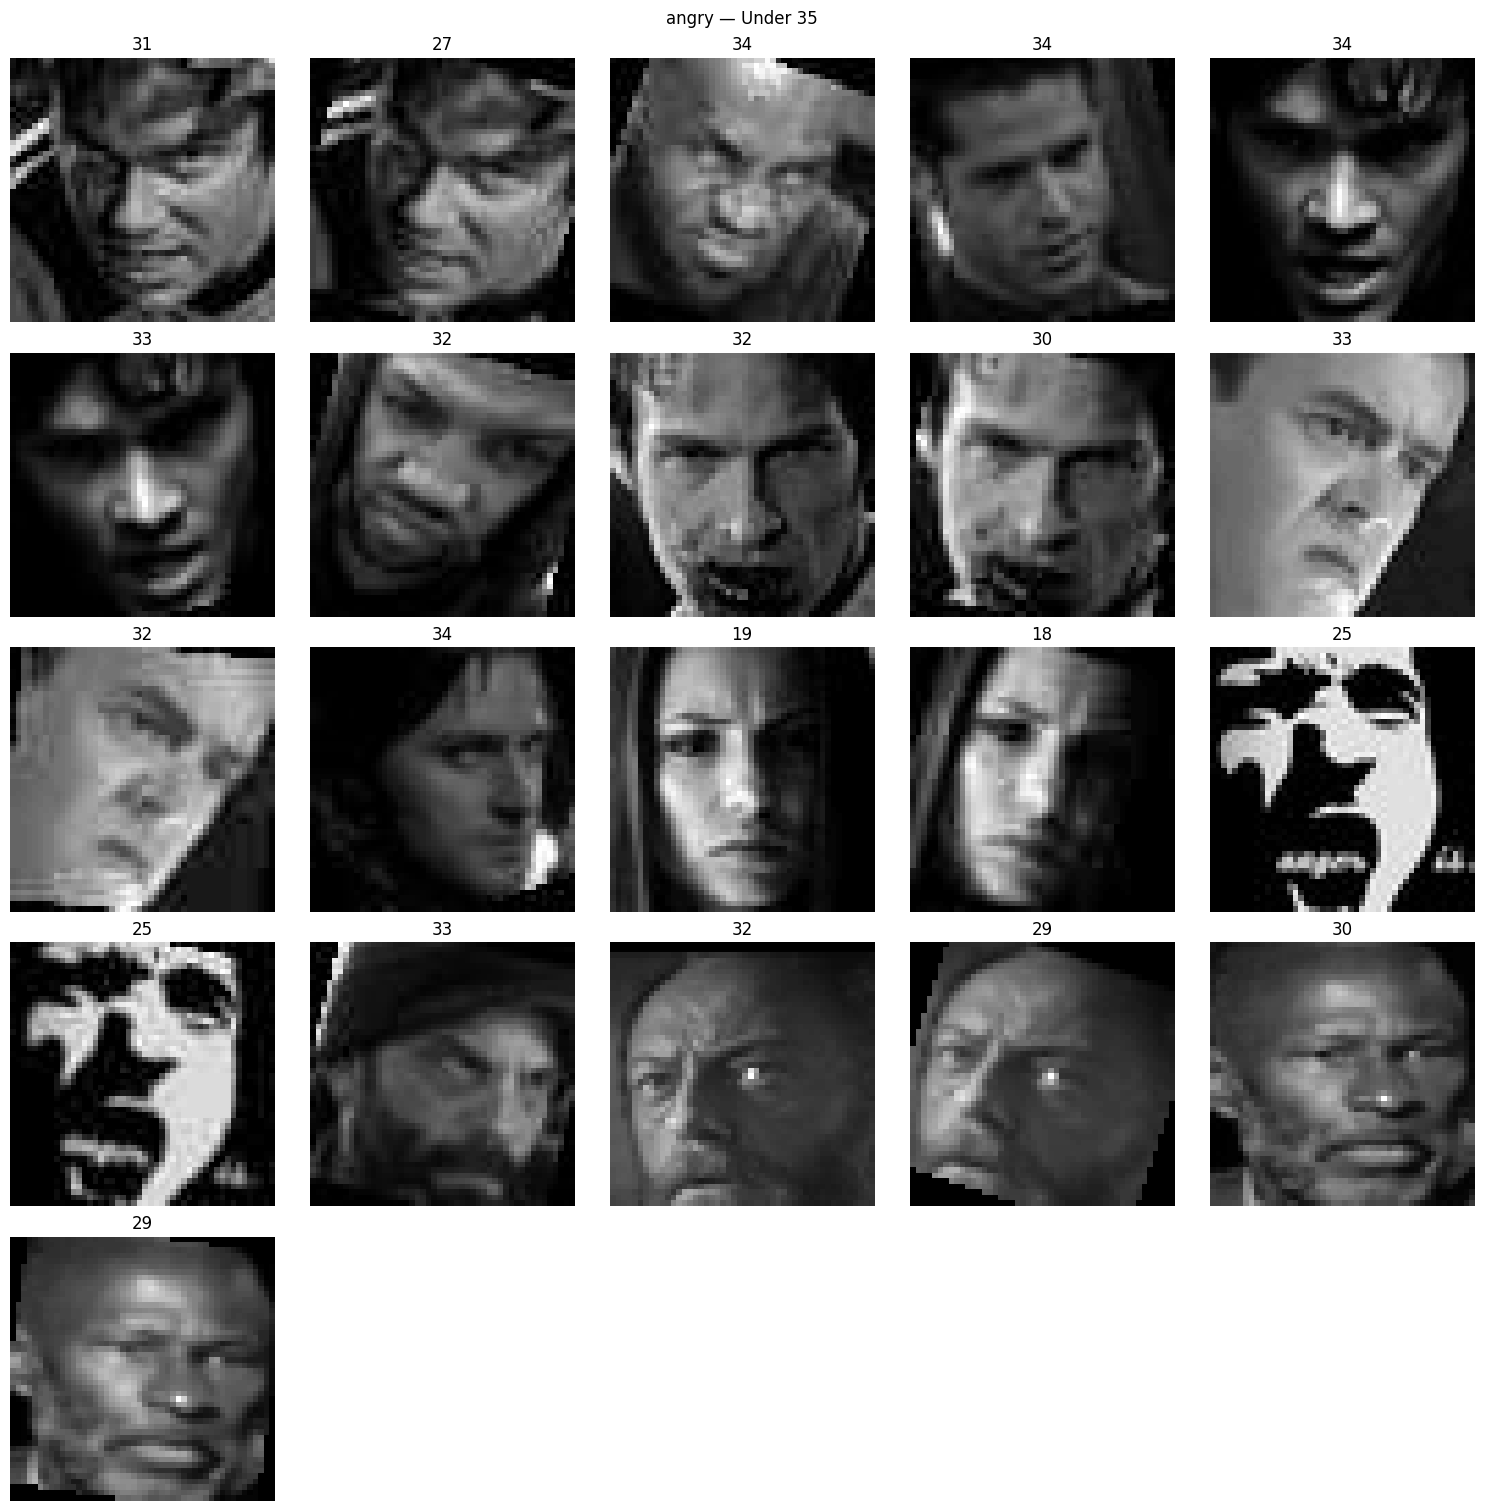


  Above 220 (6 images):
    PrivateTest_24139016.jpg: 223.69
    PrivateTest_68333170.jpg: 221.91
    PrivateTest_98403294.jpg: 221.08
    Training_51191080.jpg: 223.51
    Training_79674651.jpg: 222.70
    Training_88679295.jpg: 223.51


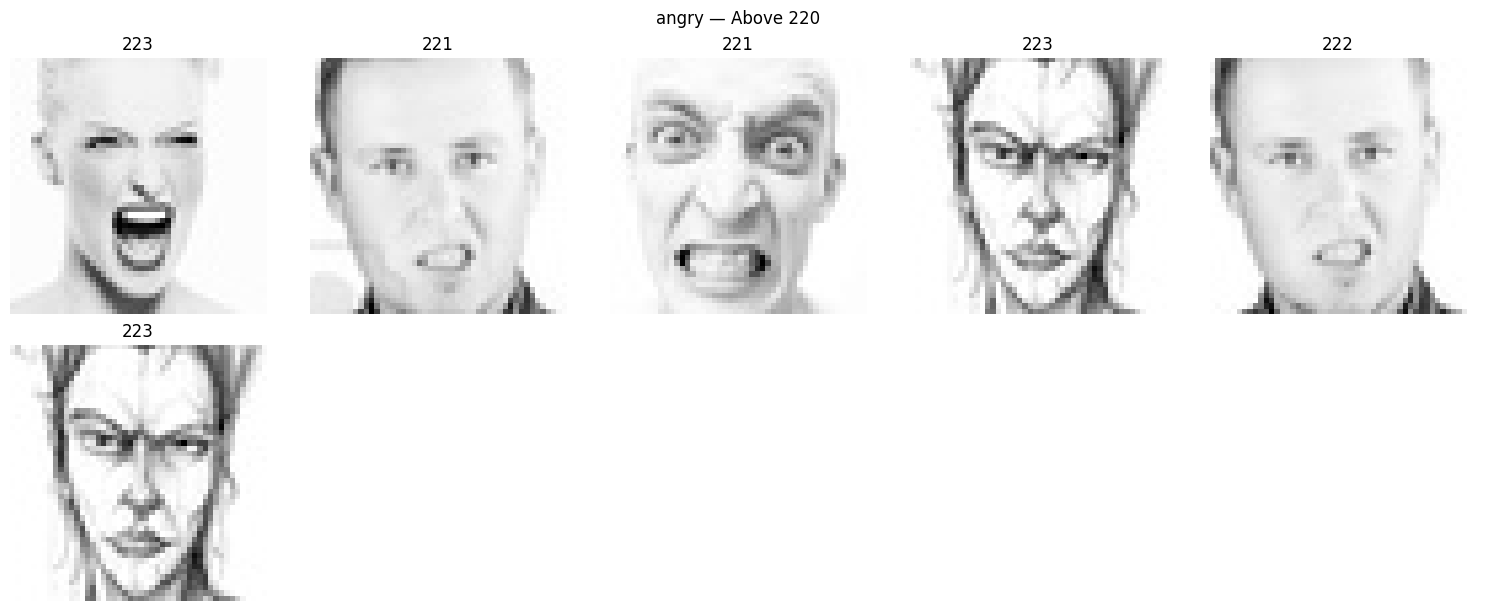


=== Folder: disgust ===

  Under 35 (28 images):
    Training_14064382_bright1.jpg: 30.18
    Training_14064382_rot3_con1_bright1.jpg: 33.58
    Training_55559187_bright1.jpg: 34.67
    Training_62239274.jpg: 34.61
    Training_62239274_bright1.jpg: 22.76
    Training_62239274_con1.jpg: 34.25
    Training_62239274_con2.jpg: 34.31
    Training_62239274_con2_bright1.jpg: 27.18
    Training_62239274_rot1.jpg: 32.31
    Training_62239274_rot1_bright1.jpg: 20.76
    Training_62239274_rot1_con1.jpg: 32.44
    Training_62239274_rot1_con1_bright1.jpg: 23.61
    Training_62239274_rot1_con2.jpg: 31.64
    Training_62239274_rot2.jpg: 30.11
    Training_62239274_rot2_bright1.jpg: 18.46
    Training_62239274_rot2_con1.jpg: 31.63
    Training_62239274_rot2_con1_bright1.jpg: 25.45
    Training_62239274_rot2_con2.jpg: 29.53
    Training_62239274_rot2_con2_bright1.jpg: 31.88
    Training_62239274_rot3.jpg: 34.07
    Training_62239274_rot3_bright1.jpg: 18.92
    Training_62239274_rot3_con1.jpg: 33.58
 

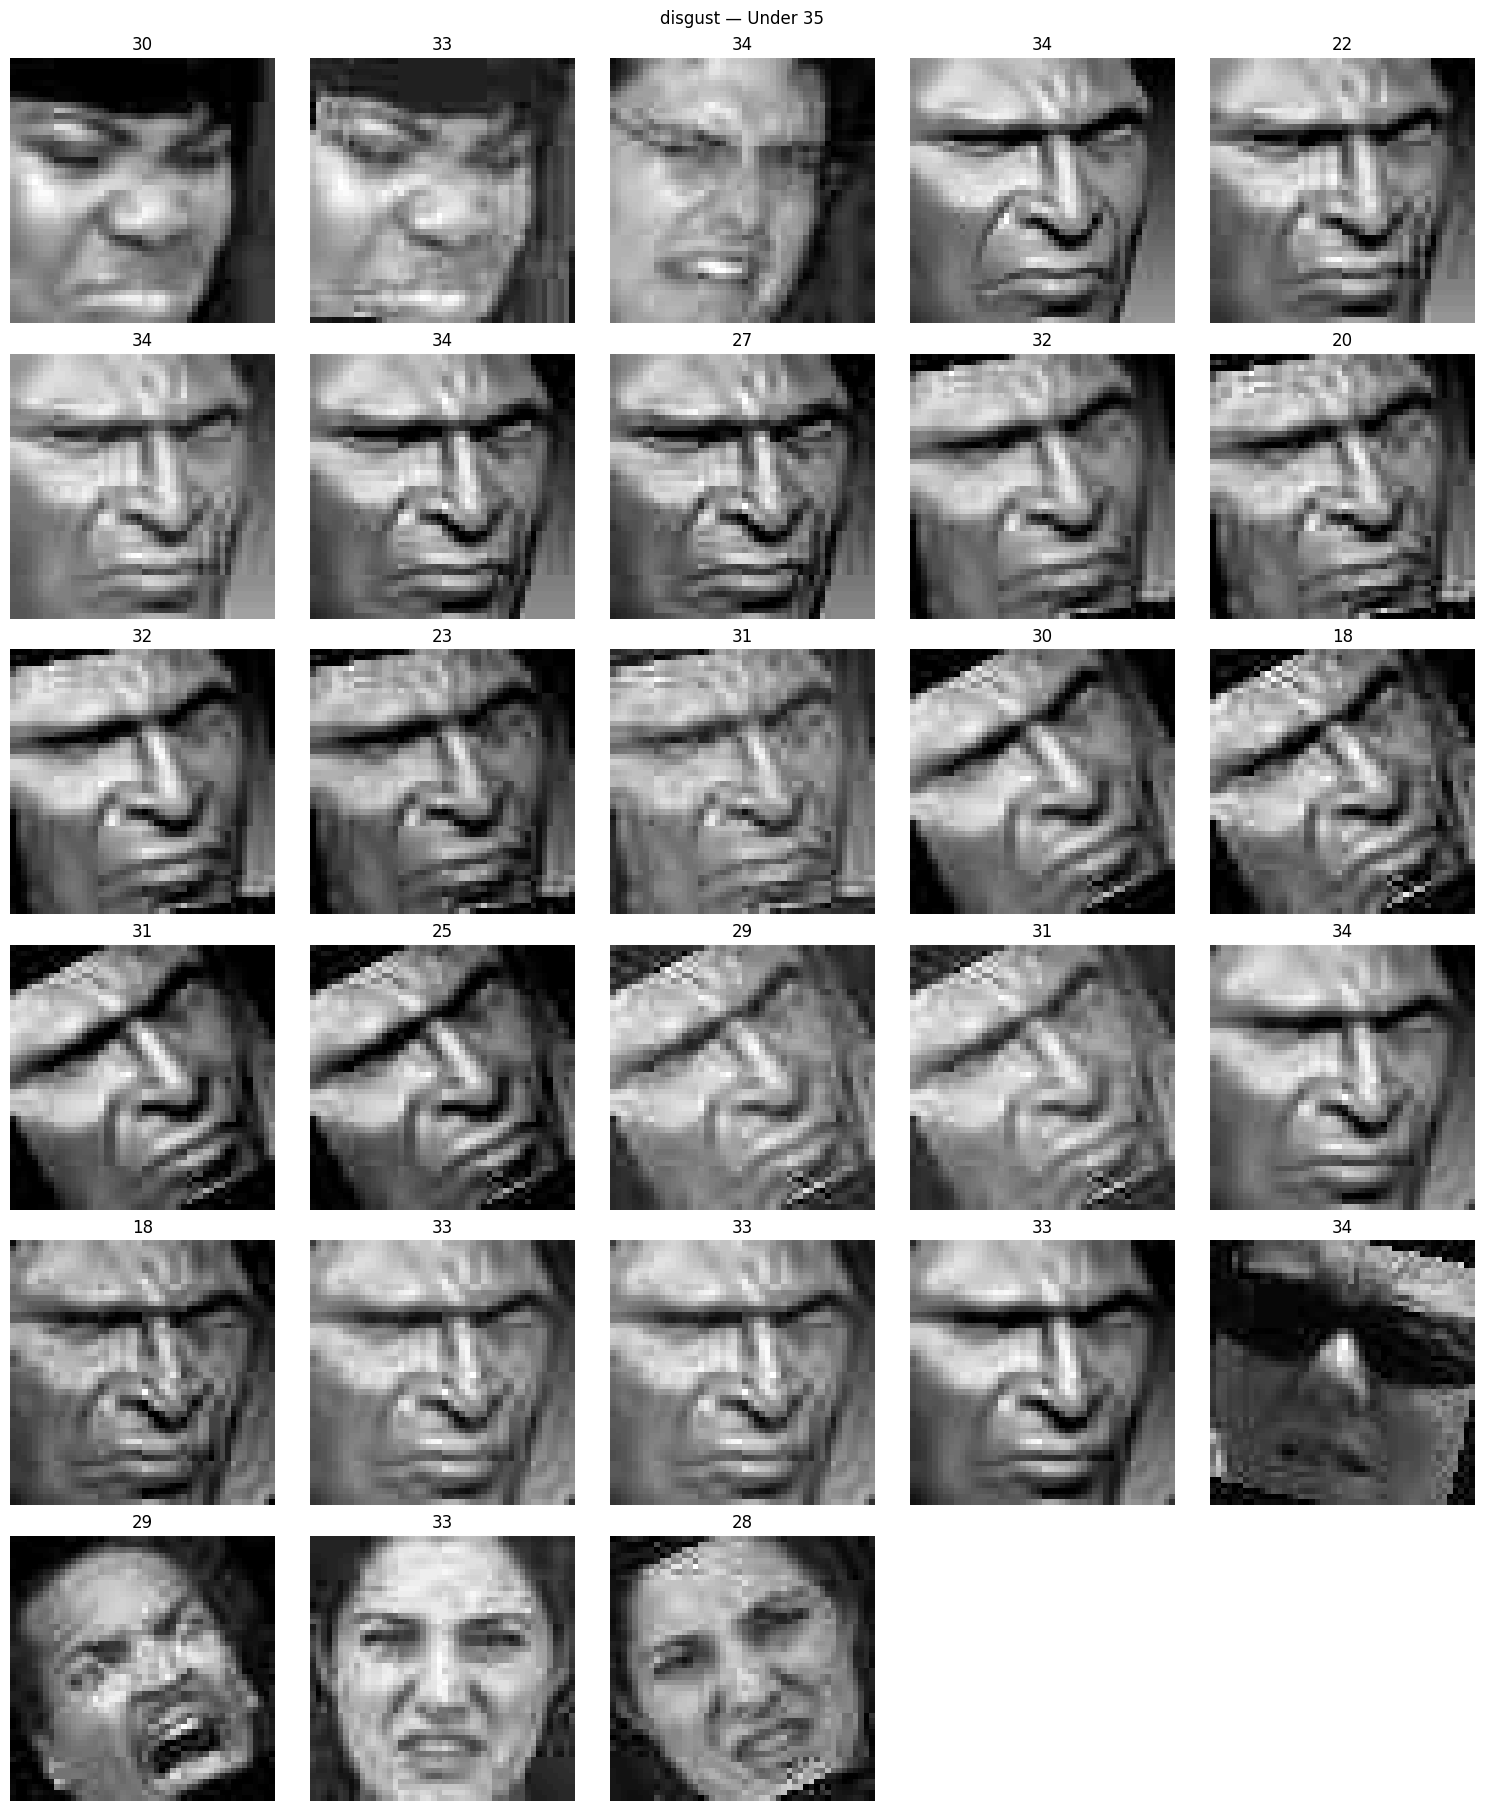


  Above 220 (116 images):
    PrivateTest_76656607_bright1.jpg: 239.06
    PrivateTest_76656607_con2_bright1.jpg: 228.45
    PrivateTest_84160446_bright1.jpg: 236.80
    PrivateTest_84160446_con1_bright1.jpg: 241.51
    PrivateTest_84160446_rot1_bright1.jpg: 220.06
    PrivateTest_95250268_bright1.jpg: 224.04
    PrivateTest_98799539_con1_bright1.jpg: 244.32
    PublicTest_35686619_con1_bright1.jpg: 232.35
    PublicTest_35686619_rot2_con1_bright1.jpg: 226.05
    PublicTest_41393563_rot1_con1_bright1.jpg: 230.75
    PublicTest_43293519_con1_bright1.jpg: 240.96
    PublicTest_57583458_bright1.jpg: 233.74
    PublicTest_57583458_rot1_con1_bright1.jpg: 221.32
    PublicTest_75935933_con2_bright1.jpg: 239.55
    PublicTest_84732279_bright1.jpg: 227.13
    PublicTest_84732279_con2_bright1.jpg: 220.79
    PublicTest_84732279_rot1_bright1.jpg: 222.65
    PublicTest_84732279_rot2_con1_bright1.jpg: 220.97
    PublicTest_84732279_rot3_bright1.jpg: 224.85
    PublicTest_97476336_con2_bright1.jpg

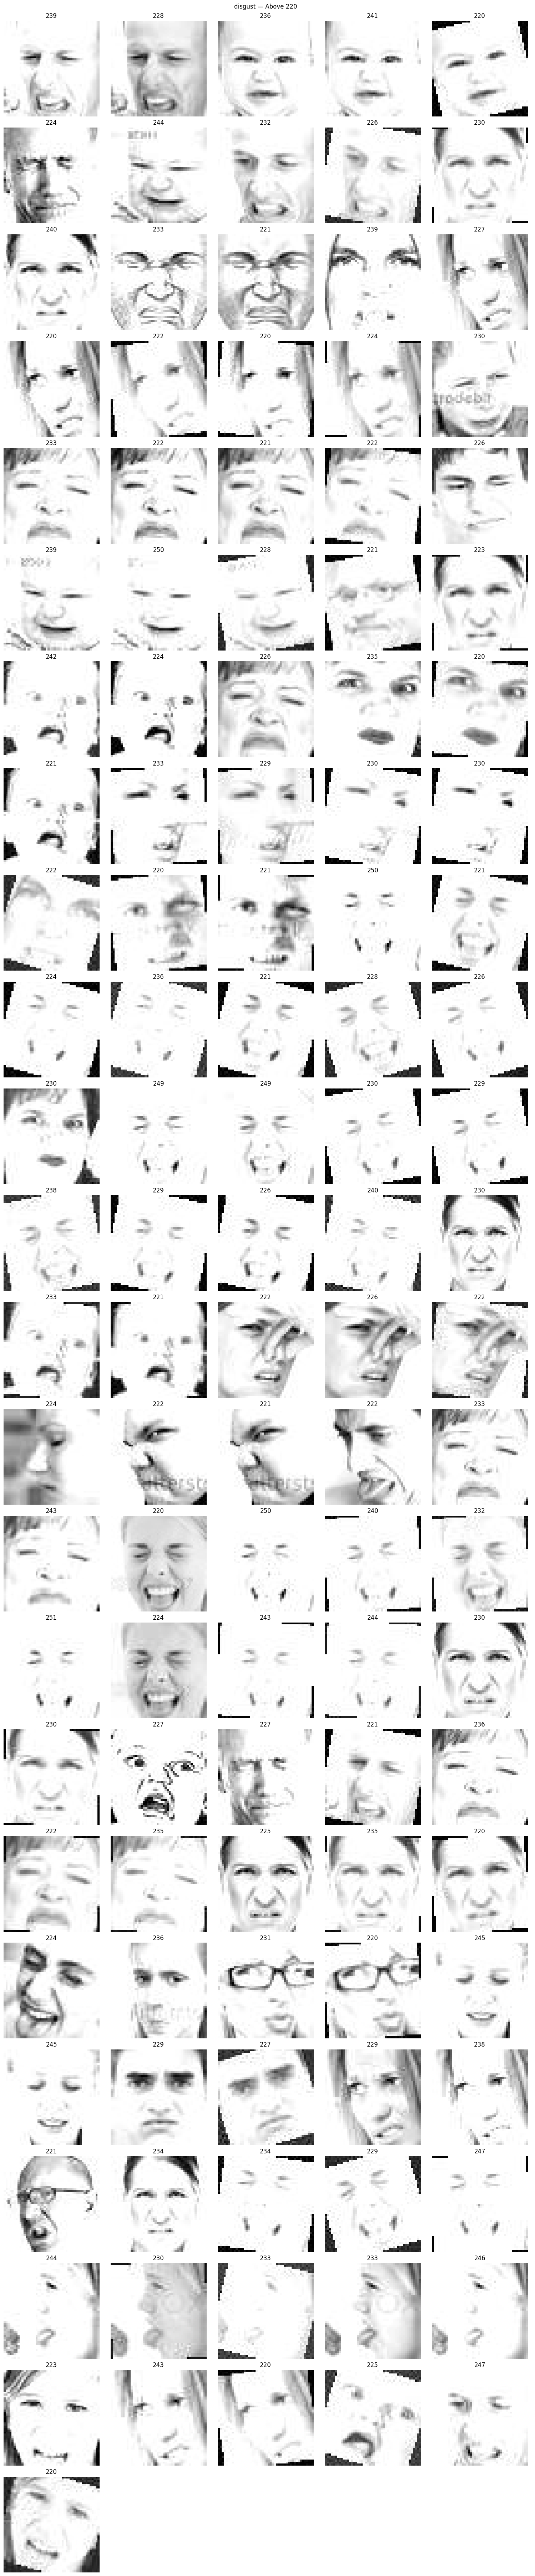


=== Folder: fear ===

  Under 35 (14 images):
    PrivateTest_66836766.jpg: 33.18
    PrivateTest_66836766_rot1.jpg: 33.11
    Training_13181629.jpg: 32.47
    Training_13181629_con1.jpg: 31.71
    Training_13181629_rot1.jpg: 28.28
    Training_35100459_rot1.jpg: 32.83
    Training_35100459_rot1_con1.jpg: 33.23
    Training_42781717.jpg: 25.92
    Training_42781717_rot1.jpg: 24.15
    Training_47676208.jpg: 32.59
    Training_47676208_rot1.jpg: 30.28
    Training_99283084.jpg: 34.14
    Training_99283084_rot1.jpg: 30.85
    Training_99283084_rot1_con1.jpg: 31.13


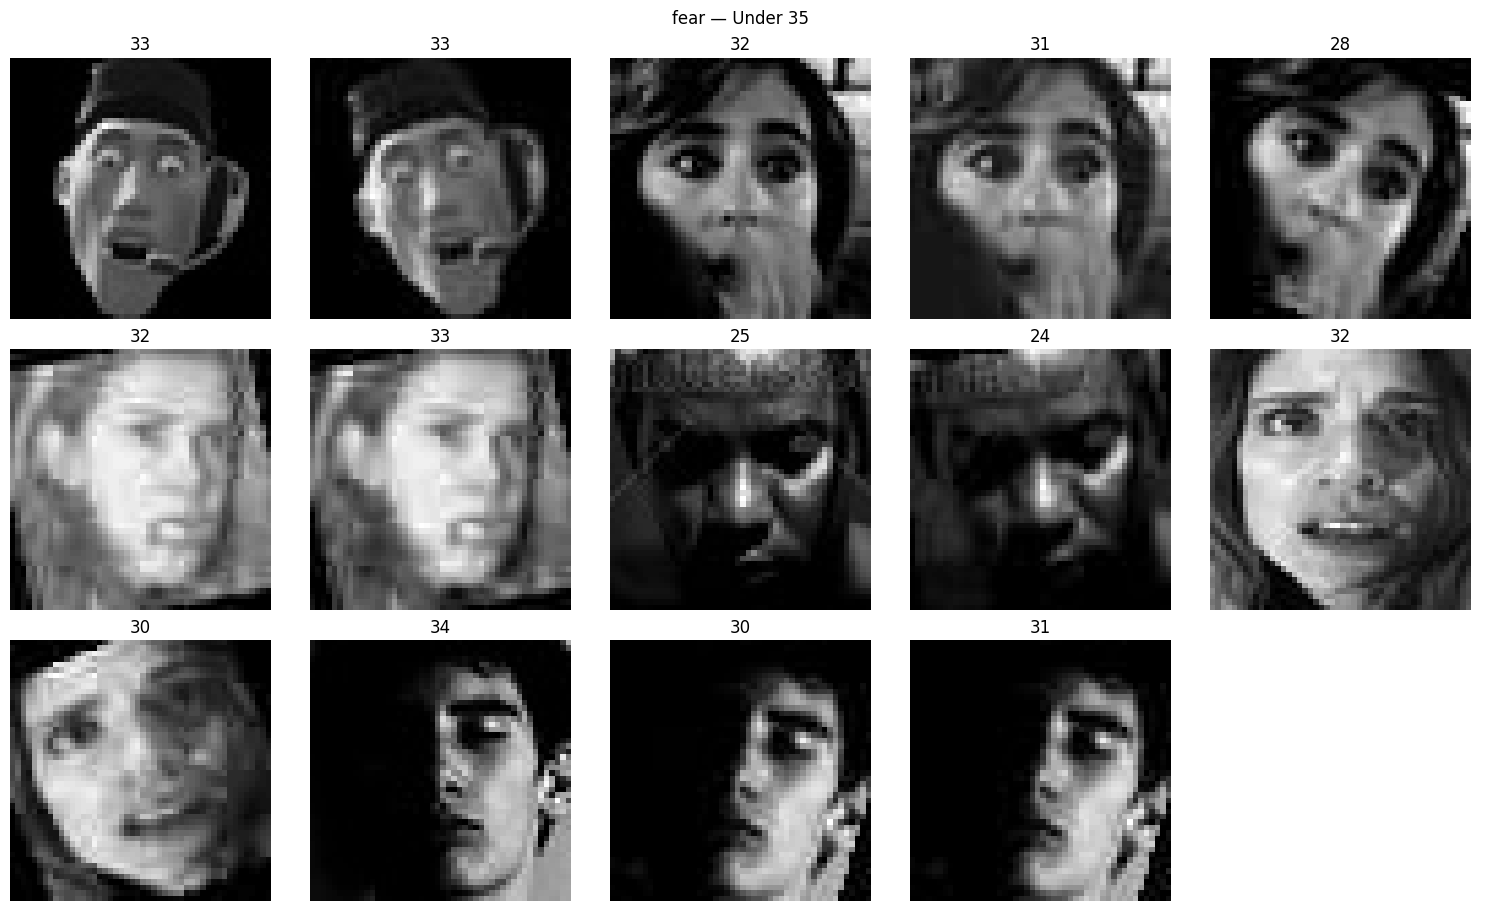


  Above 220 (5 images):
    Training_7180001.jpg: 225.37
    Training_81474503.jpg: 228.46
    Training_81474503_rot1.jpg: 227.92
    Training_90690028.jpg: 226.29
    Training_90690028_con1.jpg: 224.77


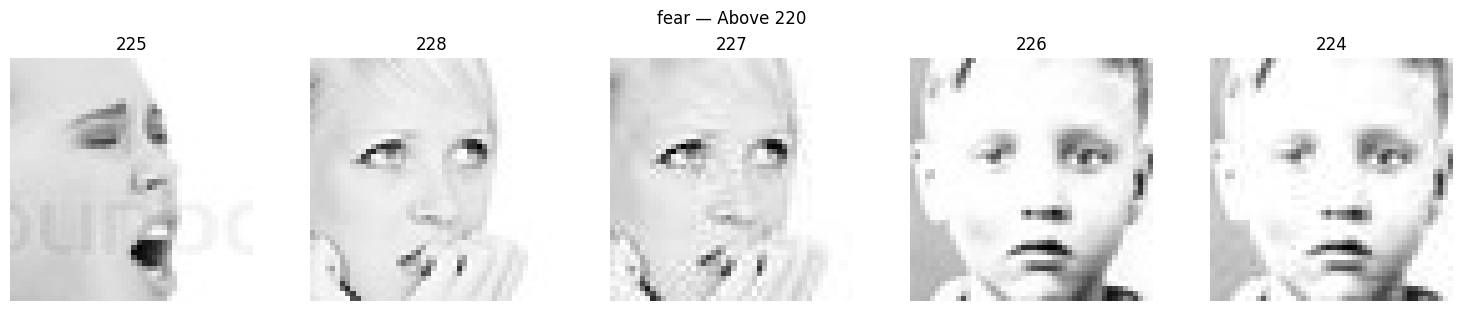


=== Folder: happy ===

  Under 35 (13 images):
    0b2633d70e6c31df7fc165ca66ae9cc96571049d5546ebbf71d7f038.jpg: 33.30
    0bcd11e698f5698a00e7358373fd7639b1feb84a524385aaf161958a.png: 28.99
    0bcd11e698f5698a00e7358373fd7639b1feb84a524385aaf161958a_rot1.png: 28.61
    0d7ce87e9b87ef9350f973a8bbeb5bae2da4fa5ed90bbd11512f53ca.jpg: 33.80
    PrivateTest_35915421.jpg: 32.48
    PrivateTest_4871052.jpg: 19.94
    Training_13790971.jpg: 34.73
    Training_19307133.jpg: 8.64
    Training_5940600.jpg: 34.35
    Training_60657373.jpg: 32.26
    Training_97666920.jpg: 33.64
    Training_99226478.jpg: 34.79
    Training_9961393.jpg: 27.98


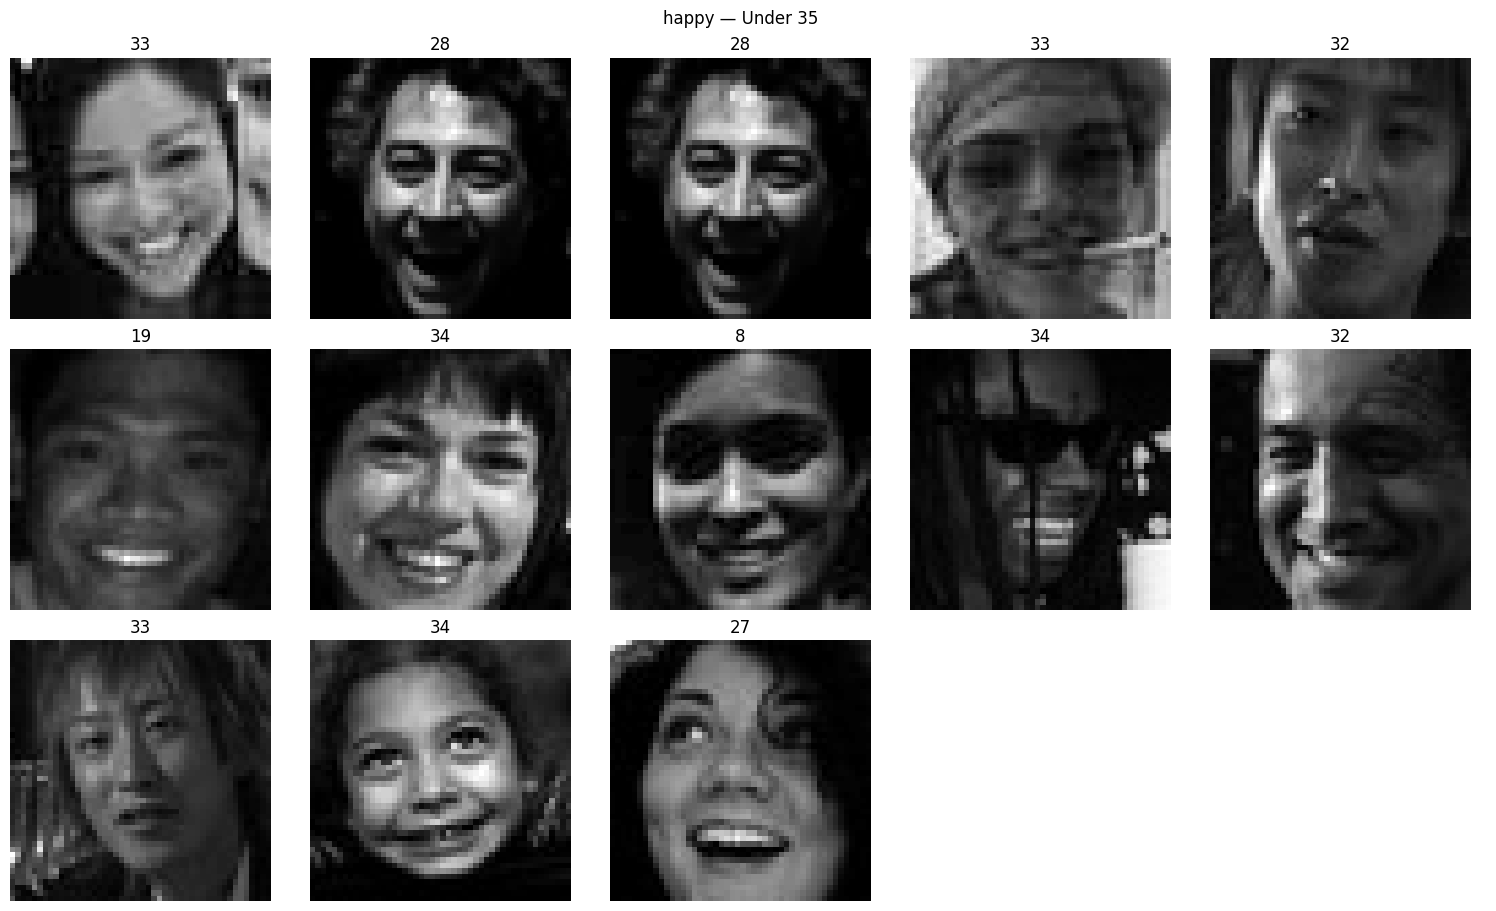


  Above 220 (8 images):
    PrivateTest_2911075.jpg: 226.45
    PublicTest_82553712.jpg: 220.71
    Training_42341840.jpg: 223.62
    Training_53809298.jpg: 228.75
    Training_66093610.jpg: 224.15
    Training_69441781.jpg: 222.53
    Training_78774085.jpg: 221.06
    Training_82515477.jpg: 223.27


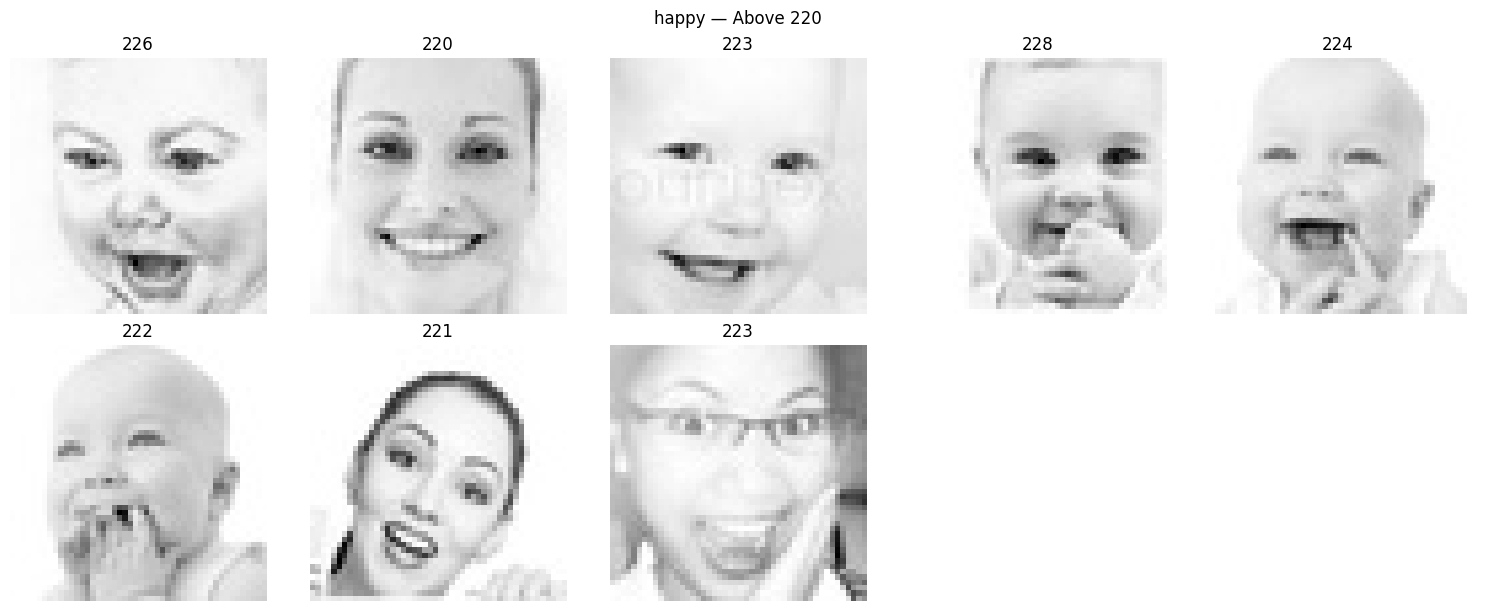


=== Folder: neutral ===

  Under 35 (45 images):
    01a89f4f694db1c21509ba043cbc32914108b73d8027675960d50f68f.jpg: 32.54
    0ada07f4757b910326bfbe2a4eb75f491b1584ea8021faf05bc232a3f_rot1_bright1.png: 5.62
    0b4b425d88d6ce24c26d3727d0e07d129e54dde3f20fbf4dd949dd2bf_rot1.jpg: 34.69
    0b70fa0ba83e0c83a1398276fe721c2c127e0ed4d31b864d064a0753f.png: 33.43
    0b70fa0ba83e0c83a1398276fe721c2c127e0ed4d31b864d064a0753f_rot1.png: 32.34
    0bd7a9dbb4a6ae80a425aee0e8a3ce1b57a3463b40978b6f6d63062ef.jpg: 20.28
    0bd7a9dbb4a6ae80a425aee0e8a3ce1b57a3463b40978b6f6d63062ef_rot1.jpg: 19.07
    0c4600c0a76c6ddba353a7e9a10dd52f6fa65e88652eb60464ed3e51f.jpg: 34.81
    0c4600c0a76c6ddba353a7e9a10dd52f6fa65e88652eb60464ed3e51f_rot1.jpg: 30.87
    0cd2a7f2d9f8b9b9f64cbde4868ff27a886457607dd6f2dc2184e775f.jpg: 28.51
    0cd2a7f2d9f8b9b9f64cbde4868ff27a886457607dd6f2dc2184e775f_rot1.jpg: 28.02
    0d3e550f1b1c7e45cdd424cabc36cecff3712fbea907711869406cfcf.png: 30.17
    0d3e550f1b1c7e45cdd424cabc36cecff

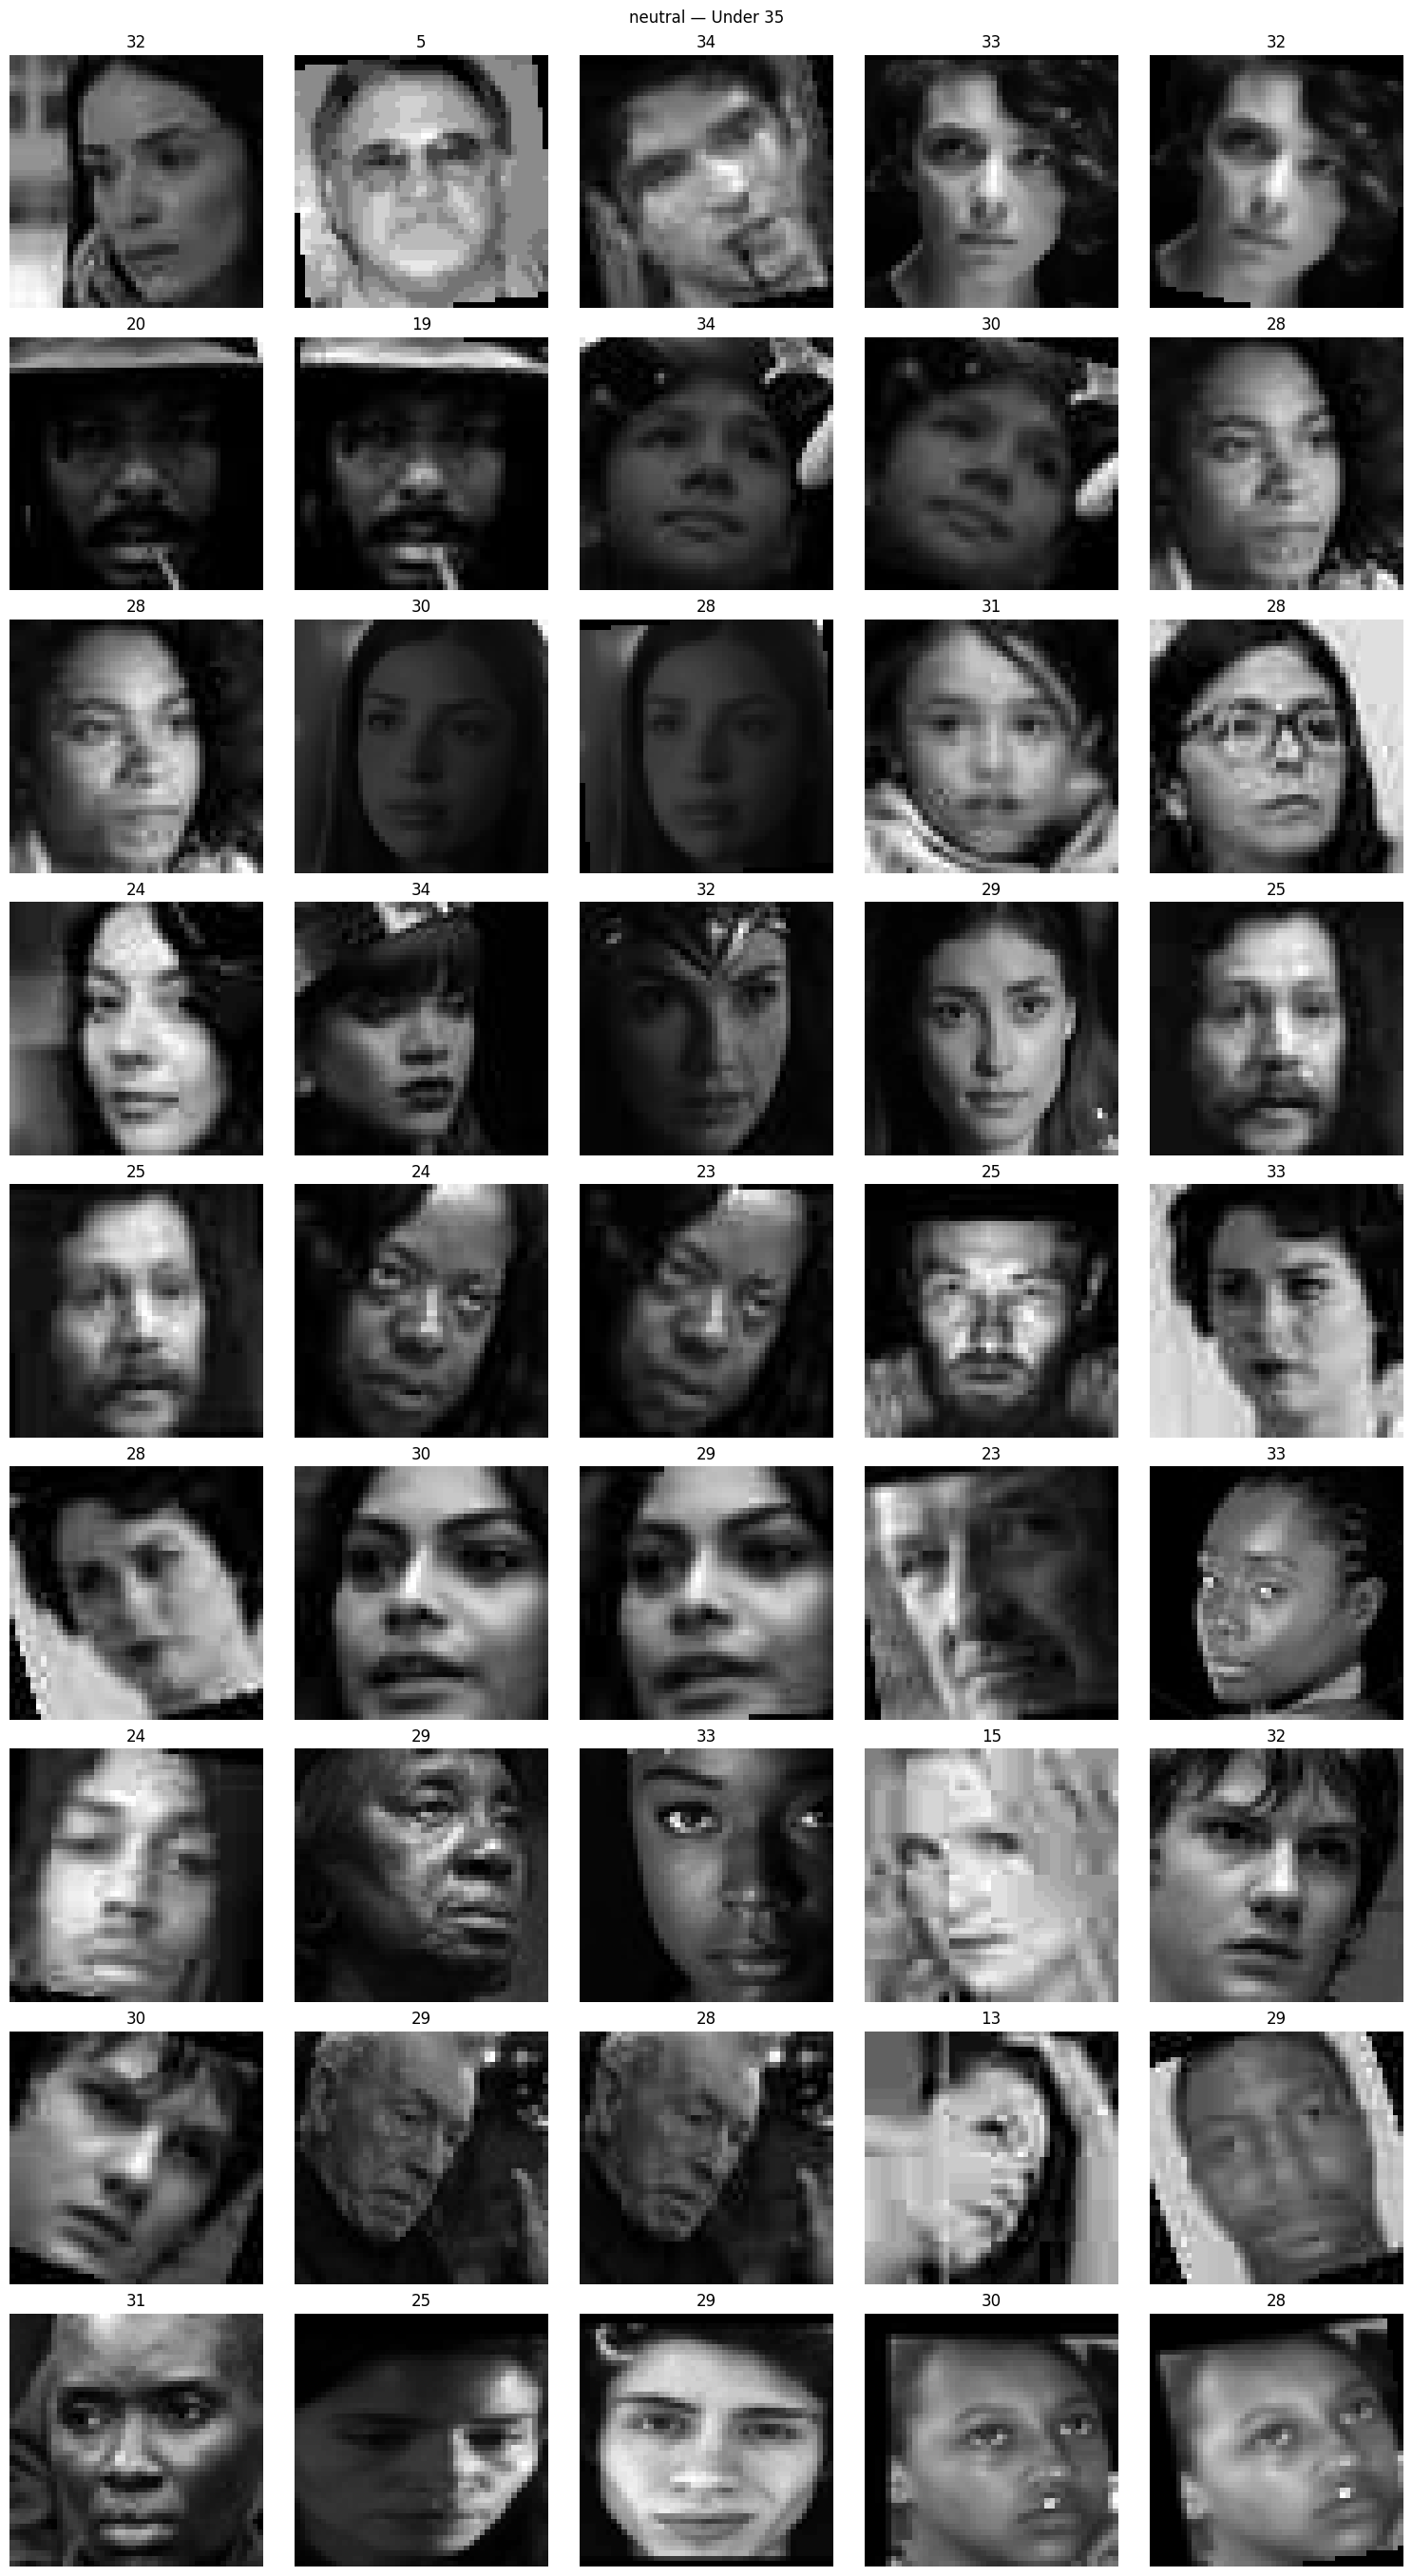


  Above 220 (18 images):
    0bf5d38b503a9213fedc924b663616184bdd438238c2610fe82422fbf_bright1.png: 220.79
    0cfad43f2191fb993ef1d8eecb0670fa5e72ce47305d87495a74f19bf_bright1.jpg: 236.32
    0ddabe3491e50c23553377aaf0de03719d2ddf73902ed1814a9059eff_bright1.jpg: 248.13
    0eb4237ad08604c95d16f56c6bdd69f14b33da38bb997887cb8c176af_bright1.jpeg: 224.54
    0f0eae62a639d582a94ab7ab768306101e7da64b6a5f8adba75b304ff_bright1.jpg: 229.15
    0fb7ad246488abe3355082e3330097571092033551cf50b20e440d07f_bright1.jpg: 251.10
    1aa10ca5de25598a04242b4f2bafa09e837fa76d60336e5c8cf982eaf_rot1_bright1.jpg: 228.83
    PrivateTest_13501133_bright1.jpg: 251.08
    PublicTest_60659593_rot1_bright1.jpg: 222.59
    Training_24212024_rot1_bright1.jpg: 230.94
    Training_26024066_bright1.jpg: 226.10
    Training_31414356.jpg: 224.17
    Training_40023243_bright1.jpg: 236.96
    Training_52000213_bright1.jpg: 222.98
    Training_54750821.jpg: 225.59
    cropped_emotions.277780f_bright1.png: 229.01
    croppe

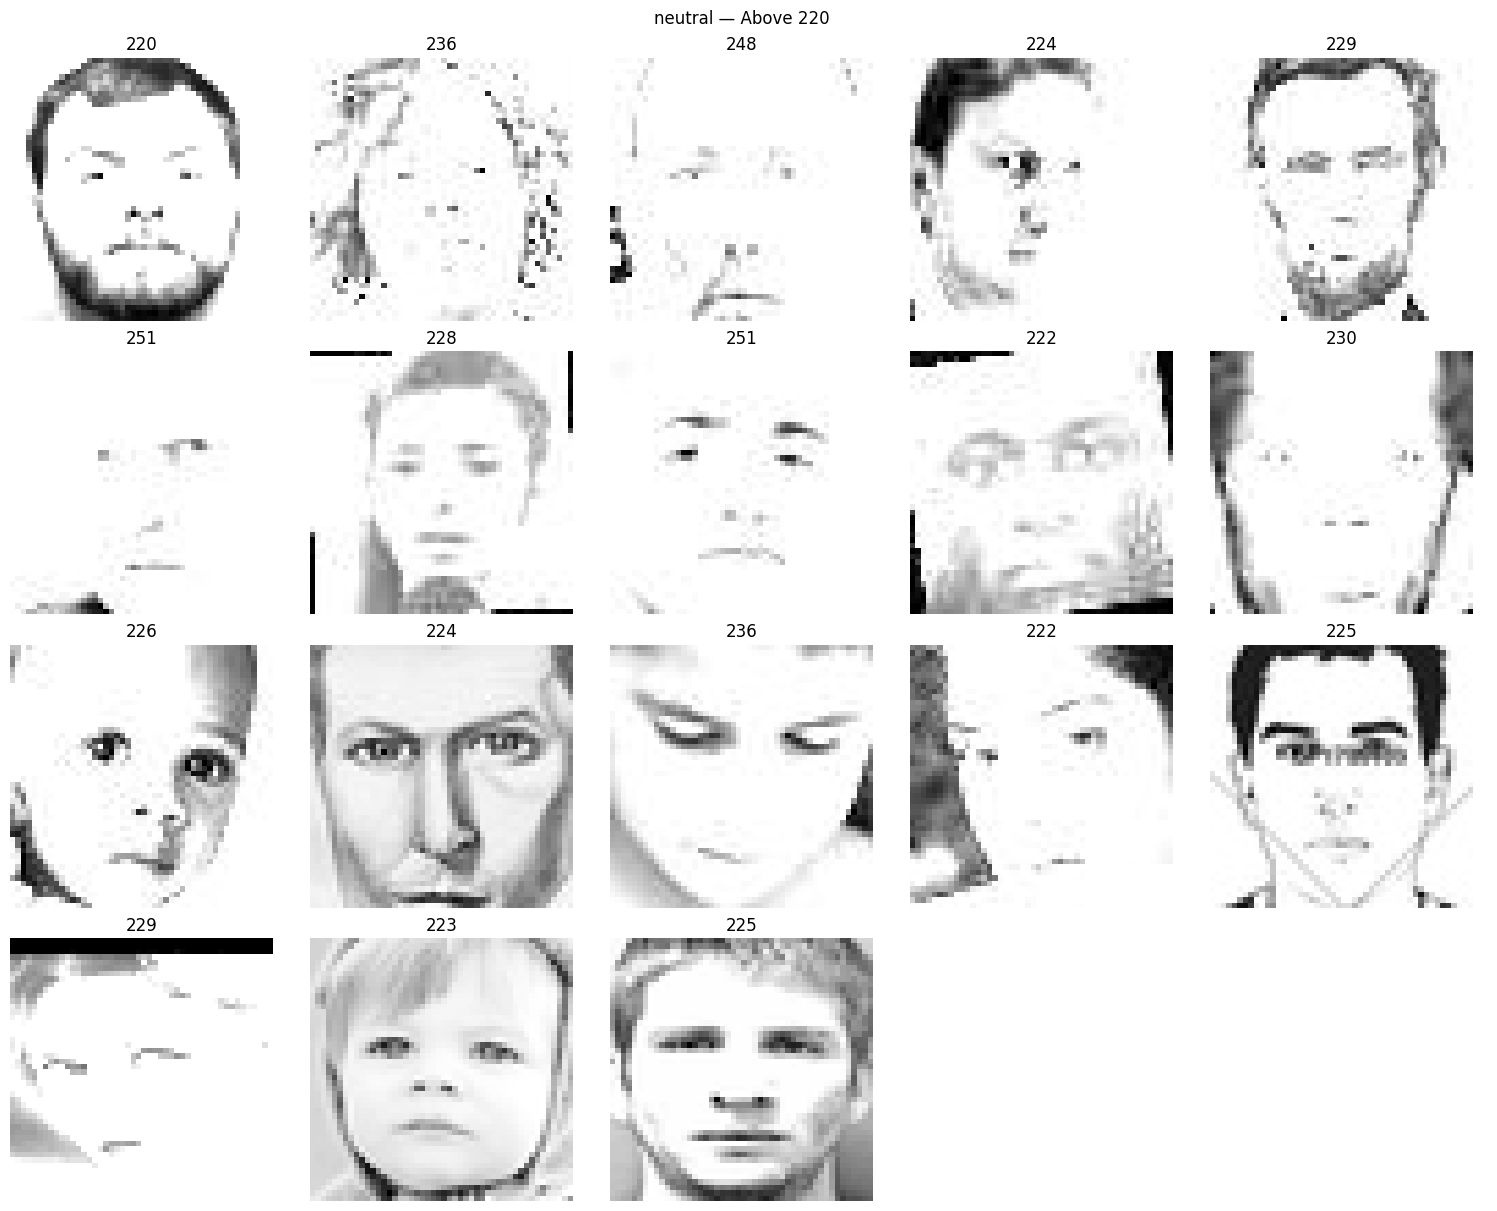


=== Folder: sad ===

  Under 35 (127 images):
    006f0cb77995918c82b88d483885852087842ab7fc09a2092e71375e.jpg: 32.92
    006f0cb77995918c82b88d483885852087842ab7fc09a2092e71375e_con1.jpg: 32.41
    006f0cb77995918c82b88d483885852087842ab7fc09a2092e71375e_rot1.jpg: 31.95
    01e6f06a4d94499b303cf7dc1369796b3bff3599598c97ae8943ffff_rot1.png: 33.95
    02ccf3735b440fcb055309b01f0827799e7aa611ffb9d6e3d27e749b_rot1.jpg: 32.07
    0ce685232e5c277b2246c0816ca57849722a20753fb4ee99467118b5_con1.jpg: 34.78
    0ce685232e5c277b2246c0816ca57849722a20753fb4ee99467118b5_rot1.jpg: 34.66
    0de3d66514bed70fdf0e25faf820b62933385c788216091735800116_rot1.jpg: 33.94
    0ee4e0489f58e9db1a792a2868a5a6d9789783313a8d50c42d619f17_rot1.png: 34.39
    0ee5c13473789f7c4a1efe8d61a1d3402338d143d68951b1884f4555.png: 30.92
    0ee5c13473789f7c4a1efe8d61a1d3402338d143d68951b1884f4555_rot1.png: 28.24
    0ee5c13473789f7c4a1efe8d61a1d3402338d143d68951b1884f4555_rot1_con1.png: 27.64
    0f0075fae2bf9dd5fa3a659879723a

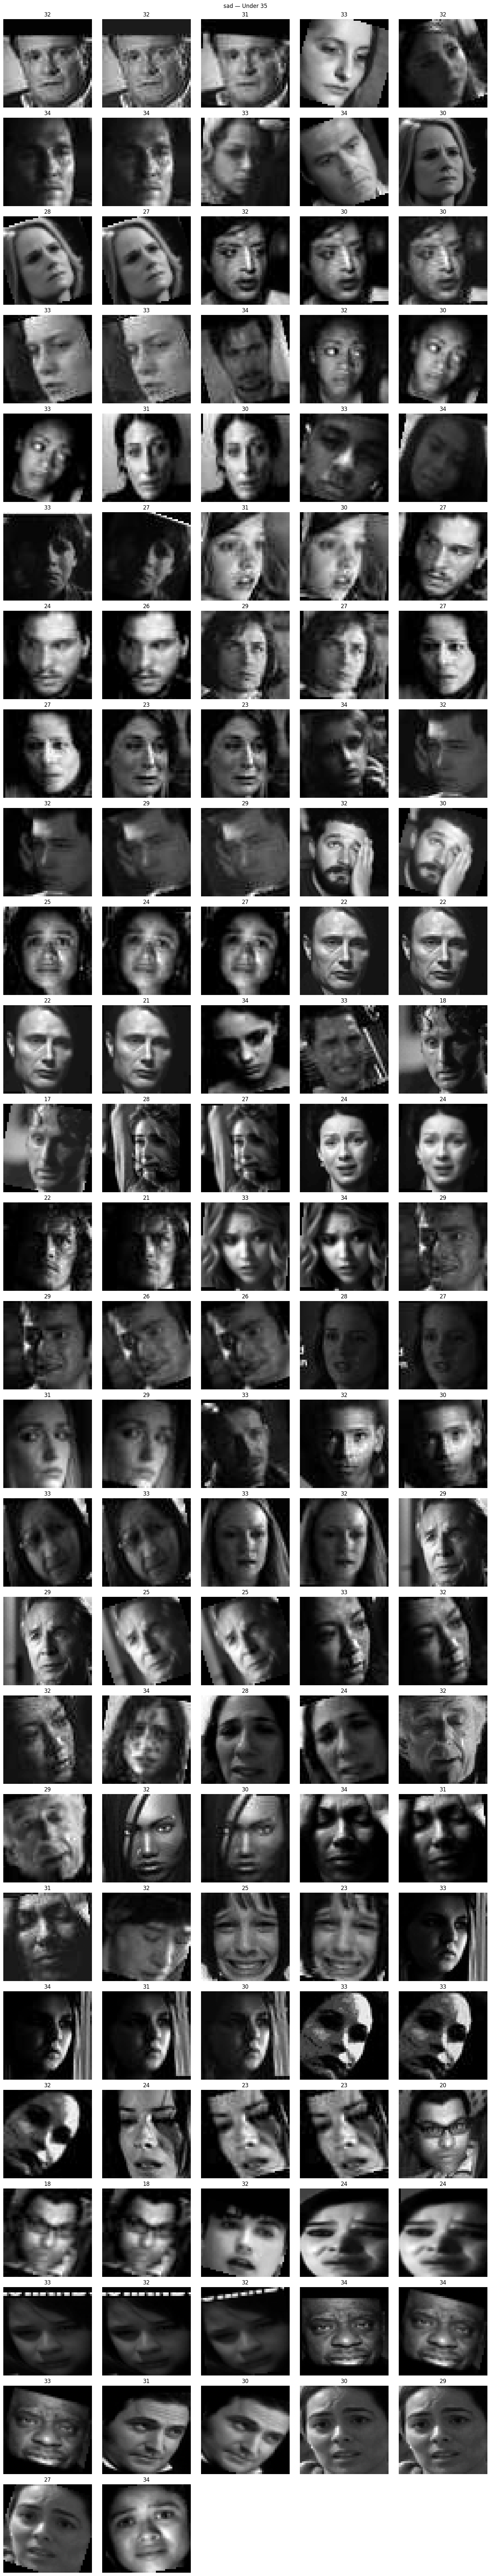


=== Folder: surprise ===

  Under 35 (2 images):
    cropped_emotions.261927~12fffff_rot1_bright1.png: 29.34
    cropped_emotions.261927~12fffff_rot1_bright1_rot1.png: 28.26


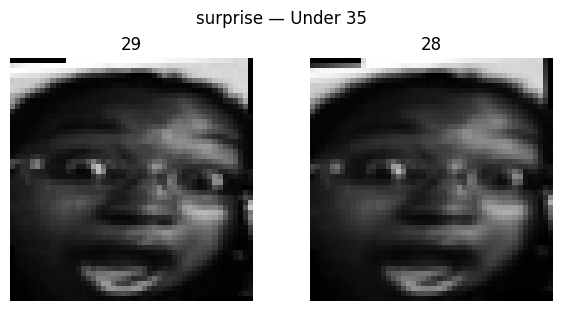


  Above 220 (9 images):
    PrivateTest_58393533_bright1.jpg: 235.26
    PrivateTest_94417003_bright1.jpg: 247.23
    PublicTest_15712657_bright1.jpg: 246.12
    PublicTest_1709990_rot2_con1_bright1.jpg: 227.52
    PublicTest_34645495_bright1.jpg: 237.72
    PublicTest_34645495_bright1_rot1.jpg: 233.51
    PublicTest_34990545_rot2_bright1.jpg: 225.56
    PublicTest_5954279_con1_bright1.jpg: 242.05
    cropped_emotions.260736~12fffff_con1_bright1.png: 231.58


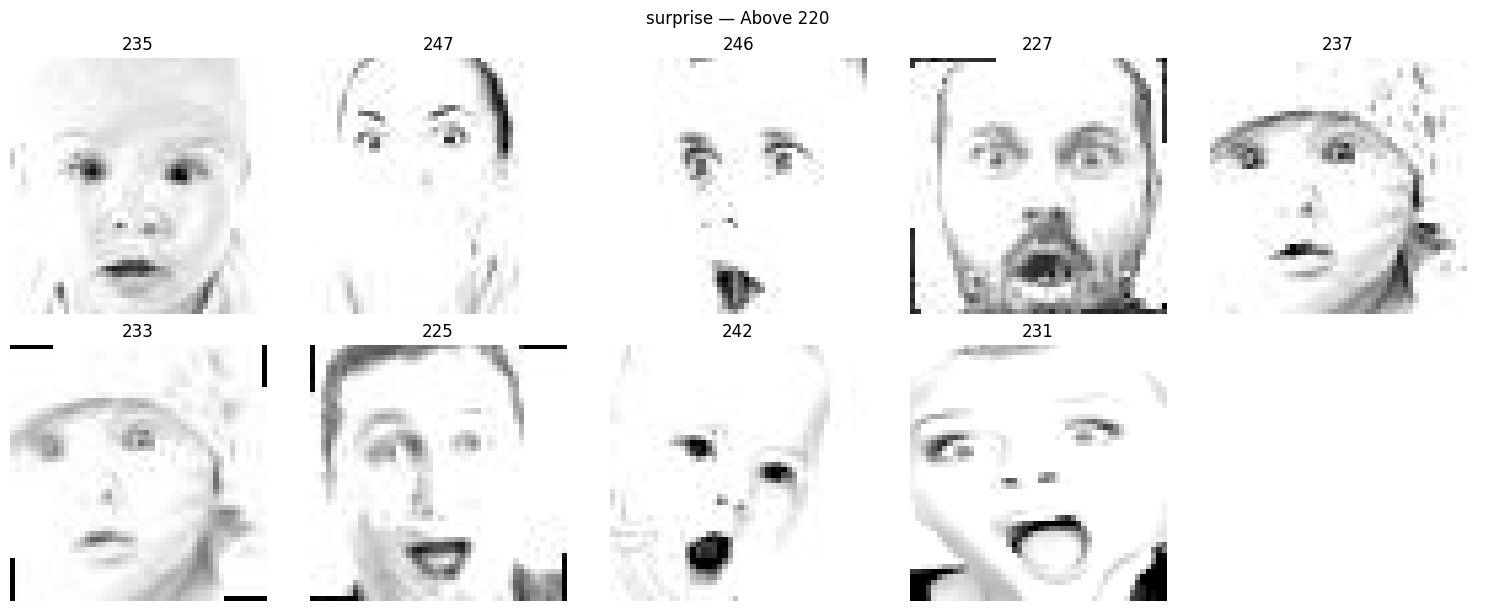

In [ ]:
import os
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def display_threshold_images(
    input_dir='path/to/images',
    low_thresh=35,
    high_thresh=220,
    max_cols=5
):
    """
    For each subfolder in input_dir, finds images whose mean intensity
    is < low_thresh or > high_thresh, prints their names and intensities,
    and displays them in grids.
    """
    for label in os.listdir(input_dir):
        folder = os.path.join(input_dir, label)
        if not os.path.isdir(folder):
            continue

        low_images = []
        high_images = []

        # collect qualifying images
        for fname in sorted(os.listdir(folder)):
            if not fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                continue
            path = os.path.join(folder, fname)
            try:
                img = Image.open(path).convert('L')
                intensity = np.array(img).mean()
            except Exception as e:
                print(f"  Skipping {fname}: {e}")
                continue

            if intensity < low_thresh:
                low_images.append((fname, intensity, img))
            elif intensity > high_thresh:
                high_images.append((fname, intensity, img))

        if not low_images and not high_images:
            print(f"\n[{label}] No images under {low_thresh} or above {high_thresh}")
            continue

        print(f"\n=== Folder: {label} ===")
        # Helper to print and display a list of images
        def _show(images, thresh_label):
            n = len(images)
            print(f"\n  {thresh_label} ({n} images):")
            for fname, intensity, _ in images:
                print(f"    {fname}: {intensity:.2f}")

            # display grid
            cols = min(n, max_cols)
            rows = math.ceil(n/cols) if n > 0 else 0
            fig, axes = plt.subplots(rows, cols,
                                     figsize=(cols*3, rows*3),
                                     constrained_layout=True)
            if rows == 1 and cols == 1:
                axes = np.array([[axes]])
            axes_flat = axes.flatten()

            for ax in axes_flat[n:]:
                ax.axis('off')

            for i, (_, intensity, img) in enumerate(images):
                ax = axes_flat[i]
                ax.imshow(img, cmap='gray')
                ax.set_title(f"{int(intensity)}")
                ax.axis('off')

            fig.suptitle(f"{label} — {thresh_label}")
            plt.show()

        if low_images:
            _show(low_images, f"Under {low_thresh}")
        if high_images:
            _show(high_images, f"Above {high_thresh}")

if __name__ == "__main__":
    display_threshold_images()

neutral/01a89f4f694db1c21509ba043cbc32914108b73d8027675960d50f68f.jpg  (mean=32.5)


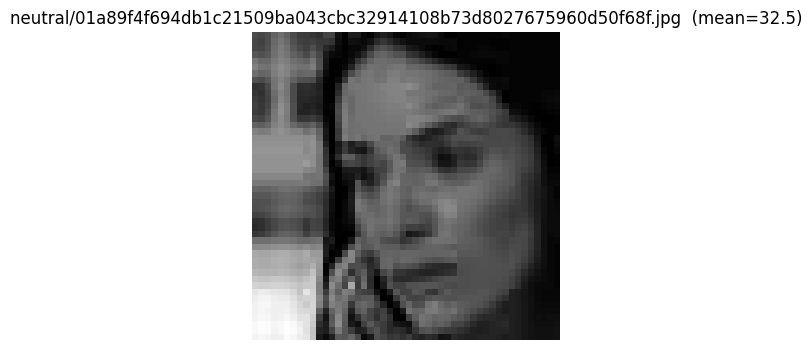

neutral/0ada07f4757b910326bfbe2a4eb75f491b1584ea8021faf05bc232a3f_rot1_bright1.png  (mean=5.6)


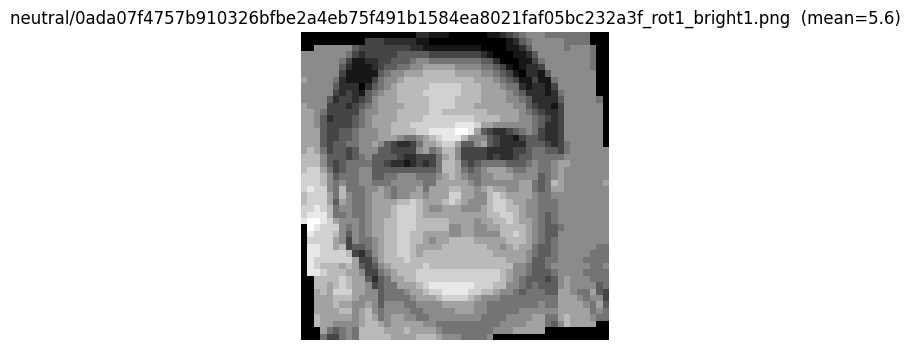

neutral/0b4b425d88d6ce24c26d3727d0e07d129e54dde3f20fbf4dd949dd2bf_rot1.jpg  (mean=34.7)


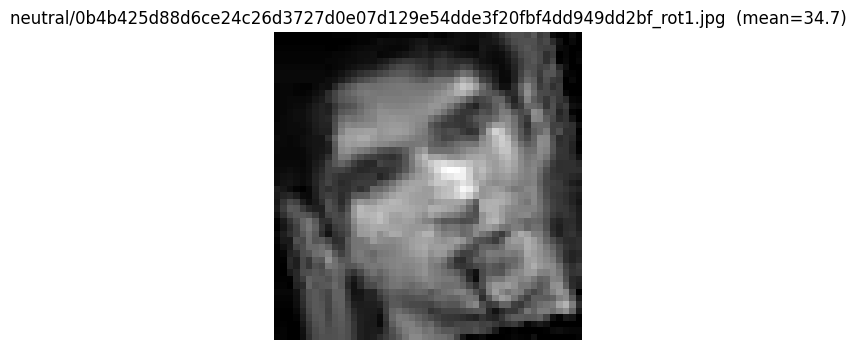

neutral/0b70fa0ba83e0c83a1398276fe721c2c127e0ed4d31b864d064a0753f.png  (mean=33.4)


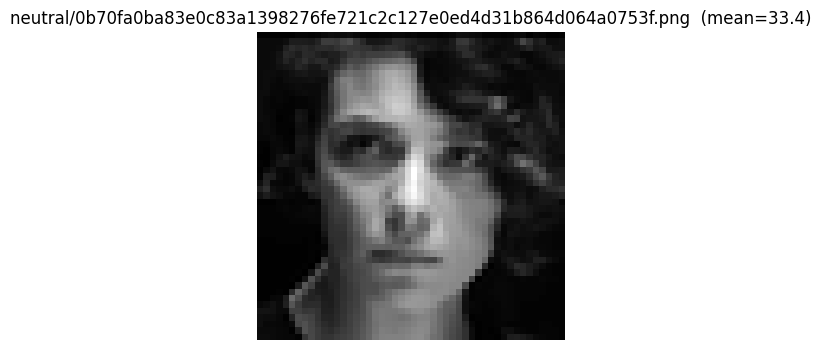

neutral/0b70fa0ba83e0c83a1398276fe721c2c127e0ed4d31b864d064a0753f_rot1.png  (mean=32.3)


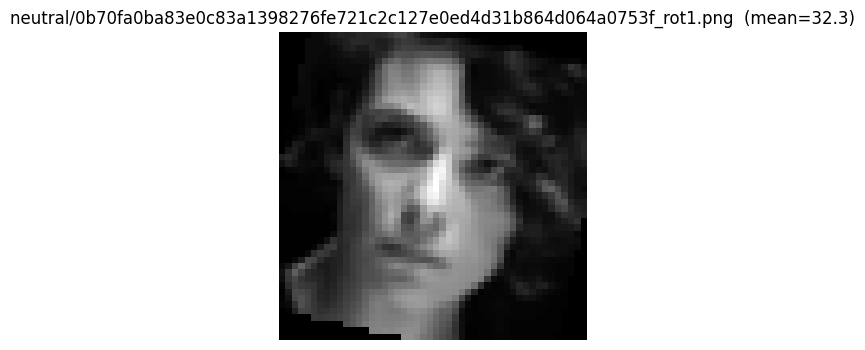

neutral/0bd7a9dbb4a6ae80a425aee0e8a3ce1b57a3463b40978b6f6d63062ef.jpg  (mean=20.3)


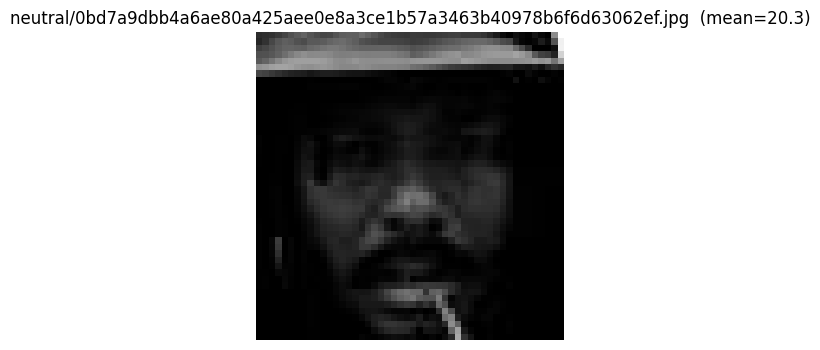

neutral/0bd7a9dbb4a6ae80a425aee0e8a3ce1b57a3463b40978b6f6d63062ef_rot1.jpg  (mean=19.1)


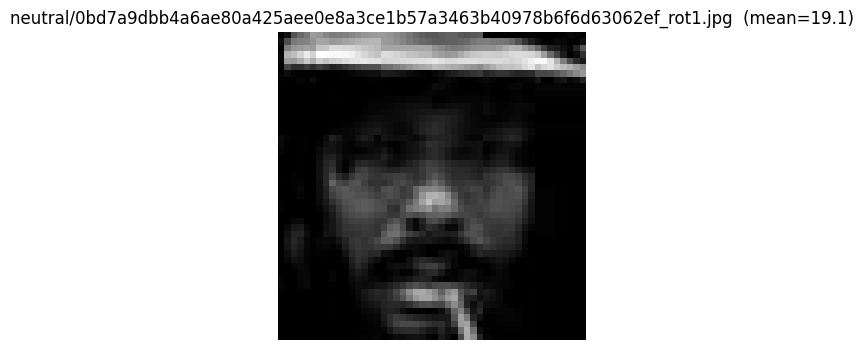

neutral/0bf5d38b503a9213fedc924b663616184bdd438238c2610fe82422fbf_bright1.png  (mean=220.8)


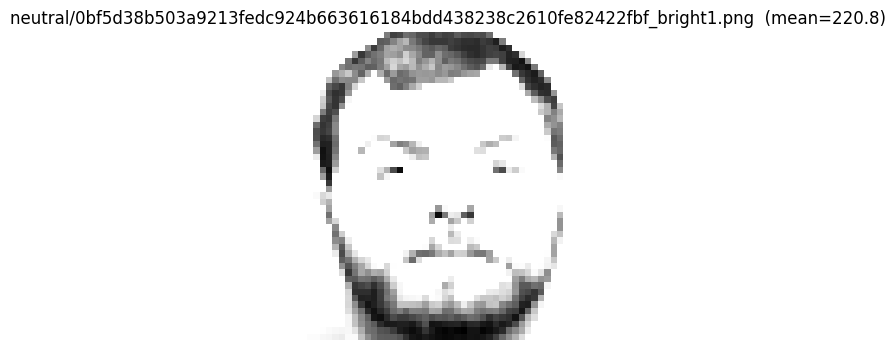

neutral/0c4600c0a76c6ddba353a7e9a10dd52f6fa65e88652eb60464ed3e51f.jpg  (mean=34.8)


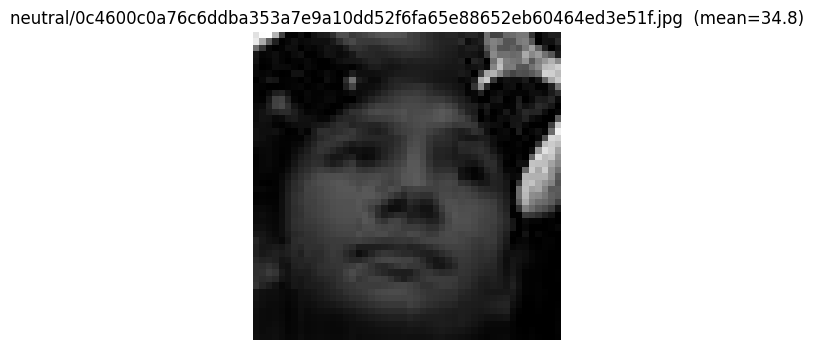

neutral/0c4600c0a76c6ddba353a7e9a10dd52f6fa65e88652eb60464ed3e51f_rot1.jpg  (mean=30.9)


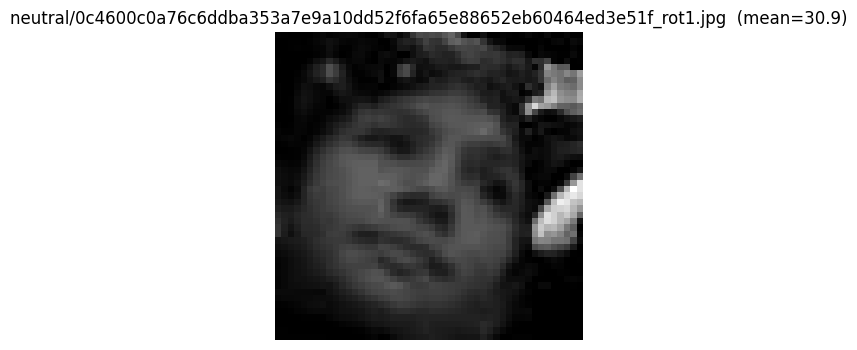

neutral/0cd2a7f2d9f8b9b9f64cbde4868ff27a886457607dd6f2dc2184e775f.jpg  (mean=28.5)


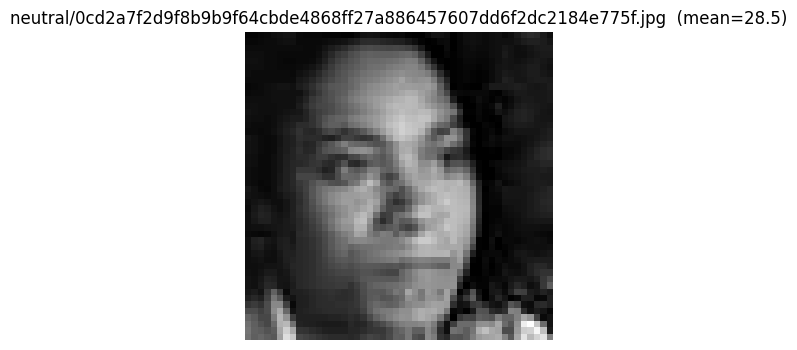

neutral/0cd2a7f2d9f8b9b9f64cbde4868ff27a886457607dd6f2dc2184e775f_rot1.jpg  (mean=28.0)


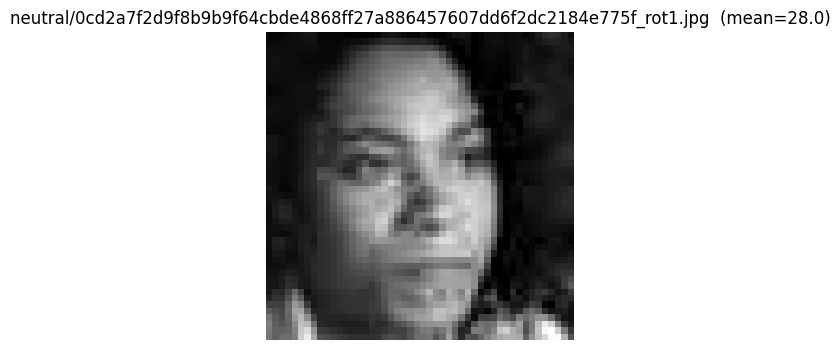

neutral/0cfad43f2191fb993ef1d8eecb0670fa5e72ce47305d87495a74f19bf_bright1.jpg  (mean=236.3)


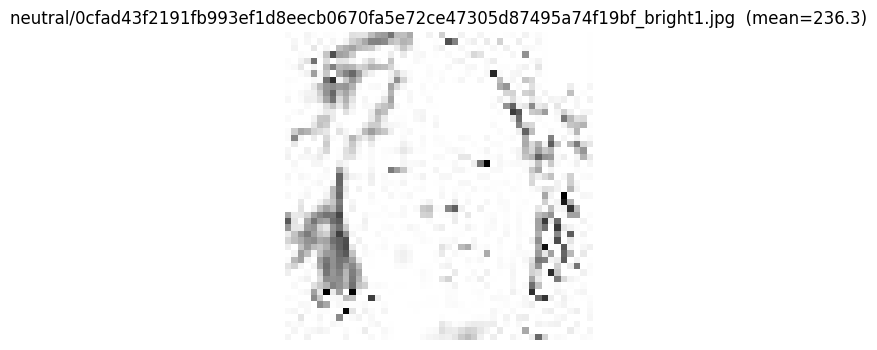

neutral/0d3e550f1b1c7e45cdd424cabc36cecff3712fbea907711869406cfcf.png  (mean=30.2)


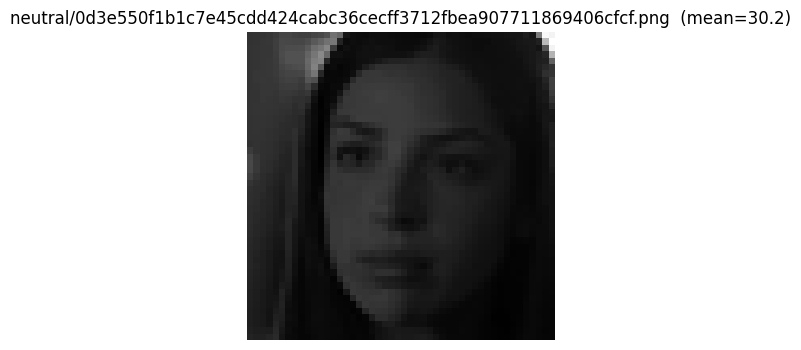

neutral/0d3e550f1b1c7e45cdd424cabc36cecff3712fbea907711869406cfcf_rot1.png  (mean=28.3)


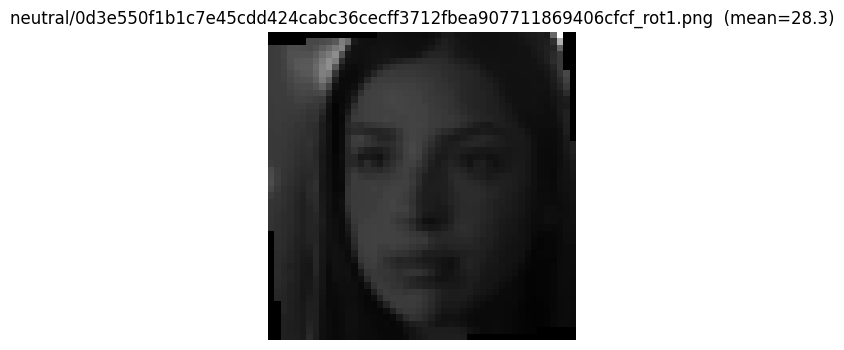

neutral/0ddabe3491e50c23553377aaf0de03719d2ddf73902ed1814a9059eff_bright1.jpg  (mean=248.1)


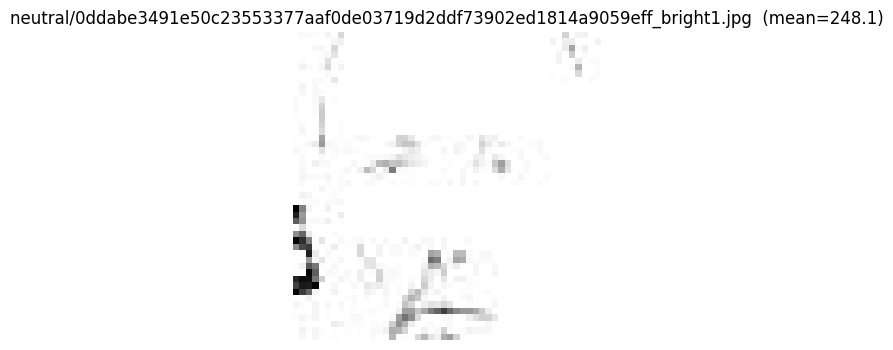

neutral/0e59feb29d9acfa09130e54dc1a2d59ca530ac278be4976cd5408fc8f.JPG  (mean=31.5)


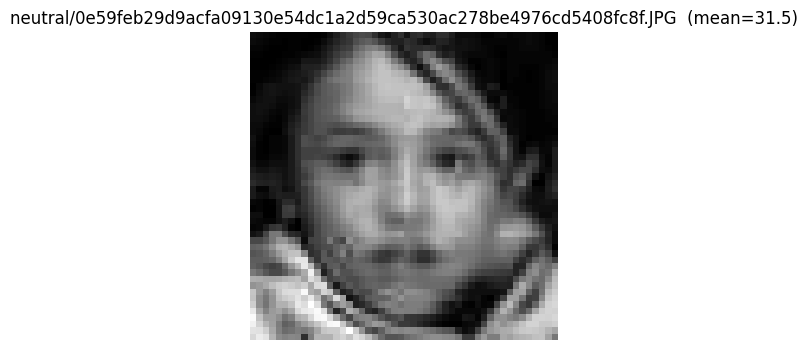

neutral/0e90bb0b80a951edfd91ce8f45cdbe092bd78560b9b18b4608ccc24cf_bright1.jpg  (mean=28.7)


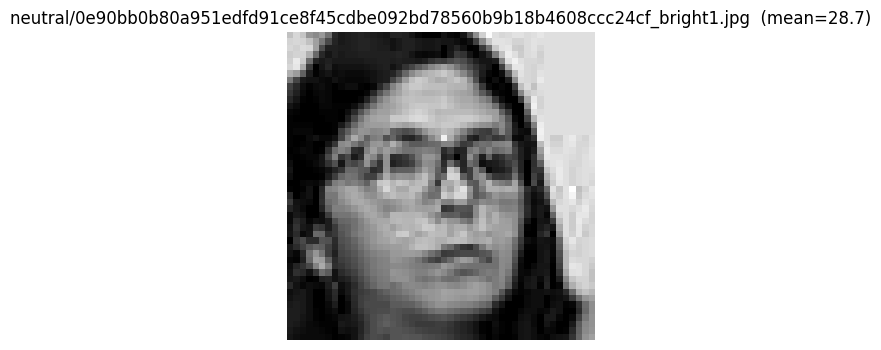

neutral/0eb4237ad08604c95d16f56c6bdd69f14b33da38bb997887cb8c176af_bright1.jpeg  (mean=224.5)


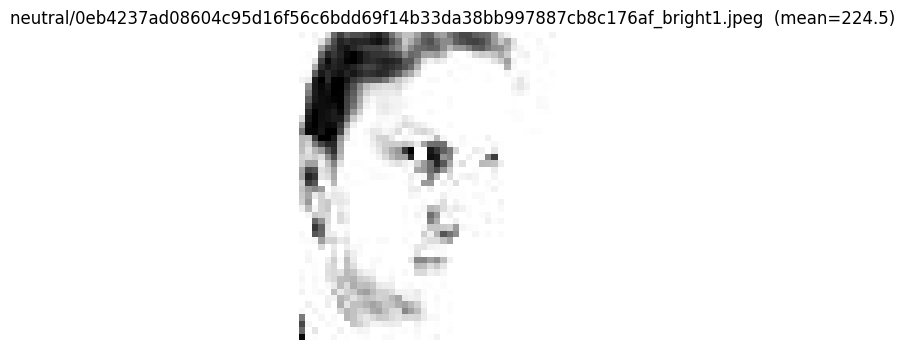

neutral/0f012a3134ebdd2143a09ea154f4efd83d53b87564697893ecaa1b3df.jpg  (mean=24.9)


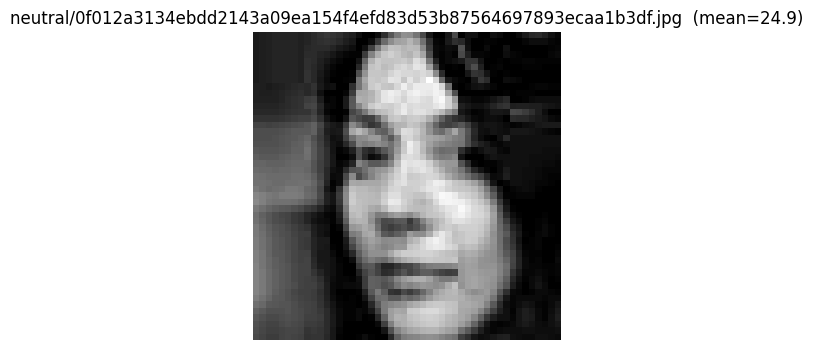

neutral/0f0eae62a639d582a94ab7ab768306101e7da64b6a5f8adba75b304ff_bright1.jpg  (mean=229.2)


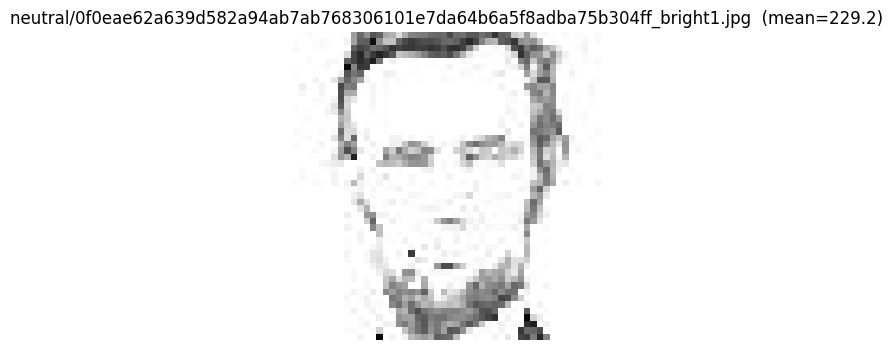

neutral/0f7b0fbbd2bbc7b9957602df55d36bf175552974e55f6954be879989f.jpg  (mean=34.6)


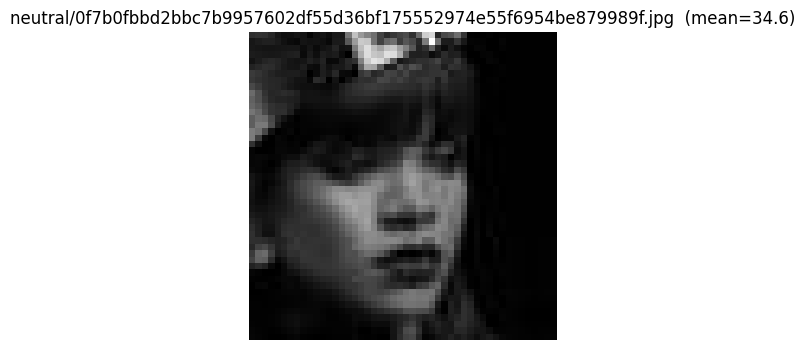

neutral/0f84b357ecec259505209723fbb5dc80c58e2d370a6ac9014a5ac55df.jpg  (mean=32.4)


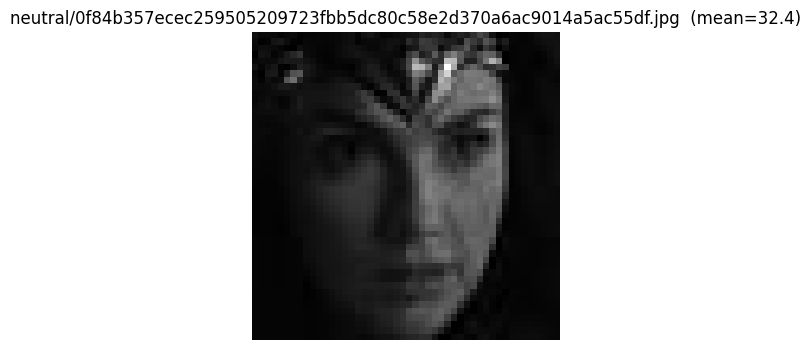

neutral/0fab3d20cf15d2ec6c135d173883c505bb8747d2934fa16990cc0621f.png  (mean=29.1)


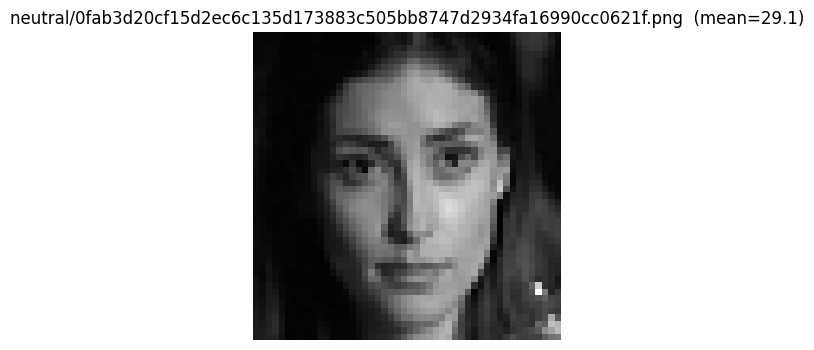

neutral/0fb7ad246488abe3355082e3330097571092033551cf50b20e440d07f_bright1.jpg  (mean=251.1)


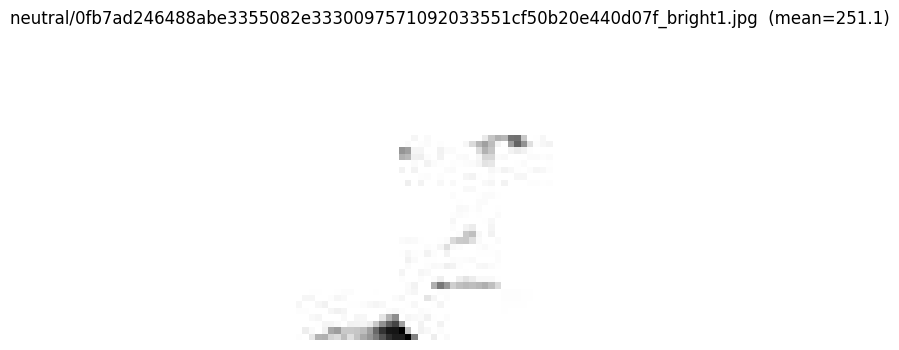

neutral/1a2b4f777ee082066d73347ba5c9aafeb77547f69204421161fa2ba3f.jpg  (mean=26.0)


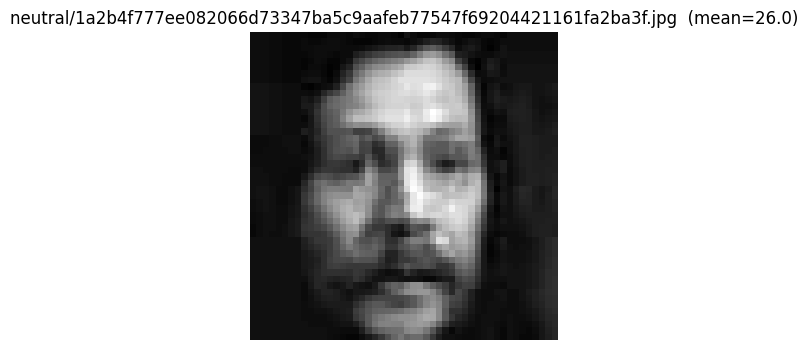

neutral/1a2b4f777ee082066d73347ba5c9aafeb77547f69204421161fa2ba3f_rot1.jpg  (mean=25.4)


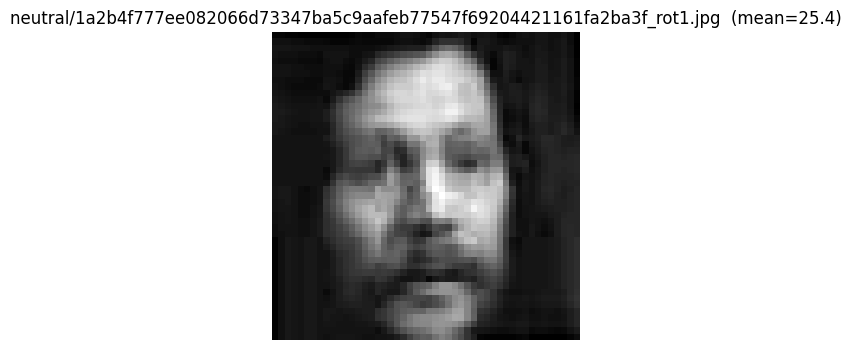

neutral/1a9f905621ff7ec0efebfb4c4a8c2adcc94a0d0d7af49720e6d66c71f.jpg  (mean=24.1)


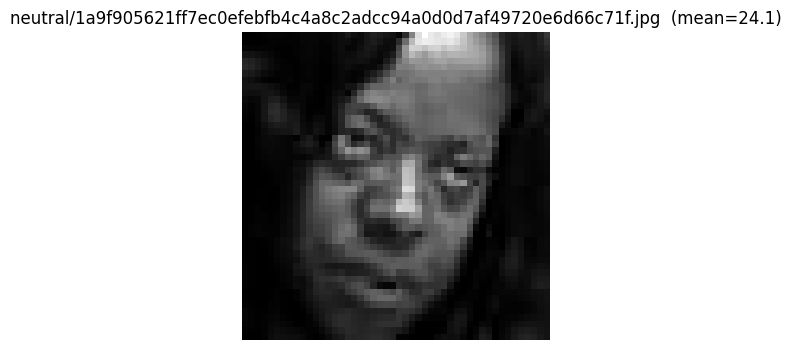

neutral/1a9f905621ff7ec0efebfb4c4a8c2adcc94a0d0d7af49720e6d66c71f_rot1.jpg  (mean=23.3)


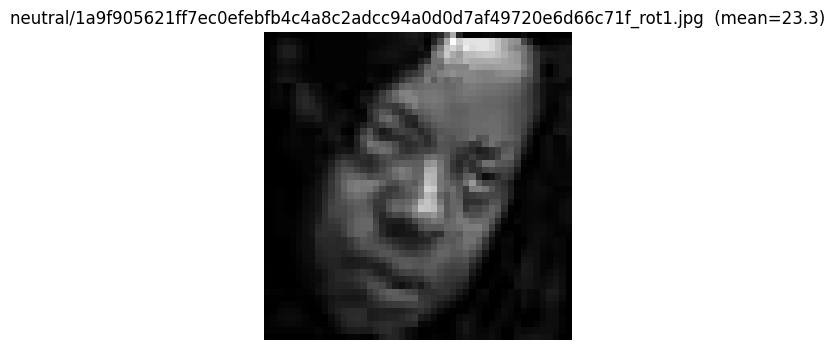

neutral/1aa10ca5de25598a04242b4f2bafa09e837fa76d60336e5c8cf982eaf_rot1_bright1.jpg  (mean=228.8)


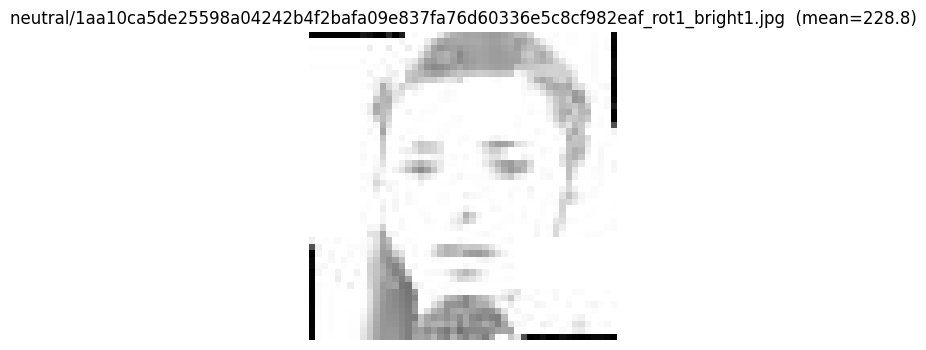

neutral/1ab1c3f5279b5b83a8c9f73d2983136b039317b57e5da24265bd2b67f.jpg  (mean=25.8)


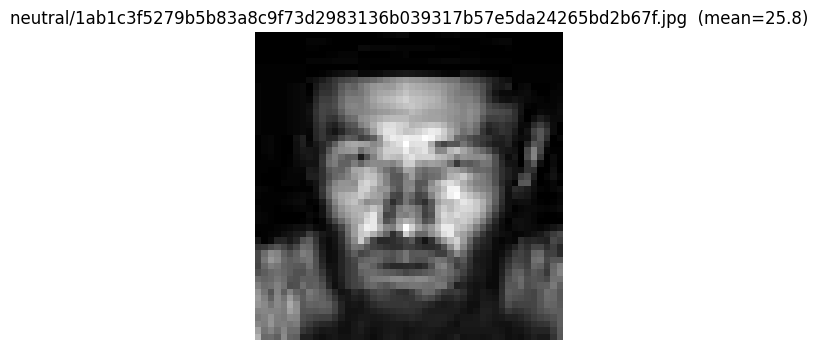

neutral/1ab80d5acaf47ee268b5224d8fcc7481884c70da4ebea3054acdd395f.jpg  (mean=33.2)


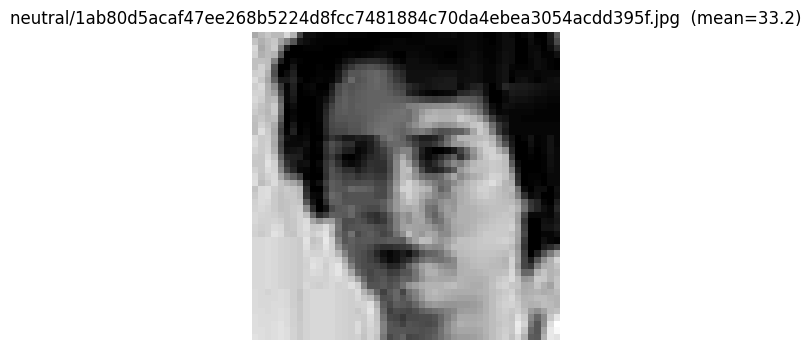

neutral/1ab80d5acaf47ee268b5224d8fcc7481884c70da4ebea3054acdd395f_rot1.jpg  (mean=28.5)


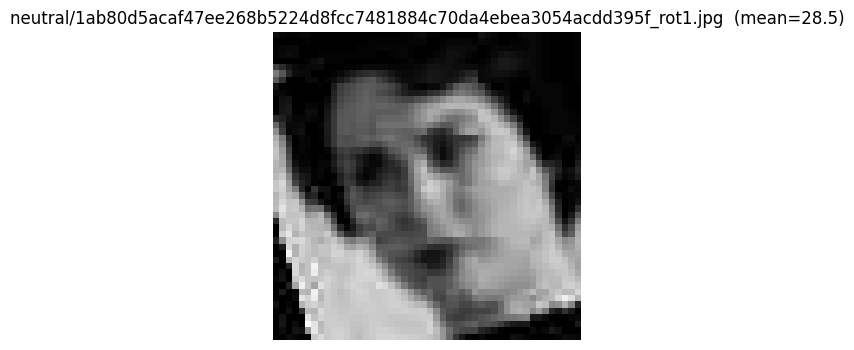

neutral/1ab8edb4b4b7063998ffb2e987d3cffc3632420e2a9c5eb5220ea160f.jpg  (mean=30.5)


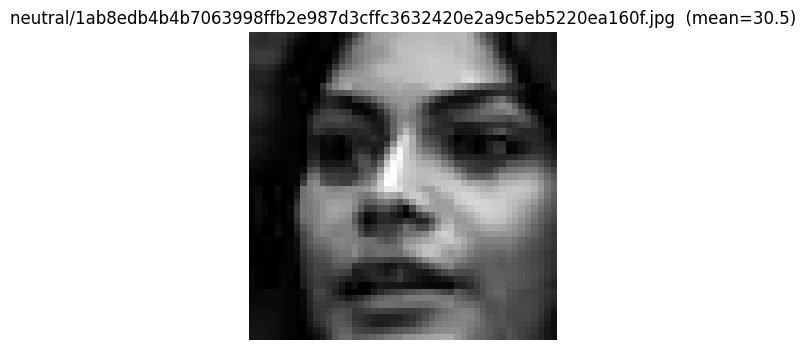

neutral/1ab8edb4b4b7063998ffb2e987d3cffc3632420e2a9c5eb5220ea160f_rot1.jpg  (mean=29.6)


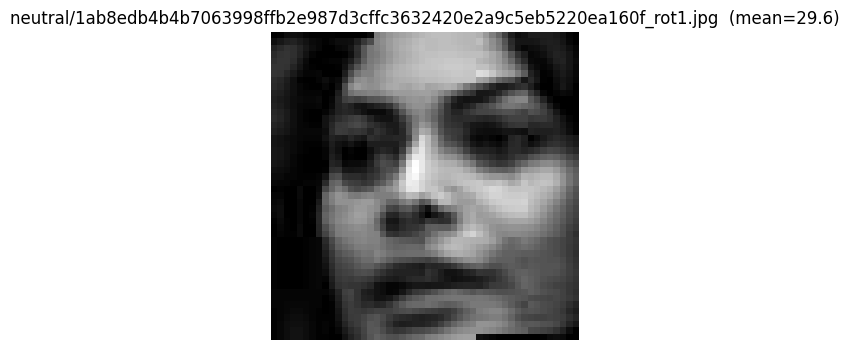

neutral/PrivateTest_13501133_bright1.jpg  (mean=251.1)


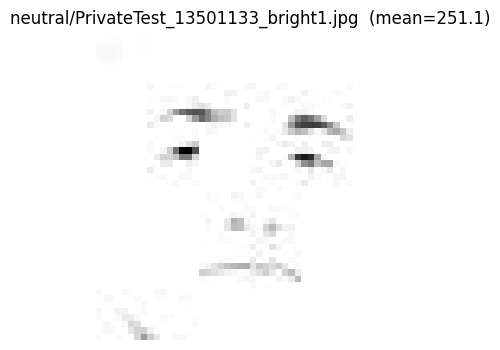

neutral/PublicTest_3852772_rot1_bright1.jpg  (mean=23.4)


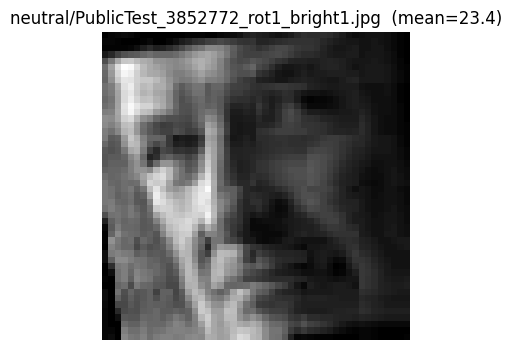

neutral/PublicTest_43180245.jpg  (mean=33.1)


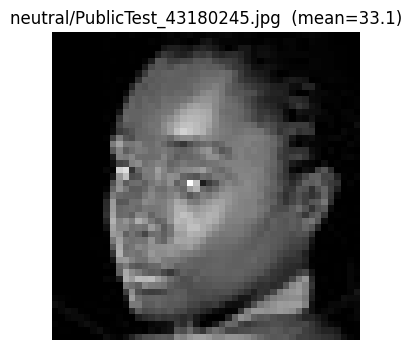

neutral/PublicTest_60659593_rot1_bright1.jpg  (mean=222.6)


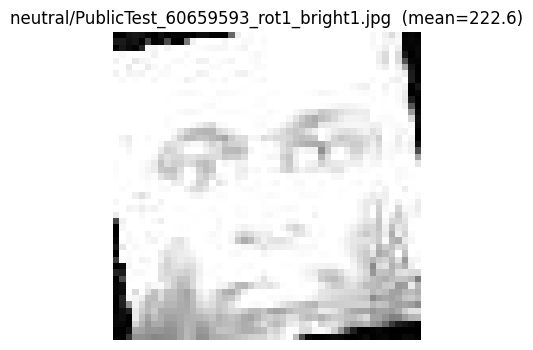

neutral/PublicTest_78461949_rot1_bright1.jpg  (mean=24.1)


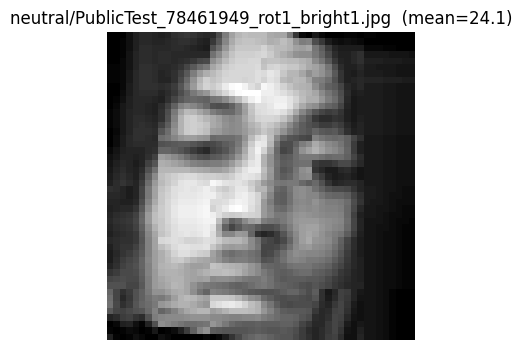

neutral/PublicTest_84113329.jpg  (mean=29.1)


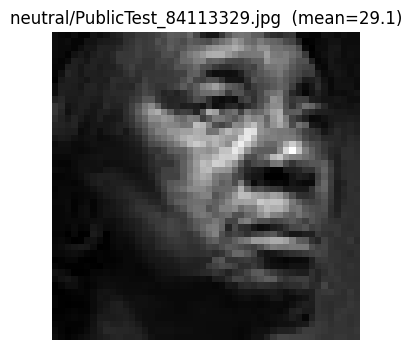

neutral/Training_2189524_rot1_bright1.jpg  (mean=223.2)


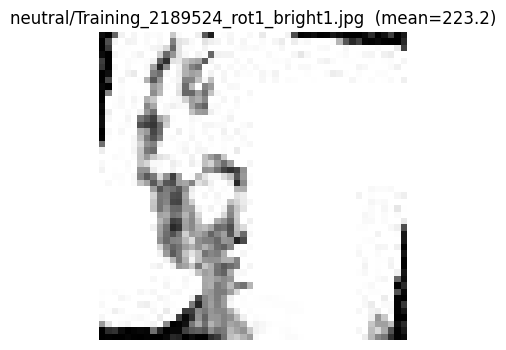

neutral/Training_23468066.jpg  (mean=33.9)


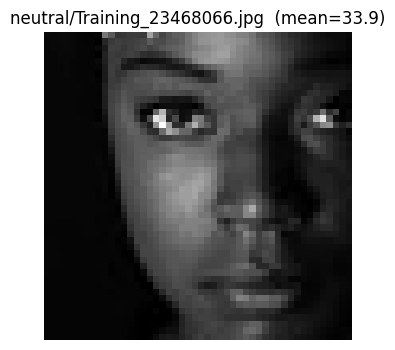

neutral/Training_24212024_rot1_bright1.jpg  (mean=230.9)


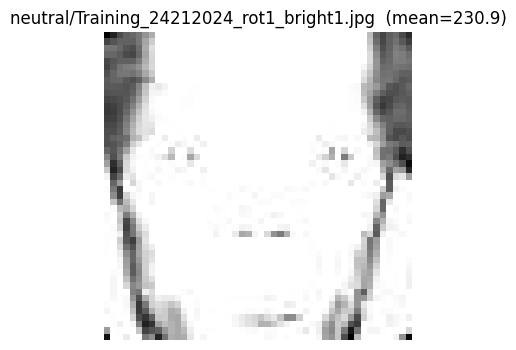

neutral/Training_26024066_bright1.jpg  (mean=226.1)


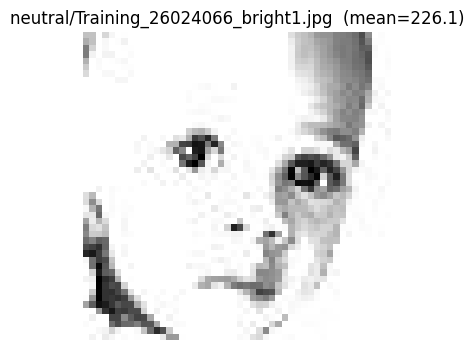

neutral/Training_26631692_bright1.jpg  (mean=15.1)


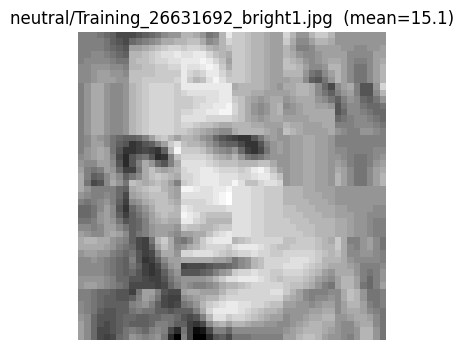

neutral/Training_27840679_bright1.jpg  (mean=222.7)


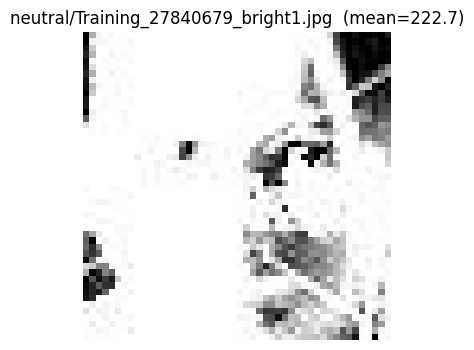

neutral/Training_31414356.jpg  (mean=224.2)


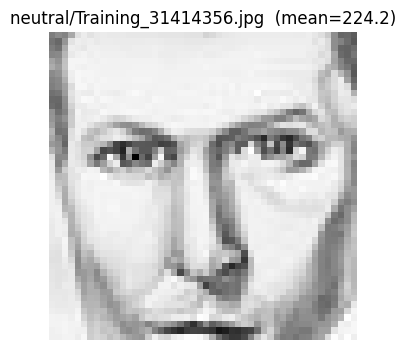

neutral/Training_40023243_bright1.jpg  (mean=237.0)


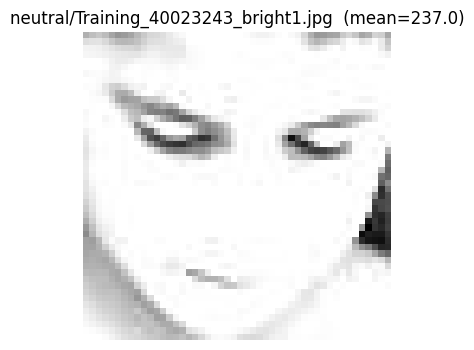

neutral/Training_50699569.jpg  (mean=32.9)


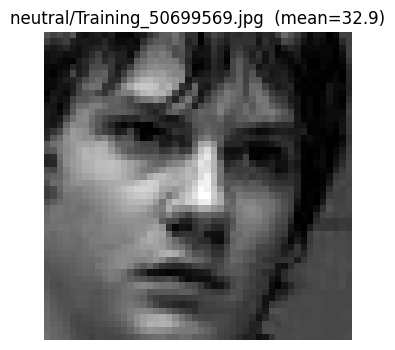

neutral/Training_50699569_rot1.jpg  (mean=30.0)


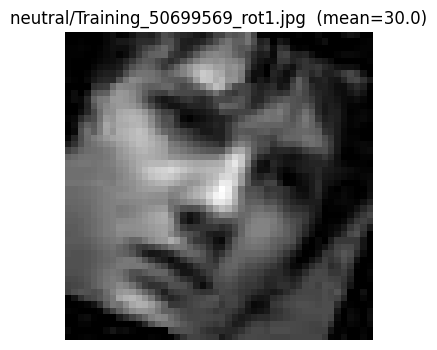

neutral/Training_52000213_bright1.jpg  (mean=223.0)


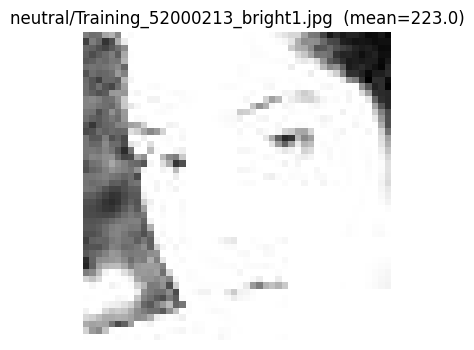

neutral/Training_52167263.jpg  (mean=29.2)


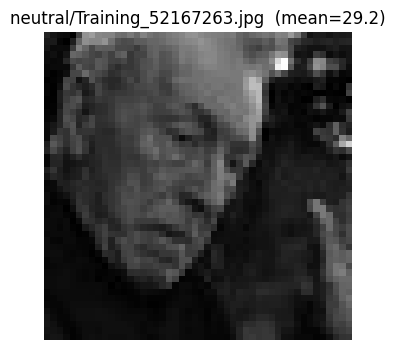

neutral/Training_52167263_rot1.jpg  (mean=28.7)


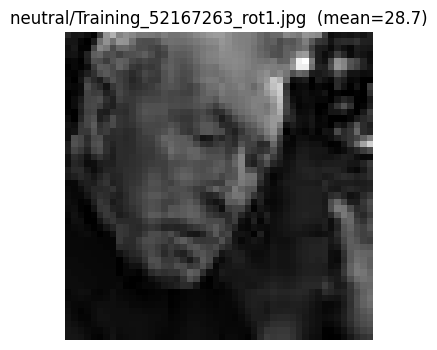

neutral/Training_53917602_bright1.jpg  (mean=13.7)


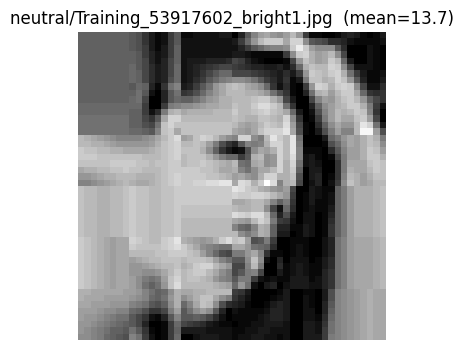

neutral/Training_54750821.jpg  (mean=225.6)


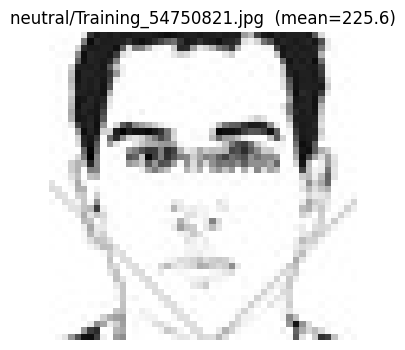

neutral/Training_55391101_rot1_bright1.jpg  (mean=29.8)


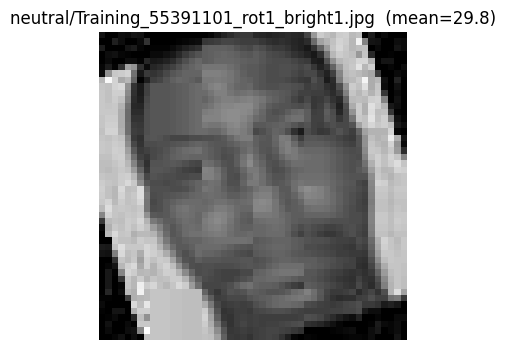

neutral/Training_5727129.jpg  (mean=31.2)


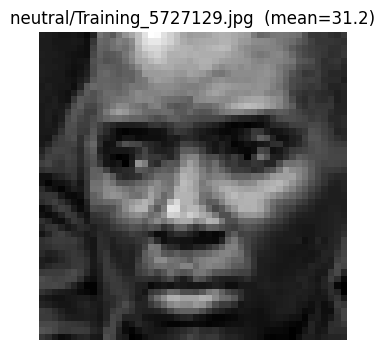

neutral/cropped_emotions.171806f_bright1.png  (mean=246.2)


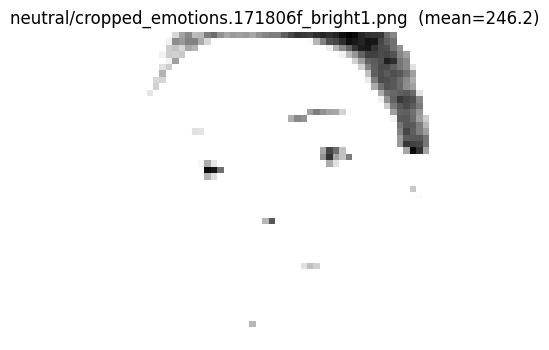

neutral/cropped_emotions.277604f_bright1.png  (mean=248.0)


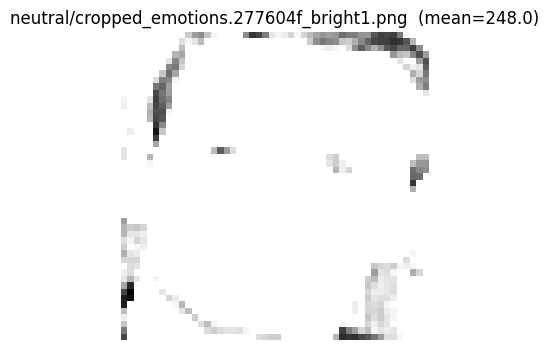

neutral/cropped_emotions.277754f.png  (mean=25.8)


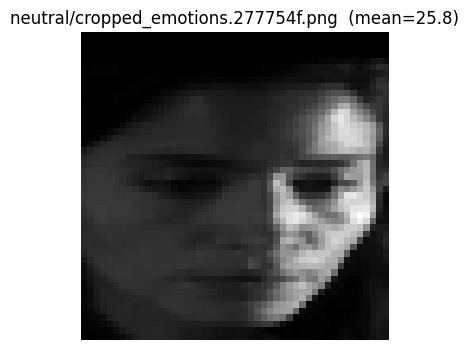

neutral/cropped_emotions.277780f_bright1.png  (mean=229.0)


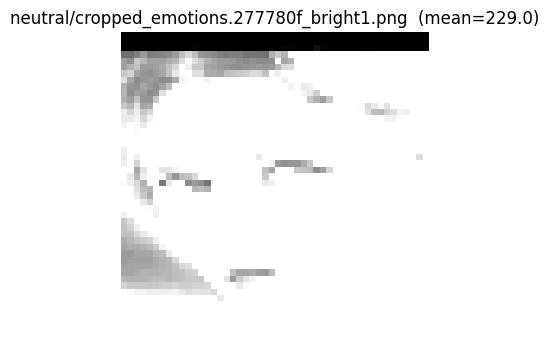

neutral/cropped_emotions.277801f_rot1_bright1.png  (mean=223.5)


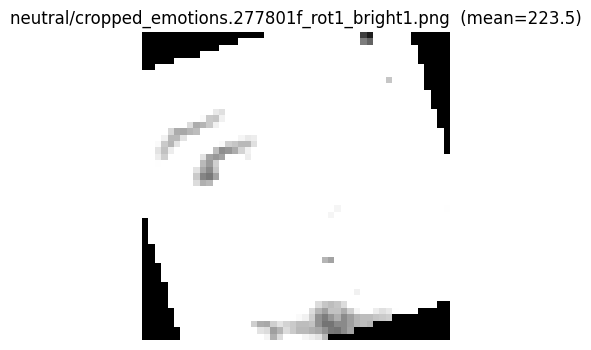

neutral/cropped_emotions.277831f_bright1.png  (mean=244.6)


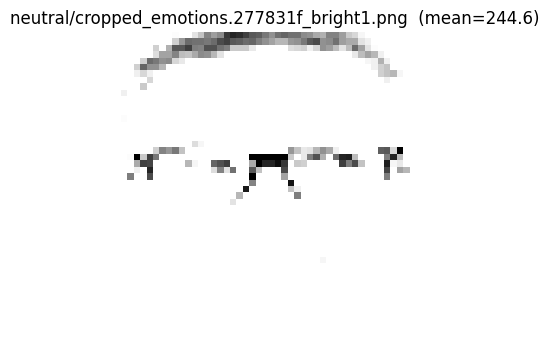

neutral/cropped_emotions.277889f_bright1.png  (mean=229.0)


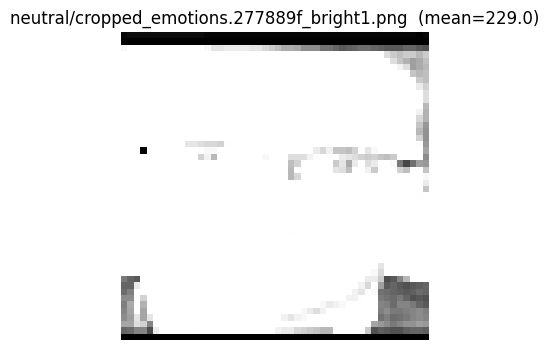

neutral/cropped_emotions.277895f.png  (mean=29.5)


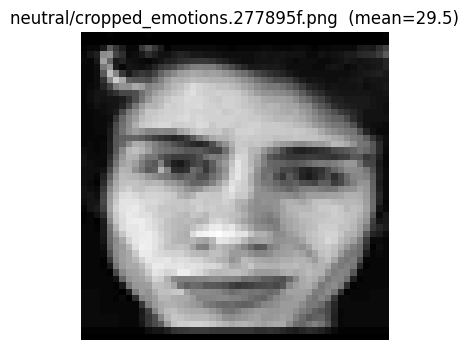

neutral/cropped_emotions.278005f.png  (mean=223.3)


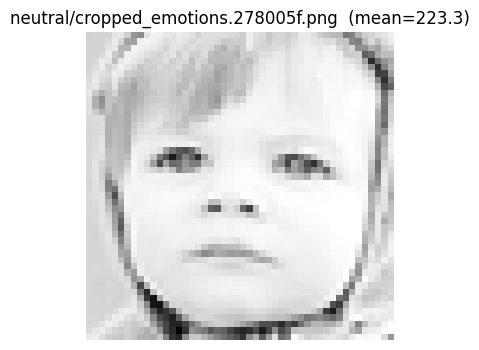

neutral/cropped_emotions.278034f.png  (mean=225.6)


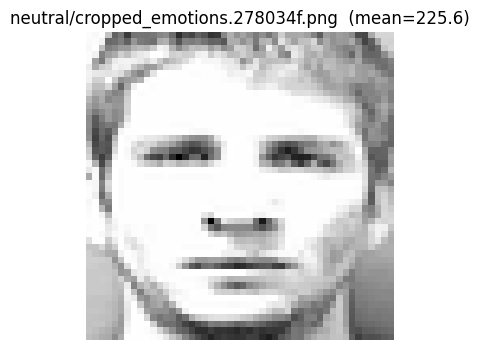

neutral/cropped_emotions.278340f.png  (mean=30.4)


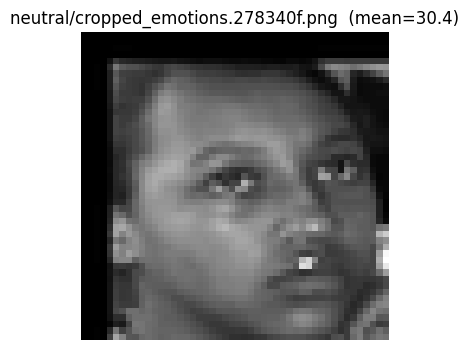

neutral/cropped_emotions.278340f_rot1.png  (mean=28.8)


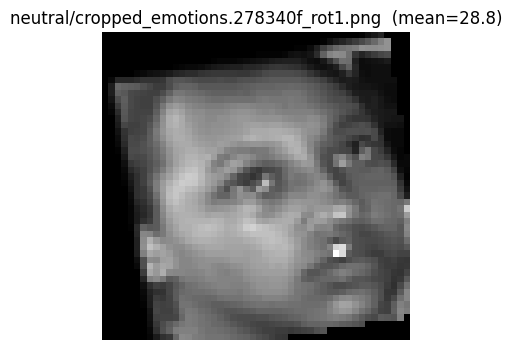

sad/006f0cb77995918c82b88d483885852087842ab7fc09a2092e71375e.jpg  (mean=32.9)


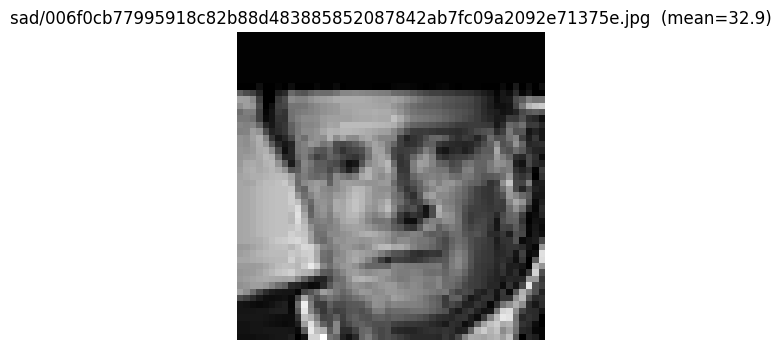

sad/006f0cb77995918c82b88d483885852087842ab7fc09a2092e71375e_con1.jpg  (mean=32.4)


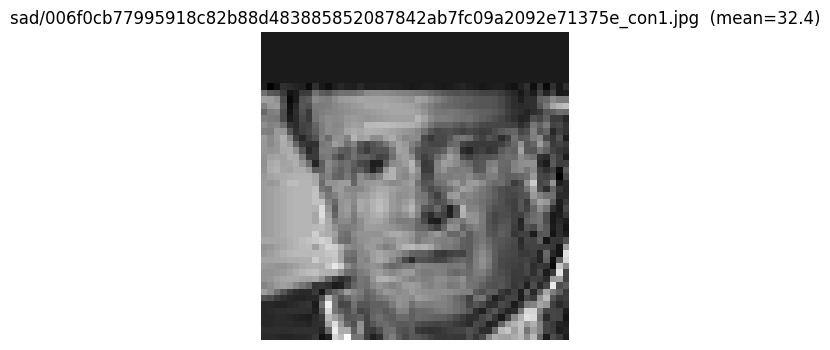

sad/006f0cb77995918c82b88d483885852087842ab7fc09a2092e71375e_rot1.jpg  (mean=31.9)


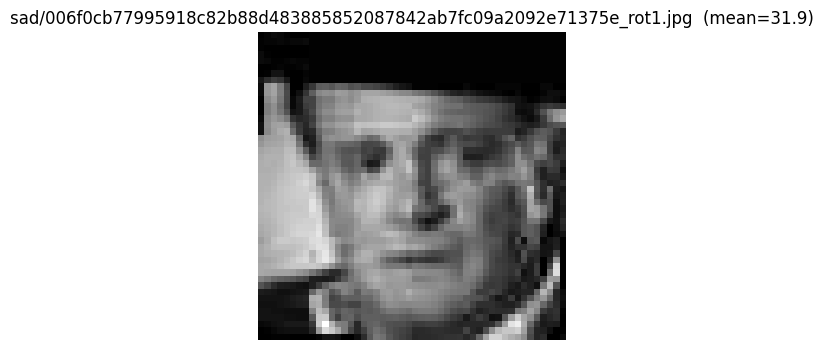

sad/01e6f06a4d94499b303cf7dc1369796b3bff3599598c97ae8943ffff_rot1.png  (mean=33.9)


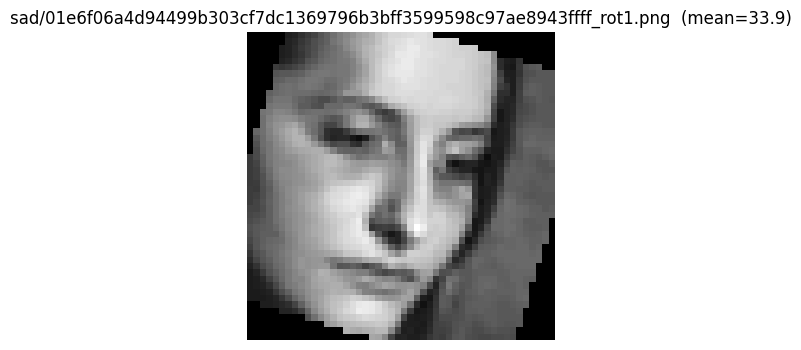

sad/02ccf3735b440fcb055309b01f0827799e7aa611ffb9d6e3d27e749b_rot1.jpg  (mean=32.1)


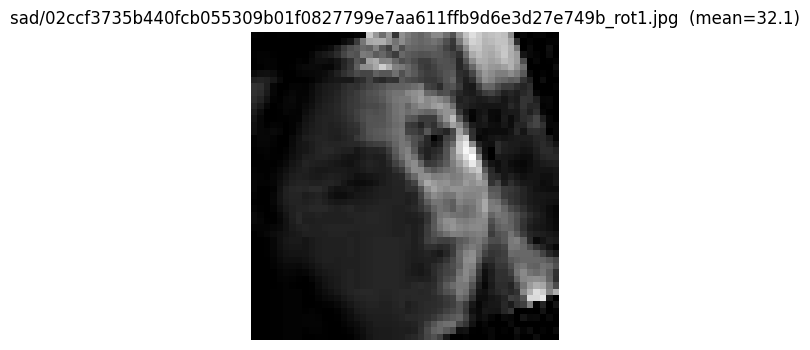

sad/0ce685232e5c277b2246c0816ca57849722a20753fb4ee99467118b5_con1.jpg  (mean=34.8)


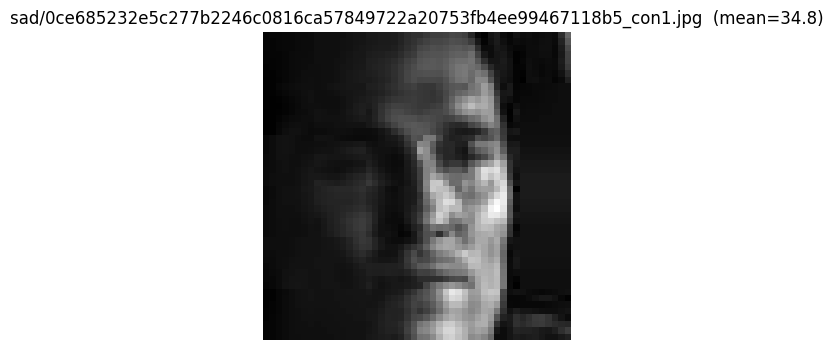

sad/0ce685232e5c277b2246c0816ca57849722a20753fb4ee99467118b5_rot1.jpg  (mean=34.7)


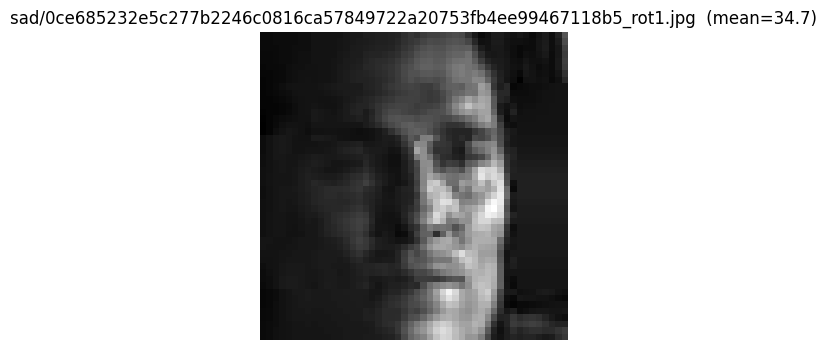

sad/0de3d66514bed70fdf0e25faf820b62933385c788216091735800116_rot1.jpg  (mean=33.9)


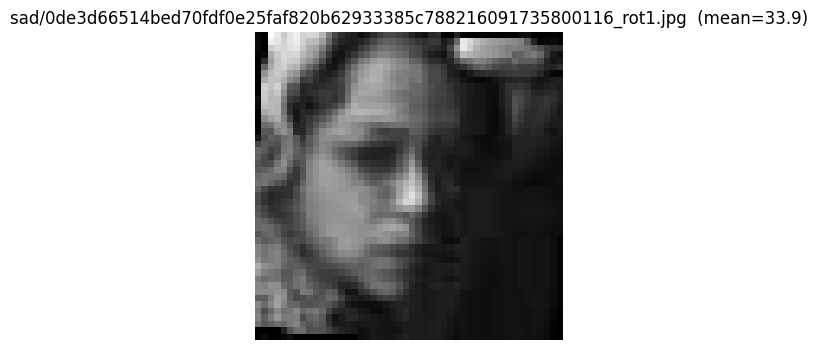

sad/0ee4e0489f58e9db1a792a2868a5a6d9789783313a8d50c42d619f17_rot1.png  (mean=34.4)


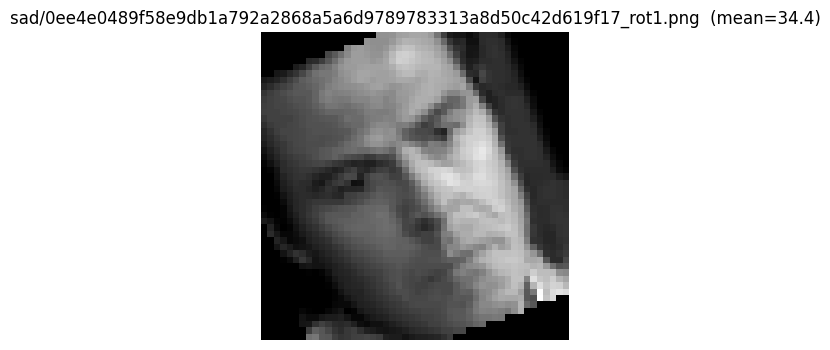

sad/0ee5c13473789f7c4a1efe8d61a1d3402338d143d68951b1884f4555.png  (mean=30.9)


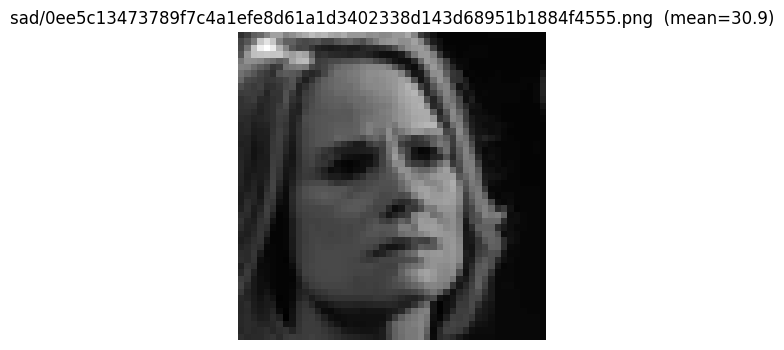

sad/0ee5c13473789f7c4a1efe8d61a1d3402338d143d68951b1884f4555_rot1.png  (mean=28.2)


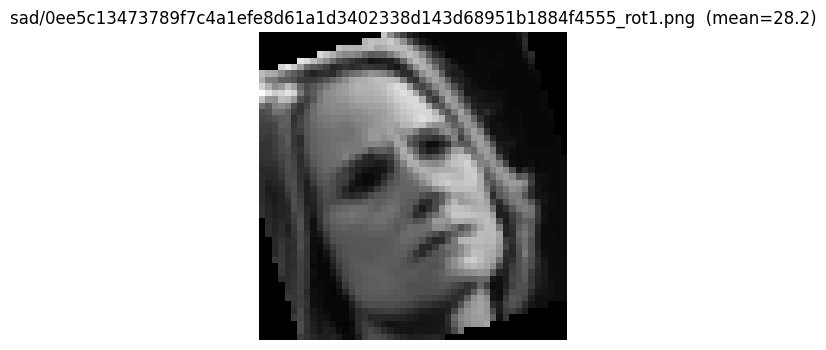

sad/0ee5c13473789f7c4a1efe8d61a1d3402338d143d68951b1884f4555_rot1_con1.png  (mean=27.6)


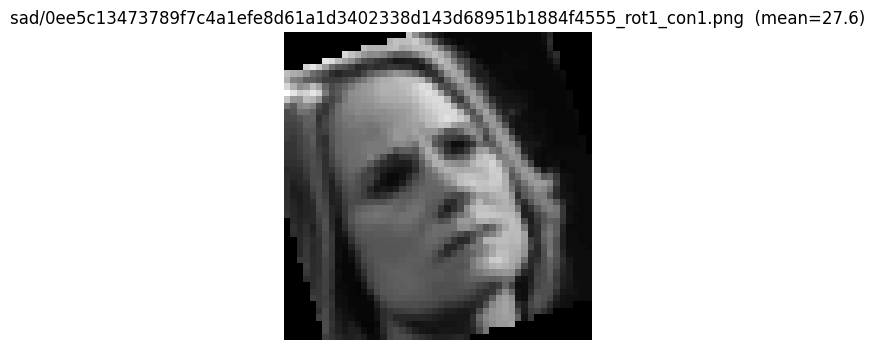

sad/0f0075fae2bf9dd5fa3a659879723a88b21633bed73d59b9230be19d.jpg  (mean=32.1)


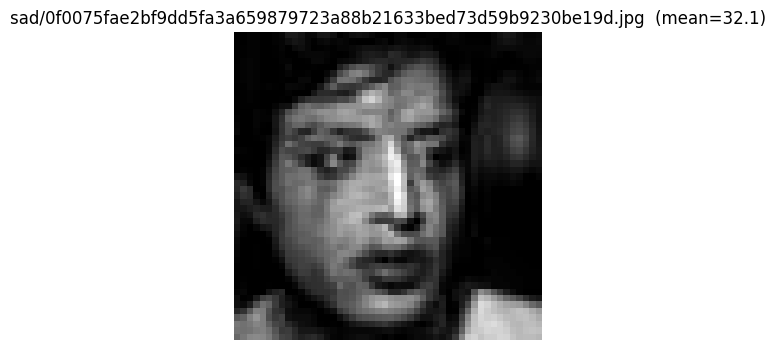

sad/0f0075fae2bf9dd5fa3a659879723a88b21633bed73d59b9230be19d_rot1.jpg  (mean=30.7)


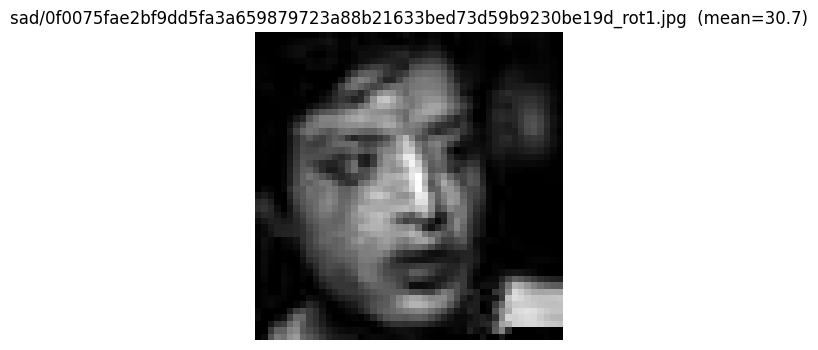

sad/0f0075fae2bf9dd5fa3a659879723a88b21633bed73d59b9230be19d_rot1_con1.jpg  (mean=30.3)


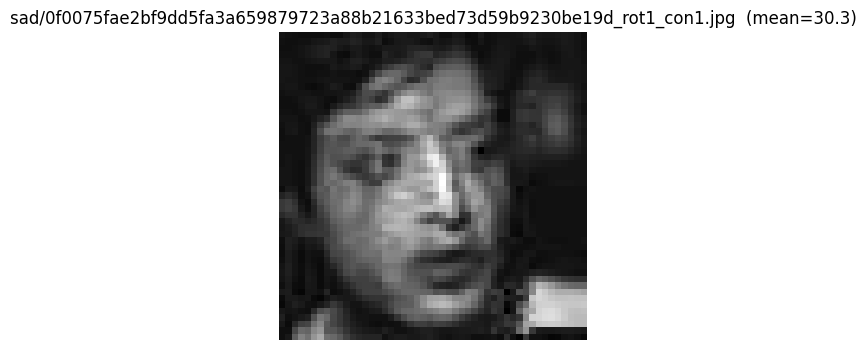

sad/0f3ec52dab18447a2e01d14f4ff66a9af55409c7b067bd8b6e6cc89c_rot1.jpg  (mean=33.9)


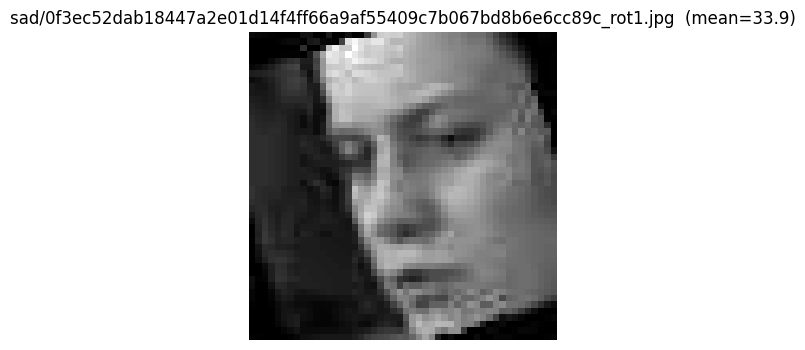

sad/0f3ec52dab18447a2e01d14f4ff66a9af55409c7b067bd8b6e6cc89c_rot1_con1.jpg  (mean=33.4)


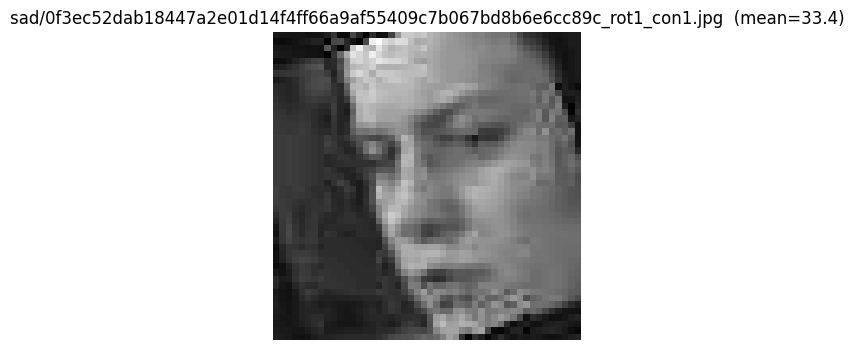

sad/0ff63b79dab958fada6d2e53b5eb008943666aacc9cdda19d106523b_rot1.jpeg  (mean=35.0)


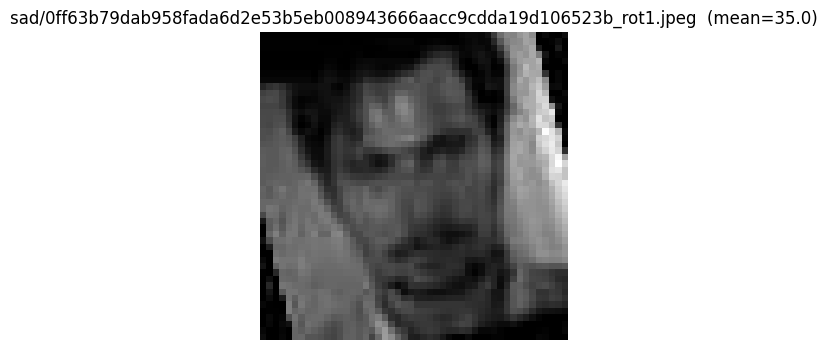

sad/1c1a365b256c9afd1bc001f53da6040d9c0c54383aedf57f90ae7f7f.jpg  (mean=32.9)


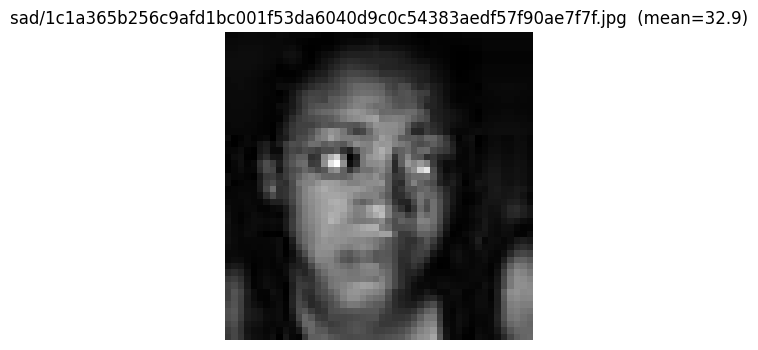

sad/1c1a365b256c9afd1bc001f53da6040d9c0c54383aedf57f90ae7f7f_rot1.jpg  (mean=30.2)


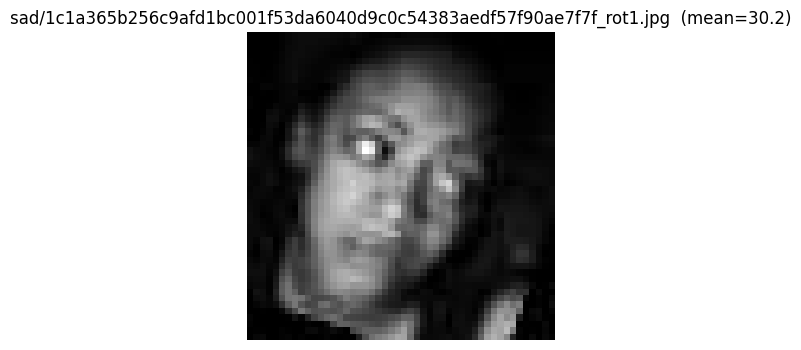

sad/1c1a365b256c9afd1bc001f53da6040d9c0c54383aedf57f90ae7f7f_rot1_con1.jpg  (mean=33.0)


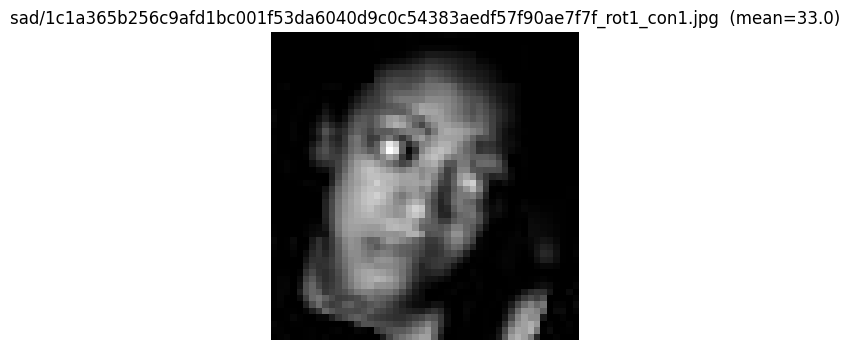

sad/1ce5aac258e1d16098f71c948ddec5d3b21e276bb67c55c97f9be5dc.jpg  (mean=31.9)


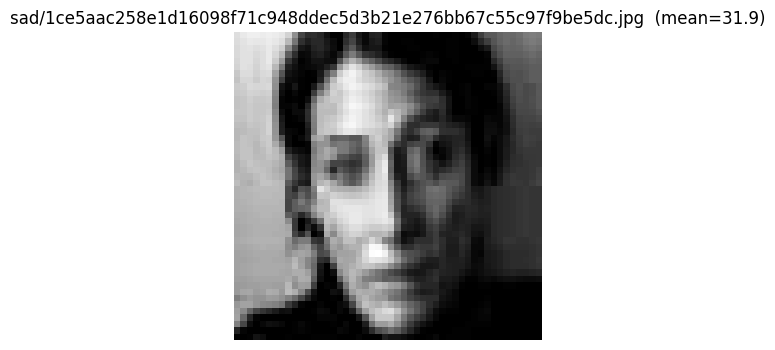

sad/1ce5aac258e1d16098f71c948ddec5d3b21e276bb67c55c97f9be5dc_rot1.jpg  (mean=30.9)


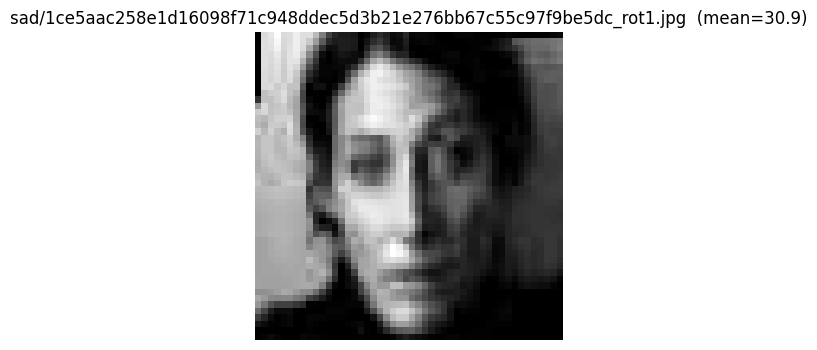

sad/1d071a395bff43adba35fdd98599ee9983f9d8d0148013fc9cd3abf3_rot1.jpg  (mean=33.7)


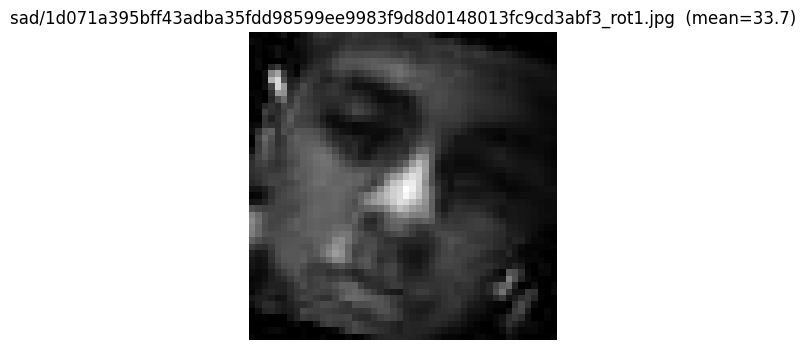

sad/1e4f25bd59f7240685d245ee8eae2db1a73bfad6fef4151aaef6c992_rot1.jpg  (mean=34.5)


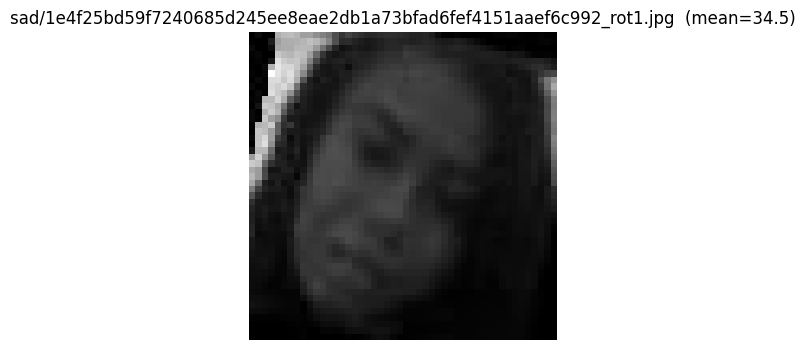

sad/2b07455edfd75ecd8fe18b4e63e24900fbee69e5198402d8ad0bf8e2.jpg  (mean=33.6)


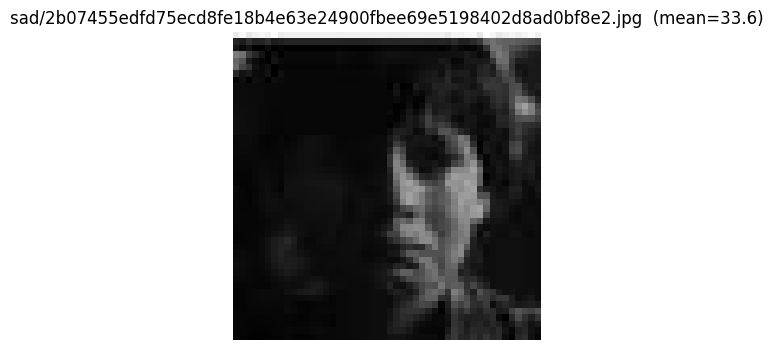

sad/2b07455edfd75ecd8fe18b4e63e24900fbee69e5198402d8ad0bf8e2_rot1.jpg  (mean=27.2)


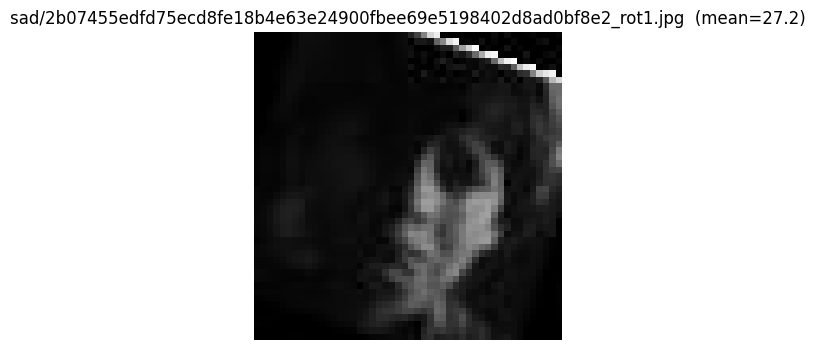

sad/2b79940a7f68ffda162b4b4e9c63f574b947781a5fd0294e861cfbf3.jpg  (mean=32.0)


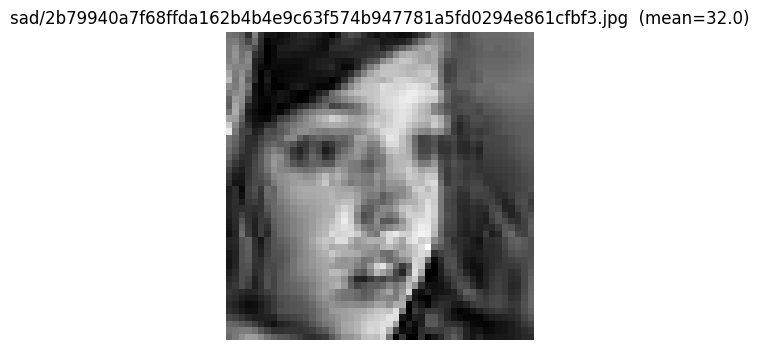

sad/2b79940a7f68ffda162b4b4e9c63f574b947781a5fd0294e861cfbf3_rot1.jpg  (mean=30.7)


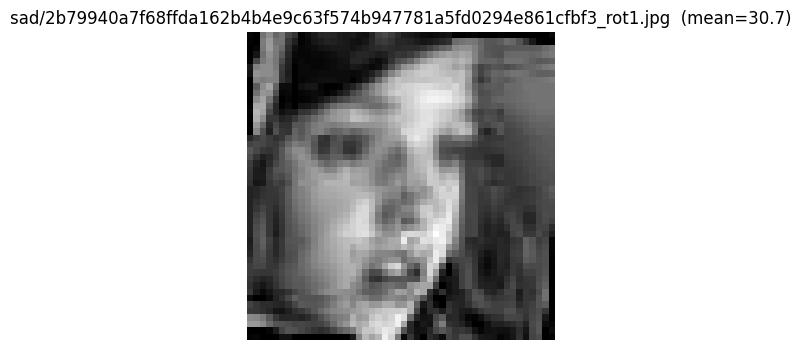

sad/2b79eaeb4fa4ab7b206d8038c36339d4282806094b9c3b46871a84c1.jpg  (mean=27.0)


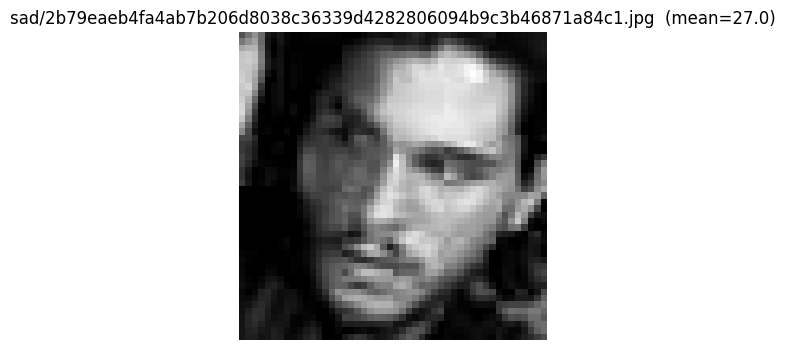

sad/2b79eaeb4fa4ab7b206d8038c36339d4282806094b9c3b46871a84c1_rot1.jpg  (mean=24.6)


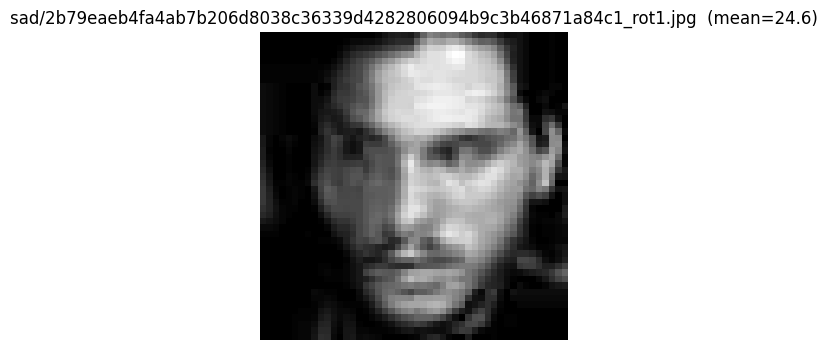

sad/2b79eaeb4fa4ab7b206d8038c36339d4282806094b9c3b46871a84c1_rot1_con1.jpg  (mean=26.1)


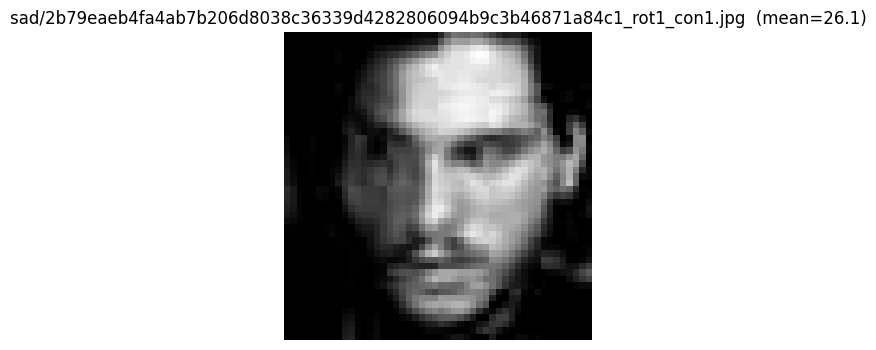

sad/2d58e18ef8f3a083deddee83f3013db0221589ad95ee15946cd8cb0e.jpg  (mean=29.5)


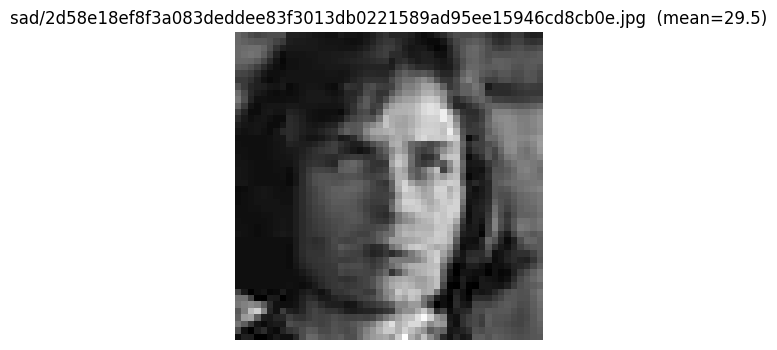

sad/2d58e18ef8f3a083deddee83f3013db0221589ad95ee15946cd8cb0e_rot1.jpg  (mean=27.7)


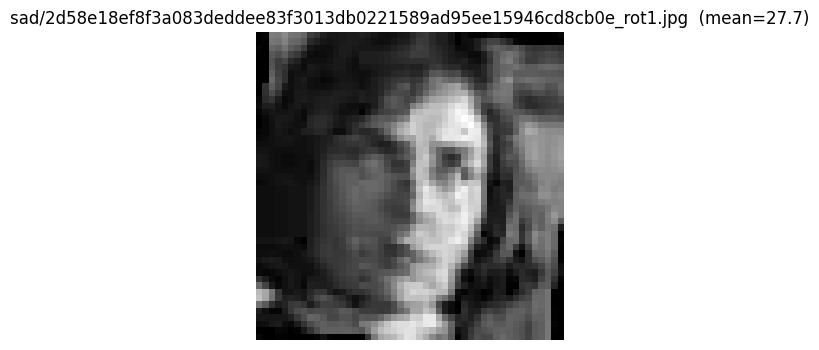

sad/3ac8c474dacad4840ea2b46d60a42dd51cc92f2068d5129237d89b8d.jpg  (mean=27.8)


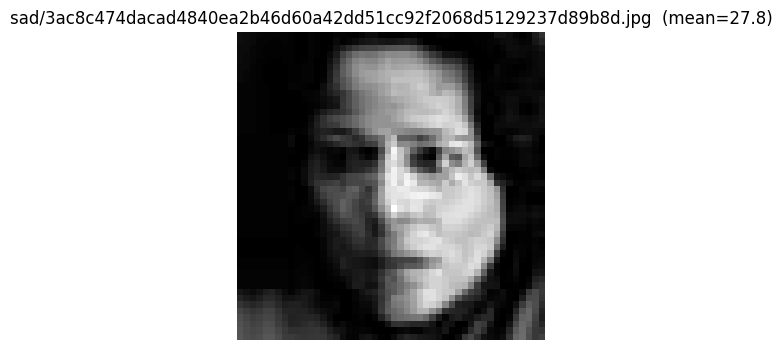

sad/3ac8c474dacad4840ea2b46d60a42dd51cc92f2068d5129237d89b8d_rot1.jpg  (mean=27.2)


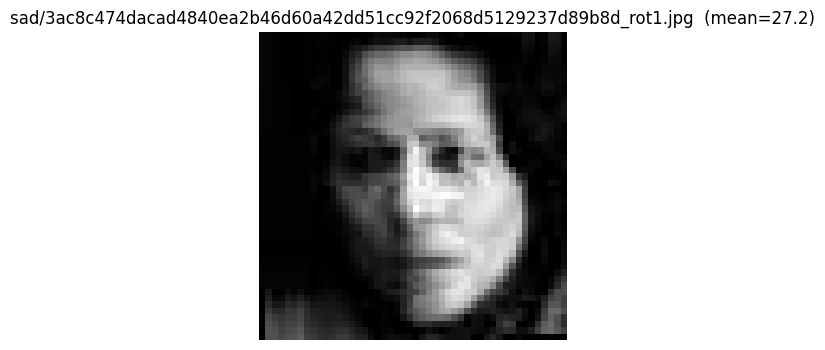

sad/3cb29ebe17717d2ba2197a22fa3110276f3c1a3df0bcf884d6a6e279.jpg  (mean=23.7)


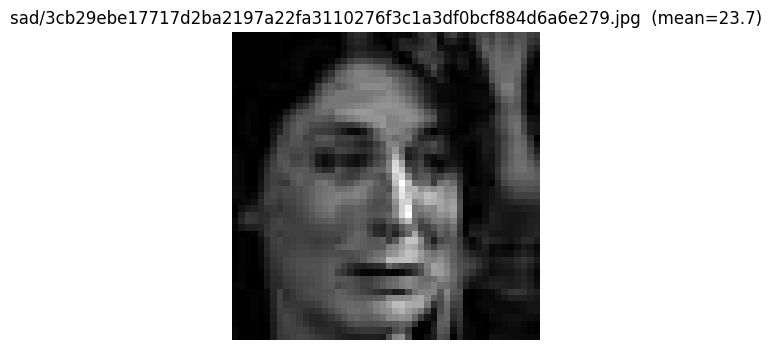

sad/3cb29ebe17717d2ba2197a22fa3110276f3c1a3df0bcf884d6a6e279_rot1.jpg  (mean=23.3)


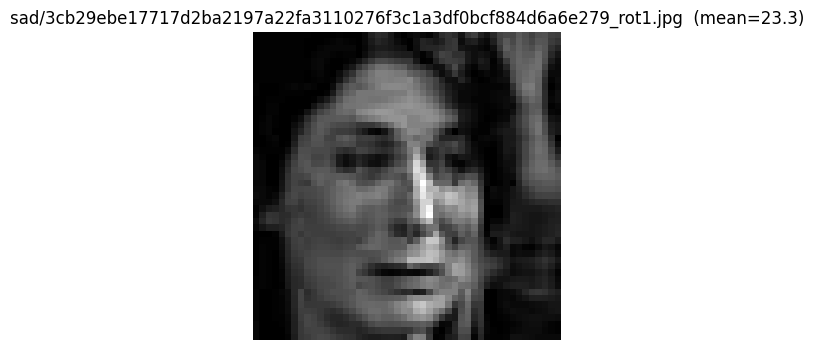

sad/3ce675b1ac26ec5138df0be25e72aa314d33a7b4bd7c4f99f376d313_rot1.jpg  (mean=34.3)


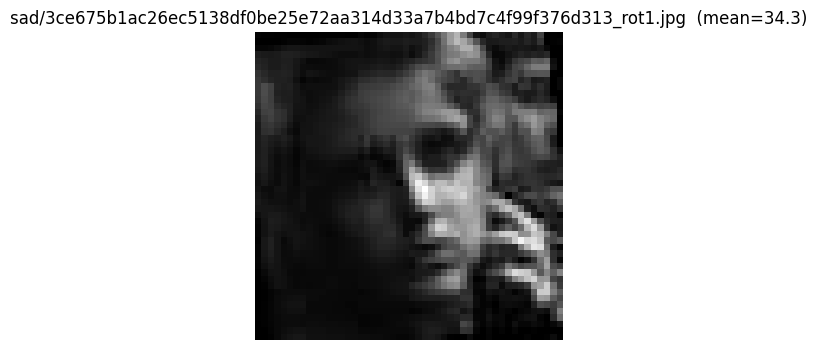

sad/3d107ff4d46429be0fe27e9d3f1c31db1da0612357b878a390d46b37.jpg  (mean=32.7)


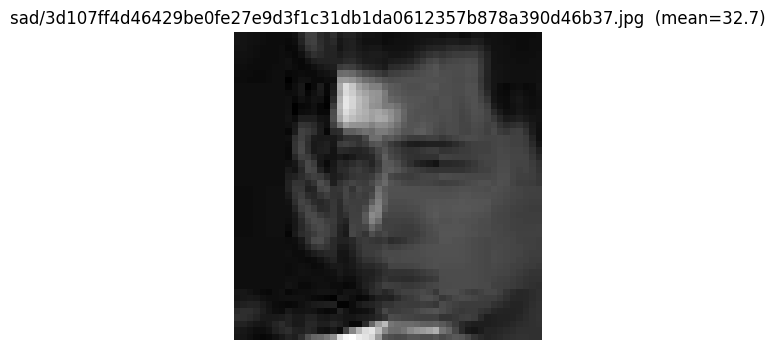

sad/3d107ff4d46429be0fe27e9d3f1c31db1da0612357b878a390d46b37_con1.jpg  (mean=32.2)


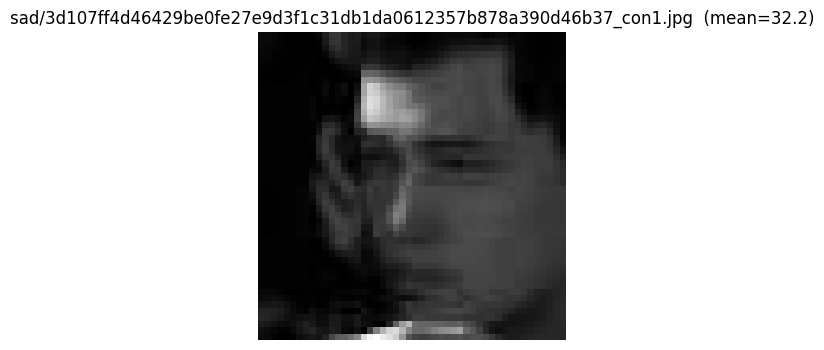

sad/3d107ff4d46429be0fe27e9d3f1c31db1da0612357b878a390d46b37_rot1.jpg  (mean=29.9)


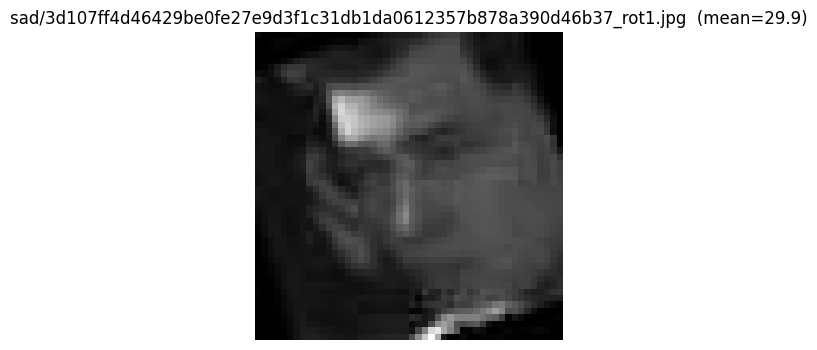

sad/3d107ff4d46429be0fe27e9d3f1c31db1da0612357b878a390d46b37_rot1_con1.jpg  (mean=29.4)


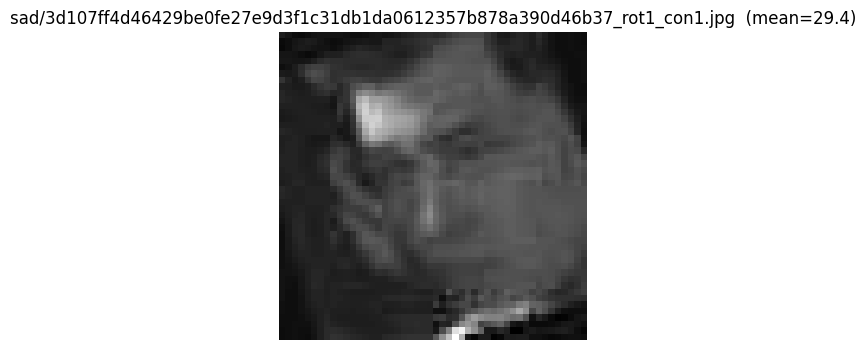

sad/3fa3a22537399c0e0fa4457a13f0ac0d1069926d2fbda11a6dc8a95e.png  (mean=32.7)


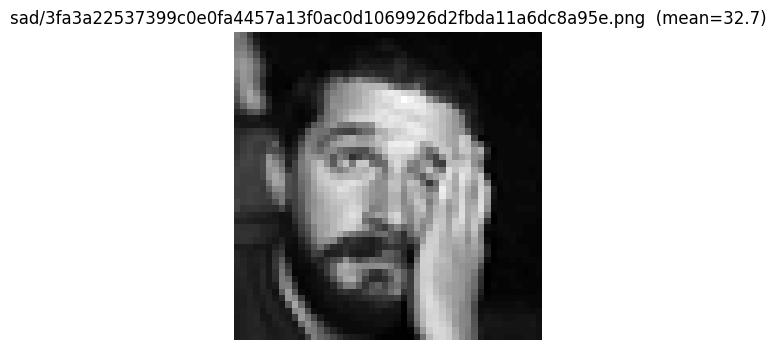

sad/3fa3a22537399c0e0fa4457a13f0ac0d1069926d2fbda11a6dc8a95e_rot1.png  (mean=30.3)


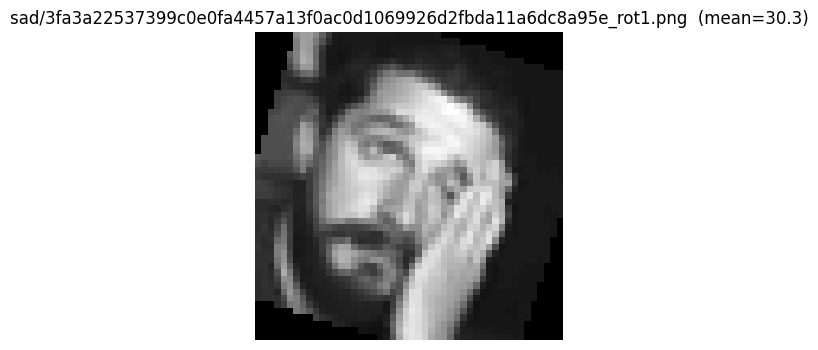

sad/4dc5d85d2ef804b3dd5441d5cdba85027beee20f70c4349faaf54b4e.jpg  (mean=25.5)


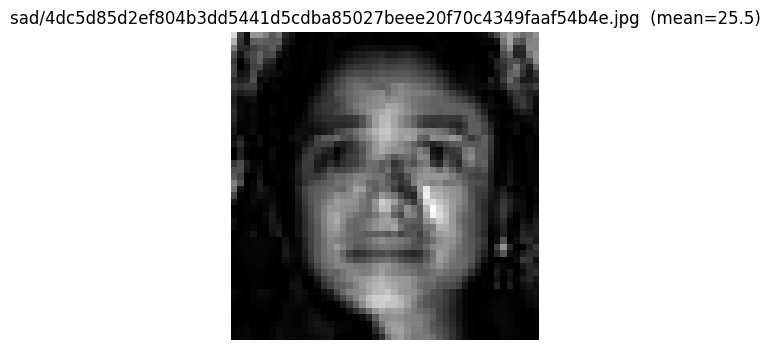

sad/4dc5d85d2ef804b3dd5441d5cdba85027beee20f70c4349faaf54b4e_rot1.jpg  (mean=24.2)


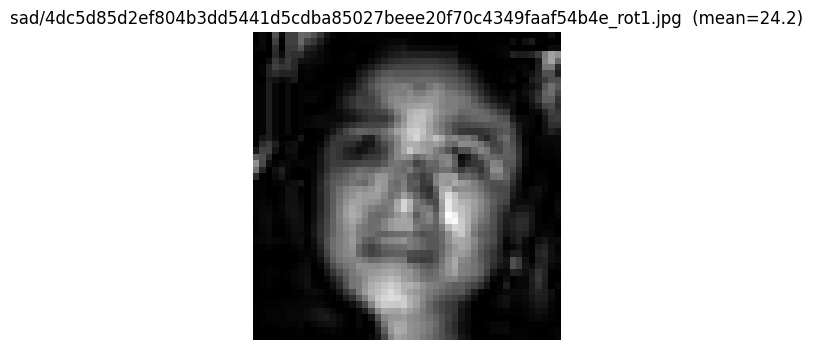

sad/4dc5d85d2ef804b3dd5441d5cdba85027beee20f70c4349faaf54b4e_rot1_con1.jpg  (mean=27.7)


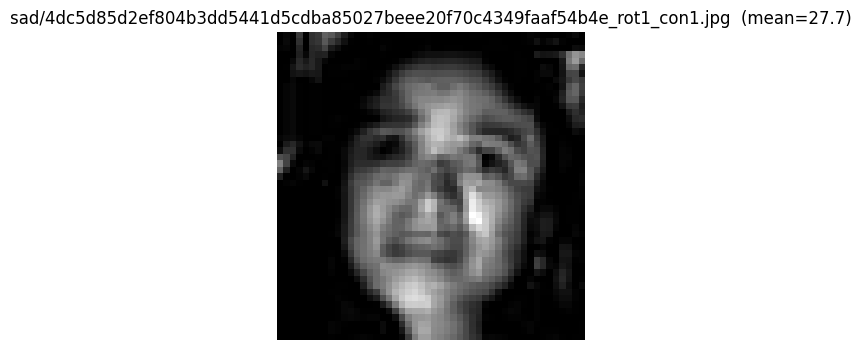

sad/5a25c89c62aaade6a10e374e73680637fcfec0f464d176e5785dca5b.png  (mean=22.8)


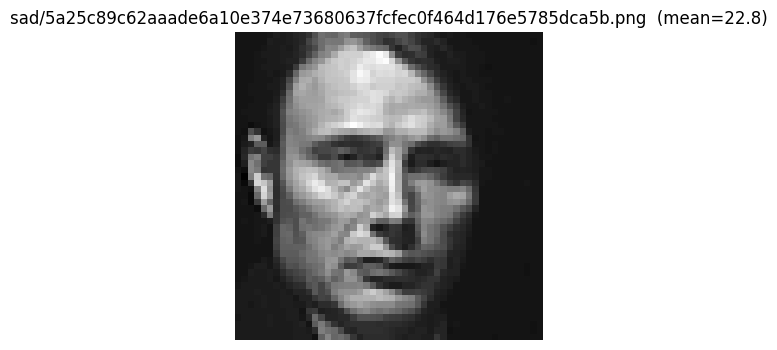

sad/5a25c89c62aaade6a10e374e73680637fcfec0f464d176e5785dca5b_con1.png  (mean=22.3)


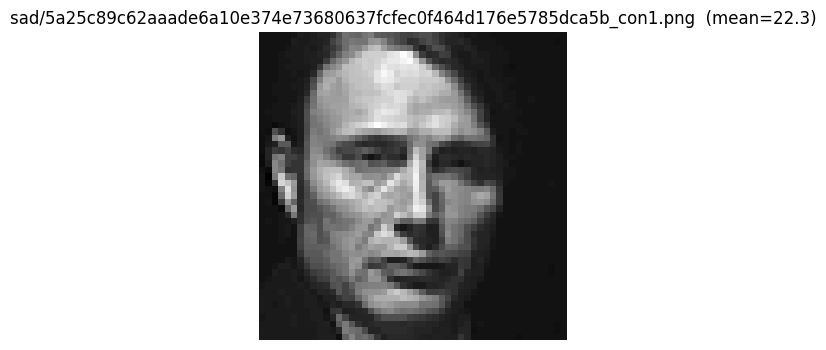

sad/5a25c89c62aaade6a10e374e73680637fcfec0f464d176e5785dca5b_rot1.png  (mean=22.3)


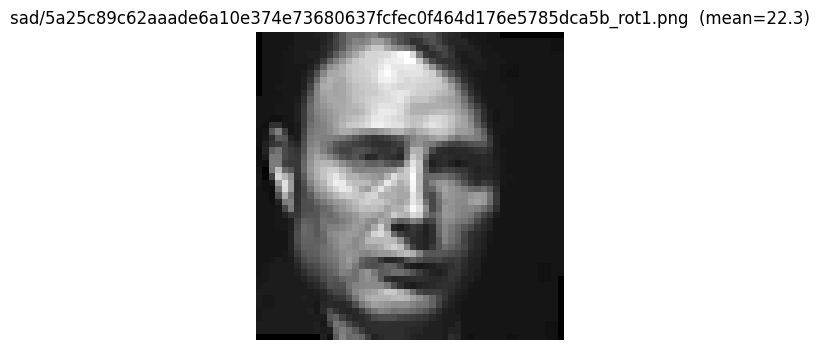

sad/5a25c89c62aaade6a10e374e73680637fcfec0f464d176e5785dca5b_rot1_con1.png  (mean=21.8)


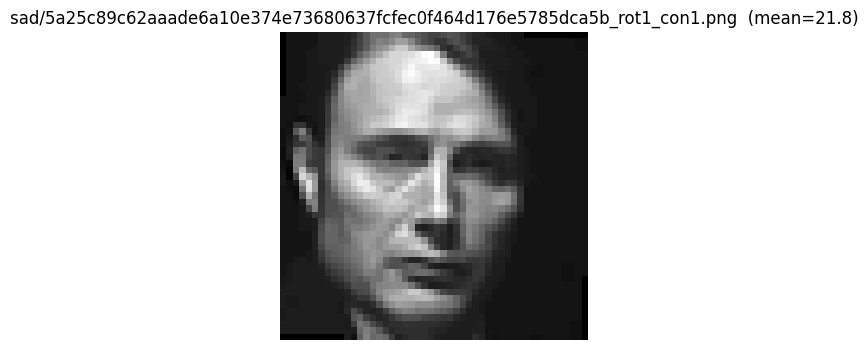

sad/5ac9bc4c2c9880146a0bc38317980201f7da4eb6d930e6ff078c2e80_rot1.jpg  (mean=34.8)


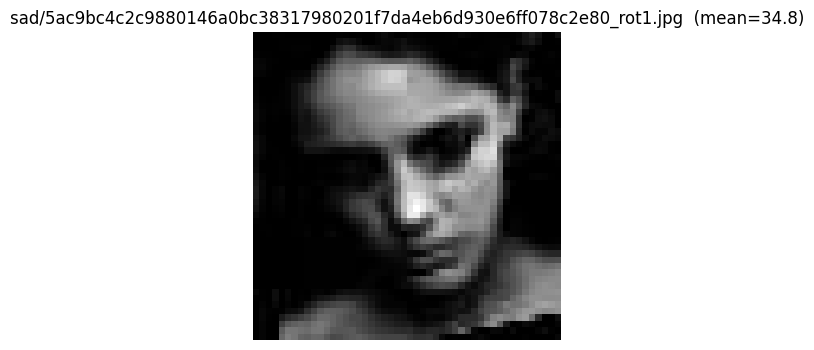

sad/5bbd042066ed84e96602365d6d57955757fa486b19b93c5e640ea22a_rot1.jpg  (mean=33.4)


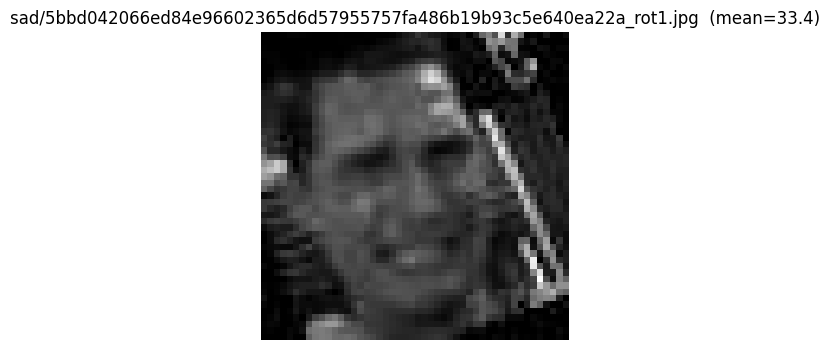

sad/5c685d82d0bb73ee91e12660f542b39537f4f4a3b266c89da7c7b3fb.png  (mean=18.8)


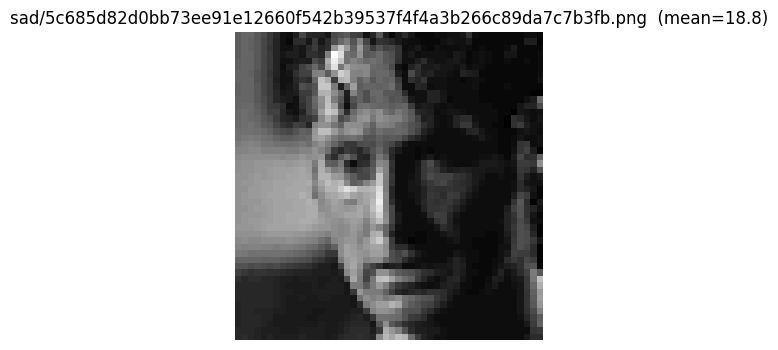

sad/5c685d82d0bb73ee91e12660f542b39537f4f4a3b266c89da7c7b3fb_rot1.png  (mean=17.3)


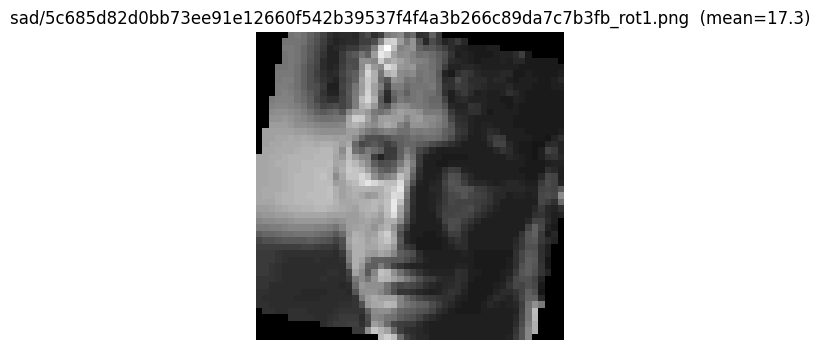

sad/5d4086c4ad3de6a6d9a9b73a4f57e0edd98883851997d077014de35f.png  (mean=28.1)


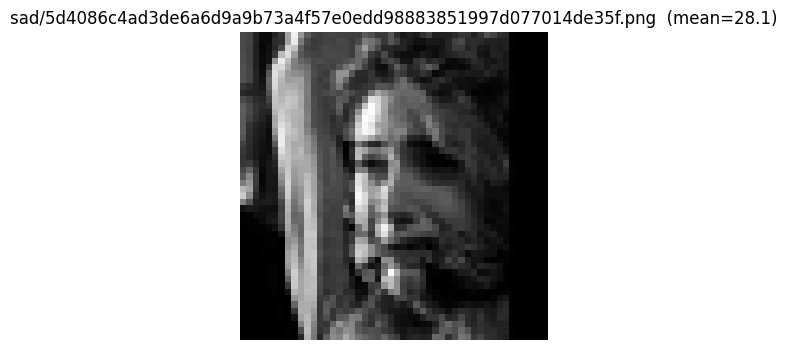

sad/5d4086c4ad3de6a6d9a9b73a4f57e0edd98883851997d077014de35f_rot1.png  (mean=27.3)


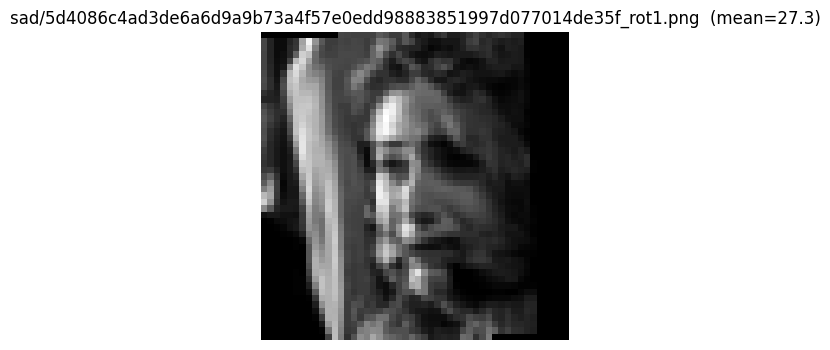

sad/5e9ba4a6cffb5a62c519d441359a7e536bffd6c6f1451469dc2033f7.png  (mean=24.6)


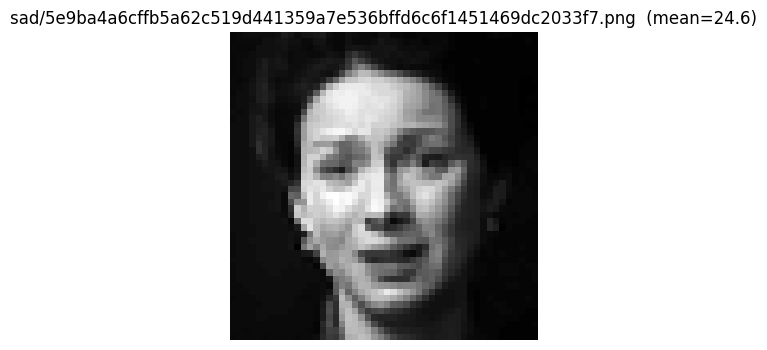

sad/5e9ba4a6cffb5a62c519d441359a7e536bffd6c6f1451469dc2033f7_rot1.png  (mean=24.0)


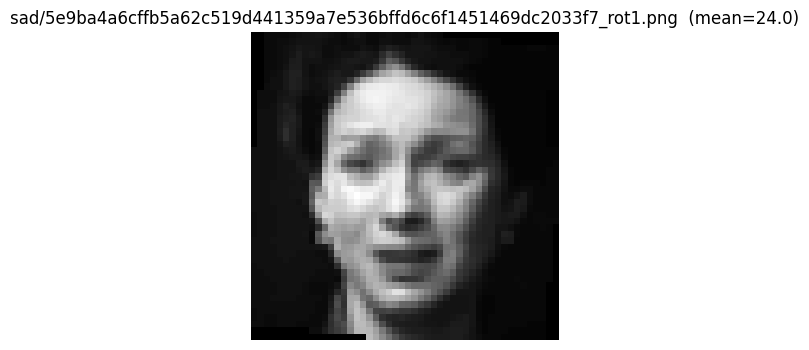

sad/6b84e70fe72ece5326826f30fc7d0ba64c396c952edf1abf8041fa8c.jpg  (mean=22.1)


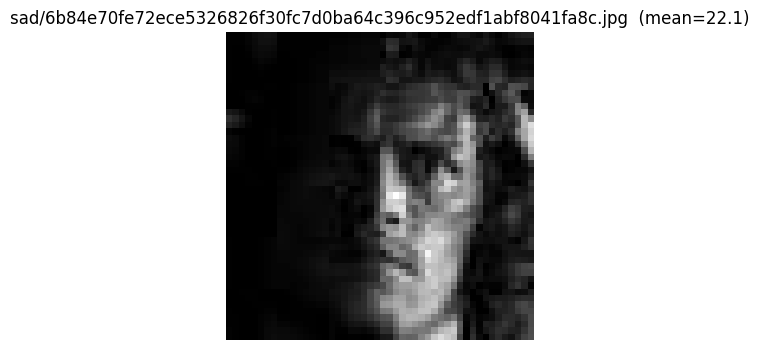

sad/6b84e70fe72ece5326826f30fc7d0ba64c396c952edf1abf8041fa8c_rot1.jpg  (mean=21.3)


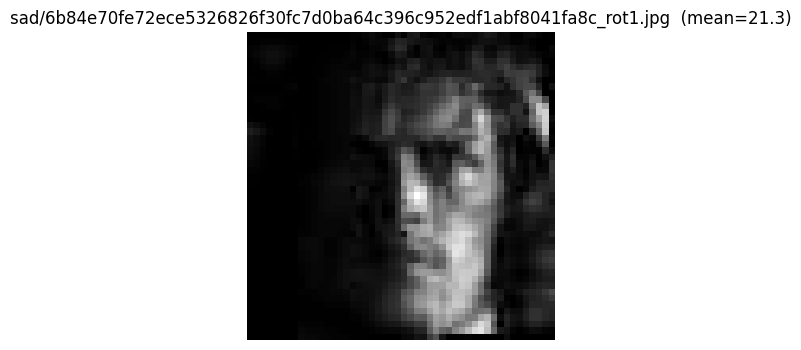

sad/6b9172a6875e9ef091e740a58350e100f2ebb5788f3d92fc8c3c557a_rot1.png  (mean=33.9)


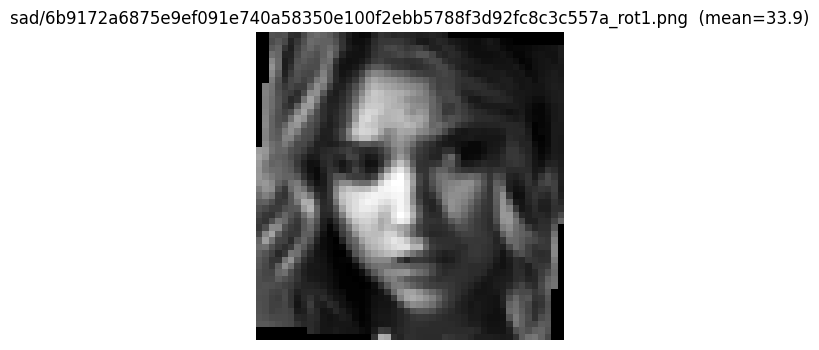

sad/6b9172a6875e9ef091e740a58350e100f2ebb5788f3d92fc8c3c557a_rot1_con1.png  (mean=34.2)


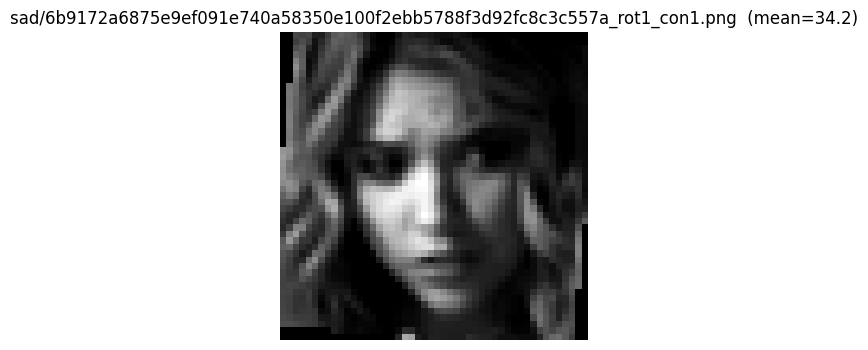

sad/6c4b4982822536cc1fad8e44a9db98012d26615cf85862987d08c150.jpg  (mean=29.4)


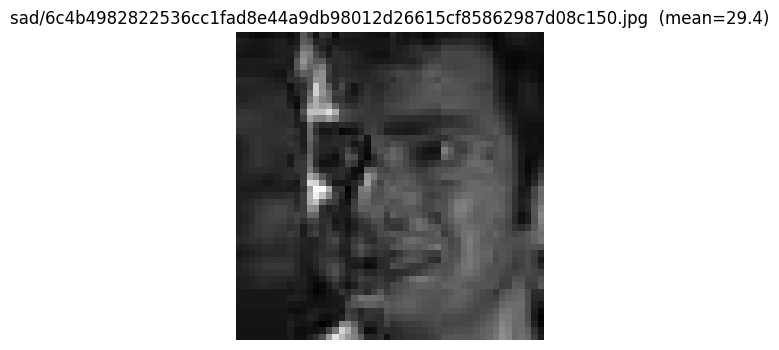

sad/6c4b4982822536cc1fad8e44a9db98012d26615cf85862987d08c150_con1.jpg  (mean=29.1)


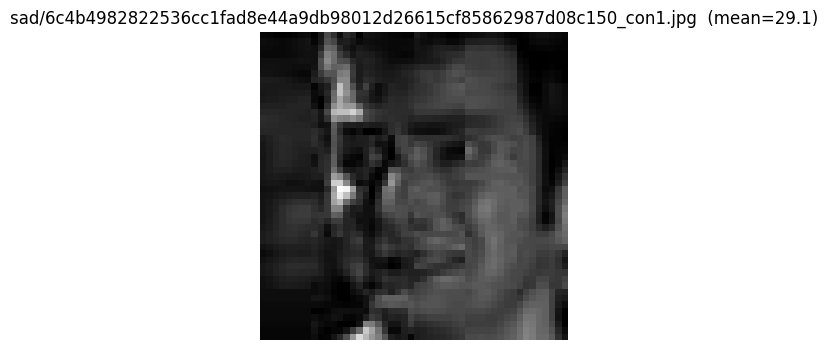

sad/6c4b4982822536cc1fad8e44a9db98012d26615cf85862987d08c150_rot1.jpg  (mean=26.5)


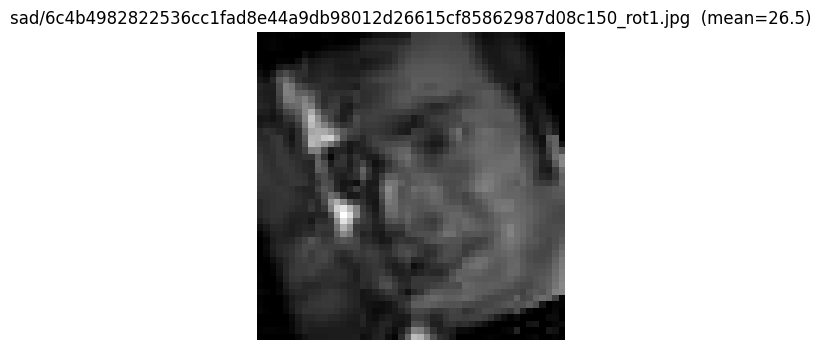

sad/6c4b4982822536cc1fad8e44a9db98012d26615cf85862987d08c150_rot1_con1.jpg  (mean=26.8)


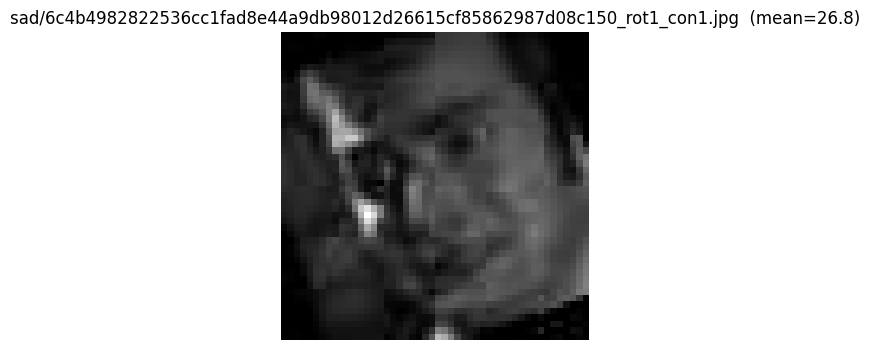

sad/6d4df110bd5eca0e46925e53198e26899c272e5c5350eb12f8a2b8b9.jpg  (mean=28.7)


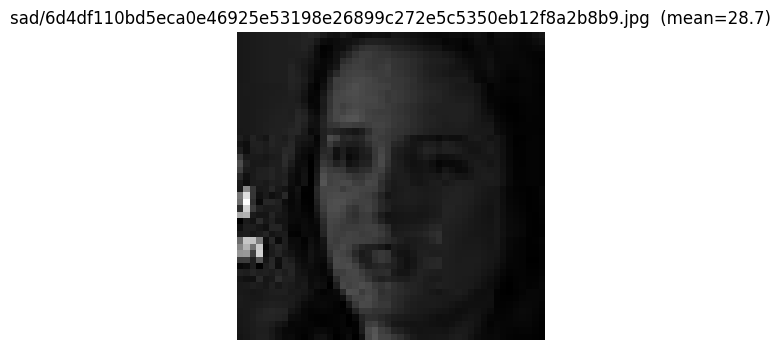

sad/6d4df110bd5eca0e46925e53198e26899c272e5c5350eb12f8a2b8b9_rot1.jpg  (mean=27.9)


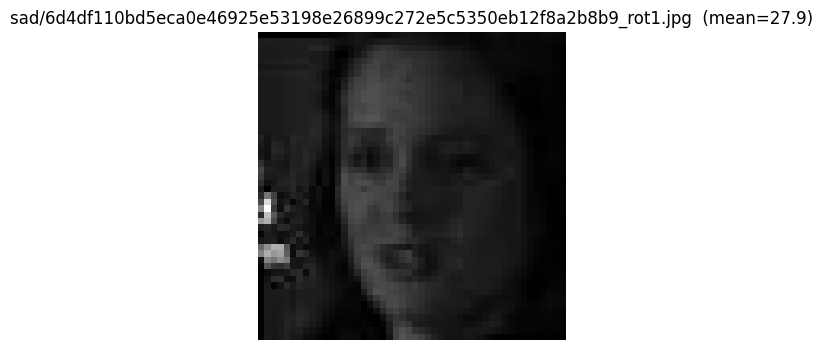

sad/6f3ec1d11ed8094710c0458a57565e2f59567eb7f259ace241426358.jpg  (mean=31.4)


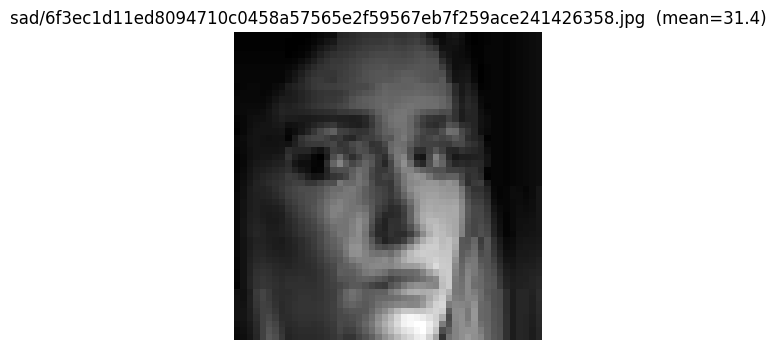

sad/6f3ec1d11ed8094710c0458a57565e2f59567eb7f259ace241426358_rot1.jpg  (mean=29.8)


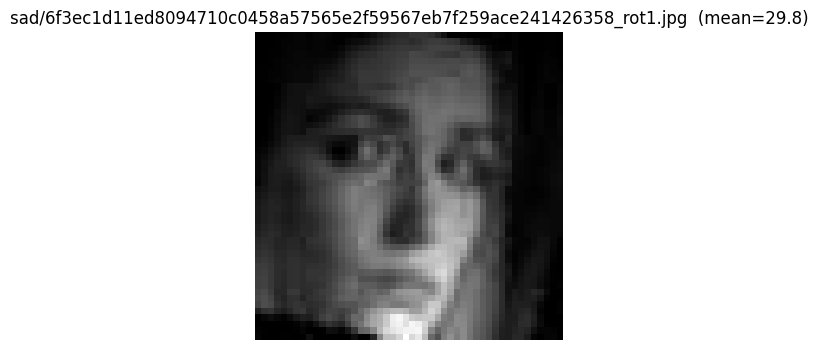

sad/6f4df13163d96b07f725e47672eb6bf97c501adb463c6c57c25fb4e9_rot1.jpg  (mean=33.8)


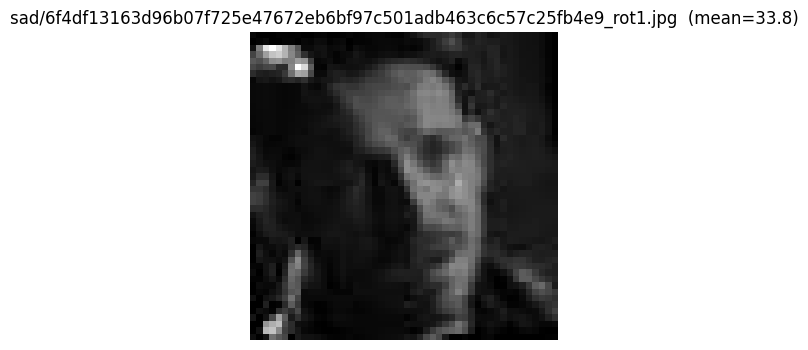

sad/7b081290410e3f9b3ac7b8cccaa315152d50fbf255423c65411f1029.JPG  (mean=32.5)


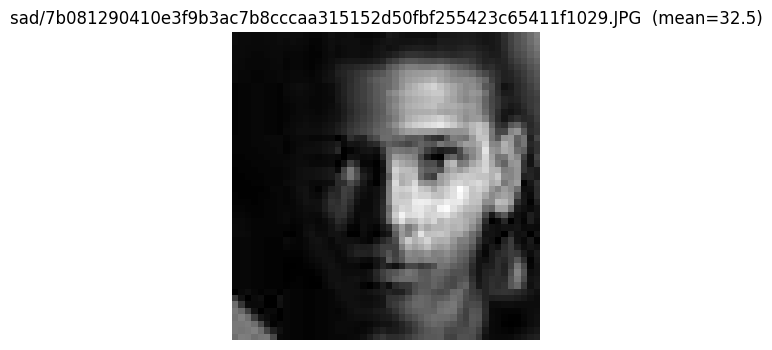

sad/7b081290410e3f9b3ac7b8cccaa315152d50fbf255423c65411f1029_rot1.JPG  (mean=30.9)


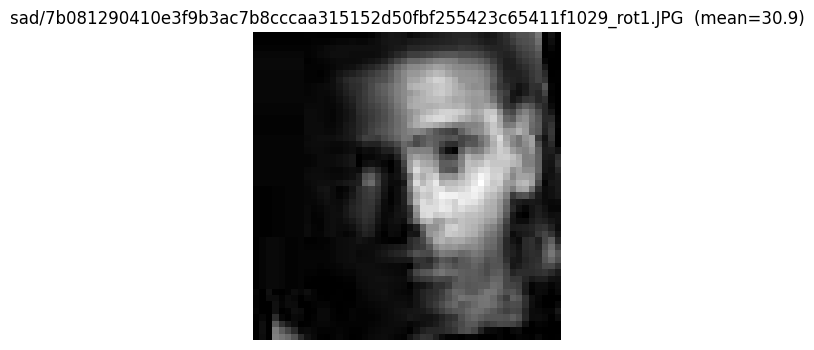

sad/7bc1cec2d6d75cacfa51a62c036c20b32d4c10d9edad782a5f676ecc_rot1.jpg  (mean=33.6)


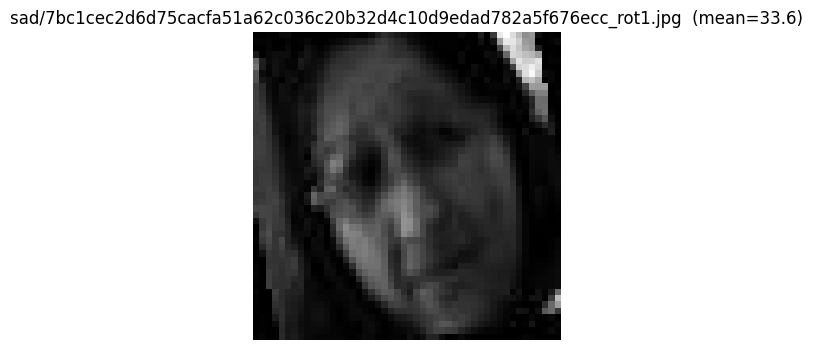

sad/7bc1cec2d6d75cacfa51a62c036c20b32d4c10d9edad782a5f676ecc_rot1_con1.jpg  (mean=33.1)


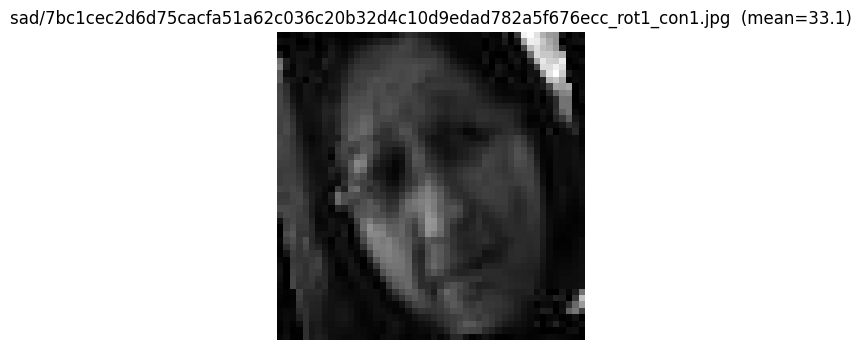

sad/7c19370f8b36ba428727cd2209696dd712a6bbe5c4ebe0c207e309c5.jpg  (mean=33.0)


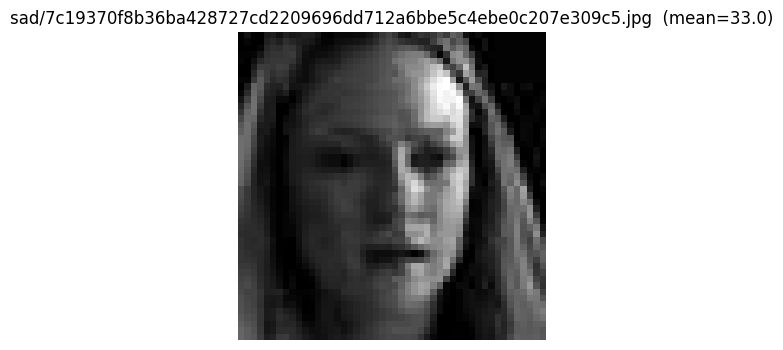

sad/7c19370f8b36ba428727cd2209696dd712a6bbe5c4ebe0c207e309c5_rot1.jpg  (mean=32.2)


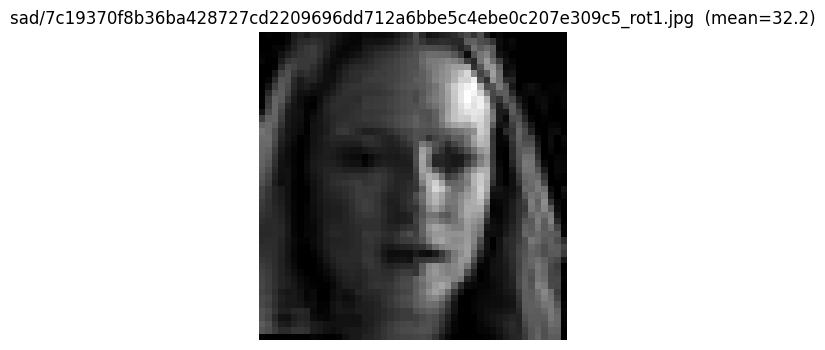

sad/7c1ddb2403dad0b2a14871e923ddda5f69715691655d4d0732d08d75.png  (mean=29.8)


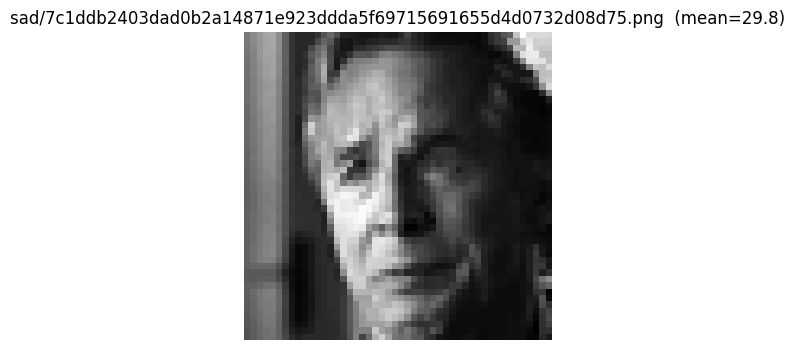

sad/7c1ddb2403dad0b2a14871e923ddda5f69715691655d4d0732d08d75_con1.png  (mean=29.4)


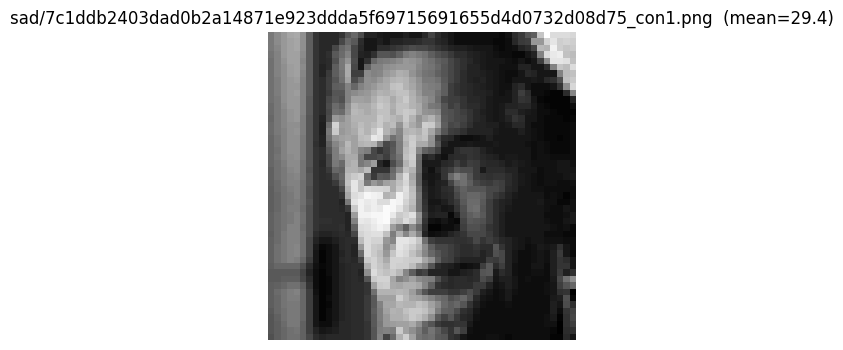

sad/7c1ddb2403dad0b2a14871e923ddda5f69715691655d4d0732d08d75_rot1.png  (mean=25.5)


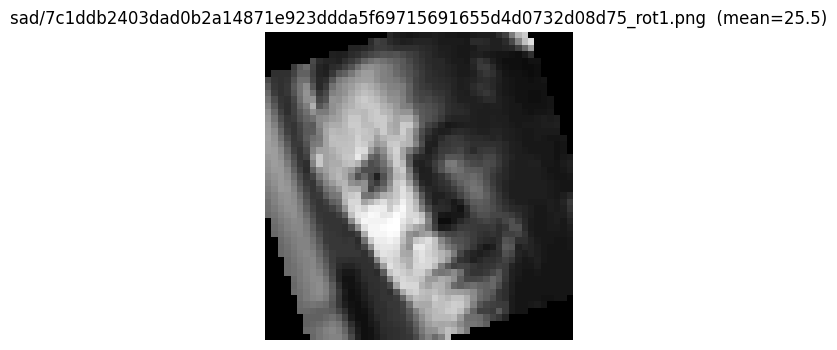

sad/7c1ddb2403dad0b2a14871e923ddda5f69715691655d4d0732d08d75_rot1_con1.png  (mean=25.4)


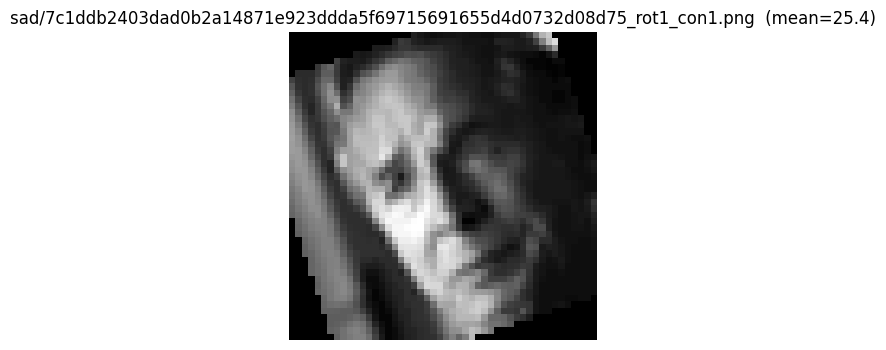

sad/8a16399d21b0303de60ad0ebb2acd4c5434aaeef74b294905ebc88aa.jpg  (mean=33.9)


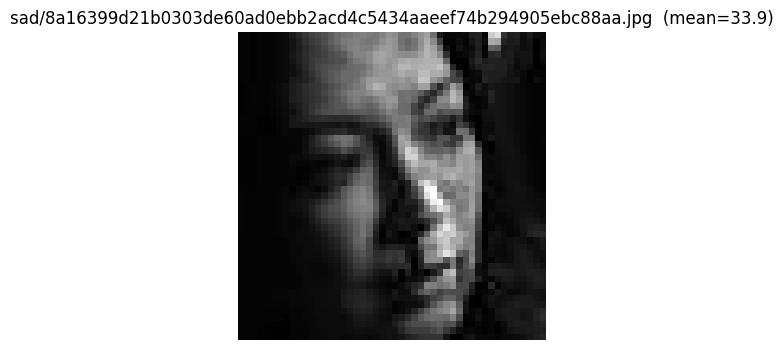

sad/8a16399d21b0303de60ad0ebb2acd4c5434aaeef74b294905ebc88aa_rot1.jpg  (mean=32.7)


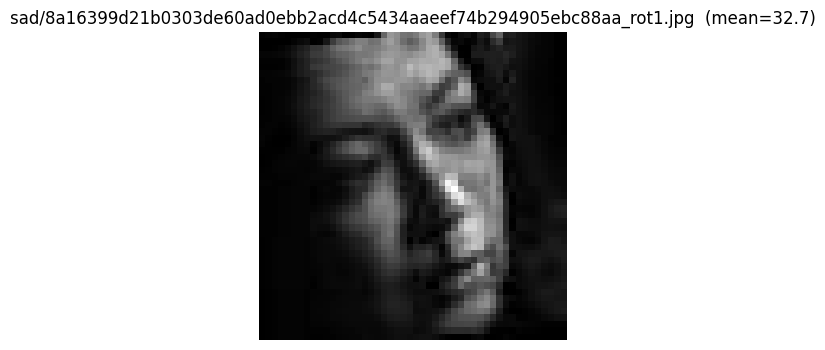

sad/8a16399d21b0303de60ad0ebb2acd4c5434aaeef74b294905ebc88aa_rot1_con1.jpg  (mean=32.4)


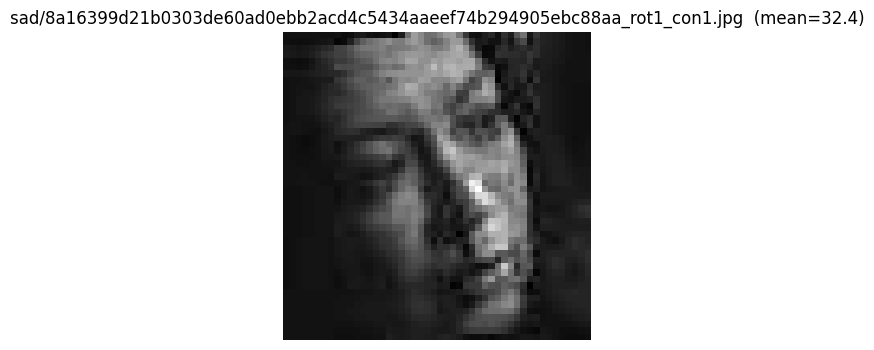

sad/8b48a2c72a1bf9ee3b11a4e6cb2d4e2e0f3d0c7474037ffea6457515_rot1.jpg  (mean=34.7)


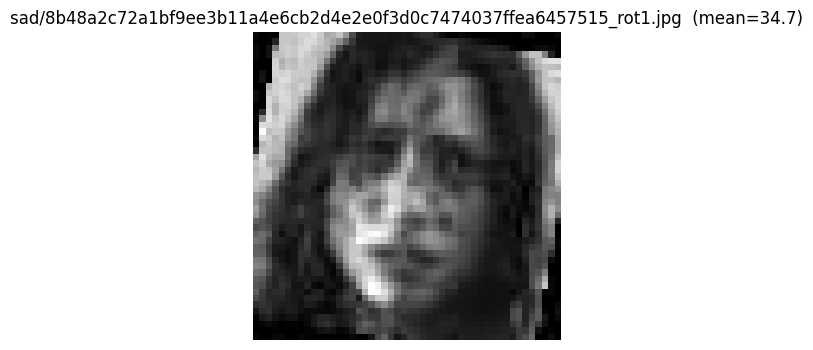

sad/PrivateTest_13548922.jpg  (mean=28.1)


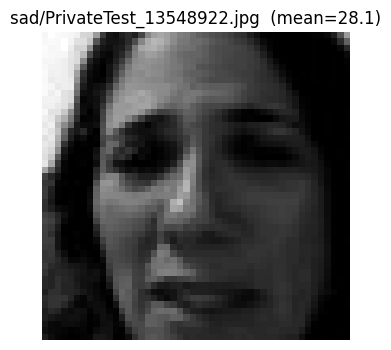

sad/PrivateTest_13548922_rot1.jpg  (mean=24.1)


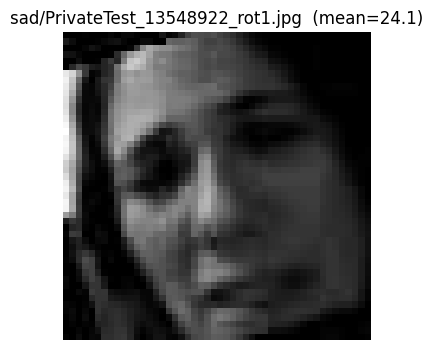

sad/PrivateTest_51713257.jpg  (mean=32.1)


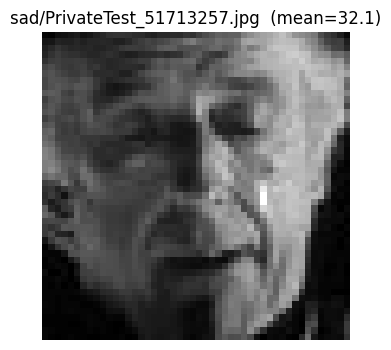

sad/PrivateTest_51713257_rot1.jpg  (mean=29.9)


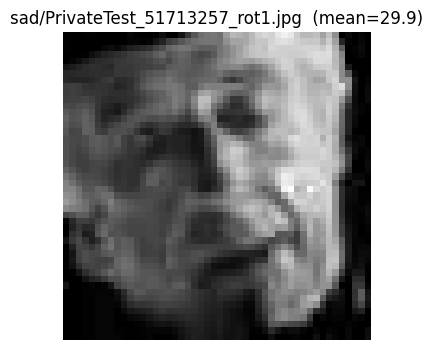

sad/PrivateTest_65376947.jpg  (mean=32.1)


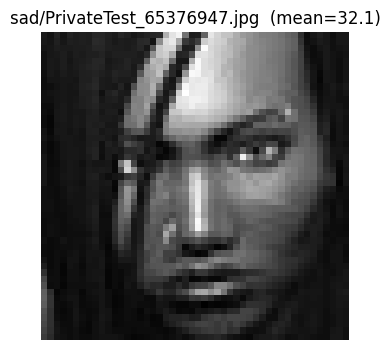

sad/PrivateTest_65376947_rot1.jpg  (mean=30.9)


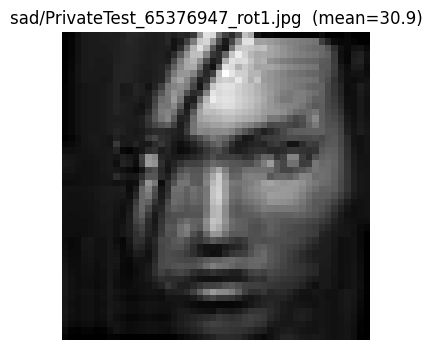

sad/PrivateTest_82792706.jpg  (mean=244.3)


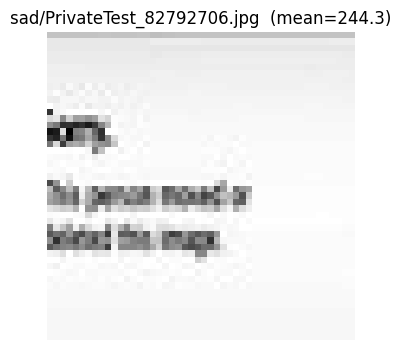

sad/PrivateTest_82792706_rot1.jpg  (mean=224.3)


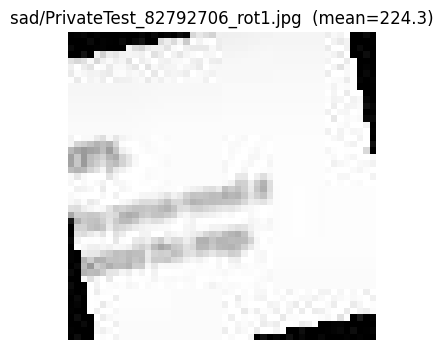

sad/PrivateTest_87408076.jpg  (mean=35.0)


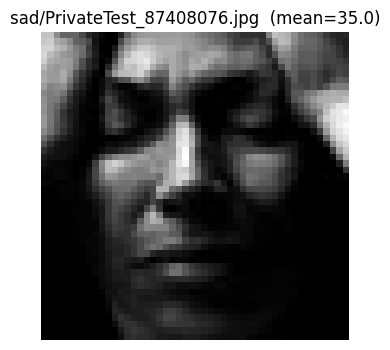

sad/PrivateTest_87408076_rot1.jpg  (mean=31.8)


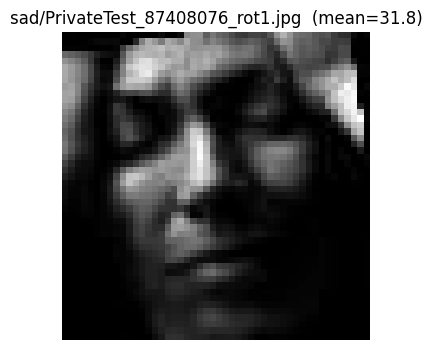

sad/PrivateTest_87408076_rot1_con1.jpg  (mean=31.4)


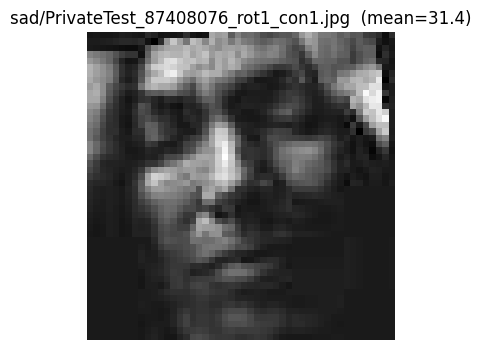

sad/PrivateTest_92062027_rot1.jpg  (mean=32.4)


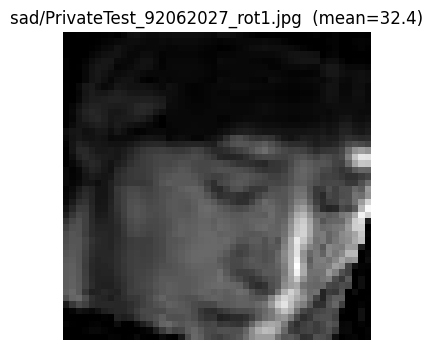

sad/PrivateTest_94692871.jpg  (mean=25.7)


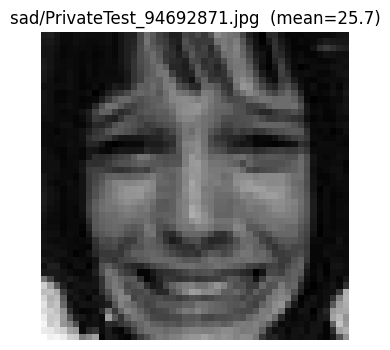

sad/PrivateTest_94692871_rot1.jpg  (mean=23.9)


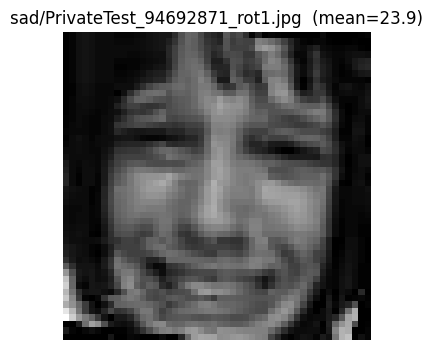

sad/PublicTest_38685191.jpg  (mean=33.0)


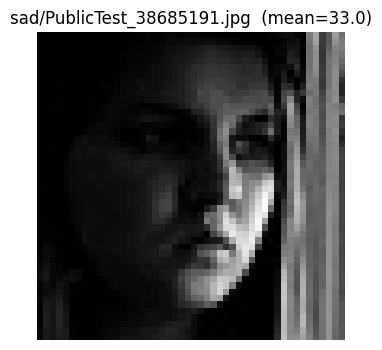

sad/PublicTest_38685191_con1.jpg  (mean=34.6)


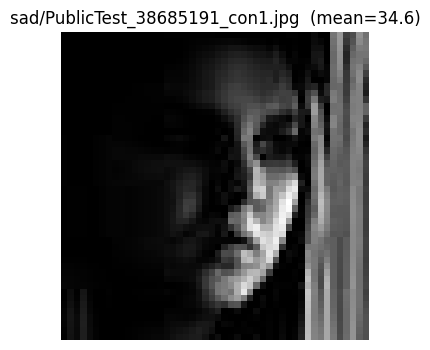

sad/PublicTest_38685191_rot1.jpg  (mean=31.3)


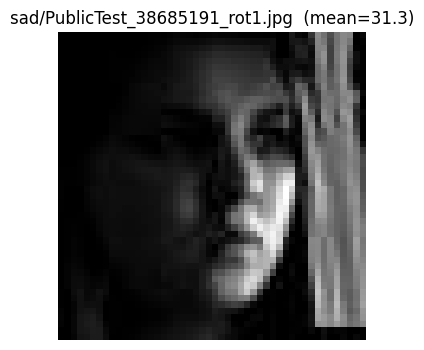

sad/PublicTest_38685191_rot1_con1.jpg  (mean=30.8)


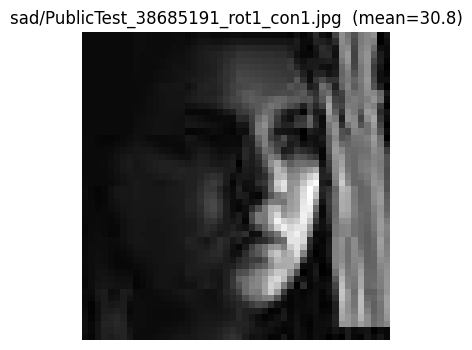

sad/PublicTest_53469582.jpg  (mean=33.3)


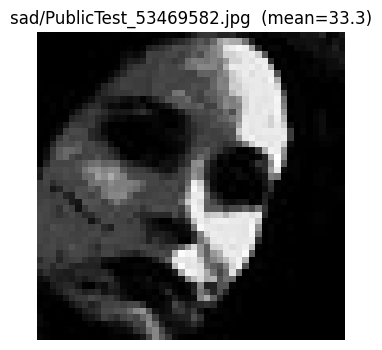

sad/PublicTest_53469582_con1.jpg  (mean=33.1)


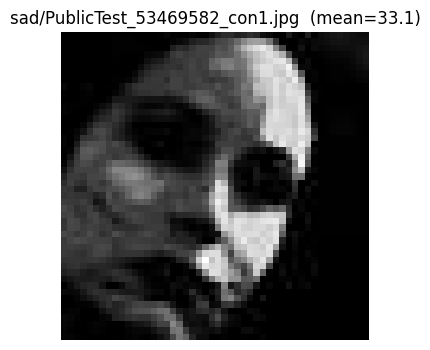

sad/PublicTest_53469582_rot1.jpg  (mean=32.7)


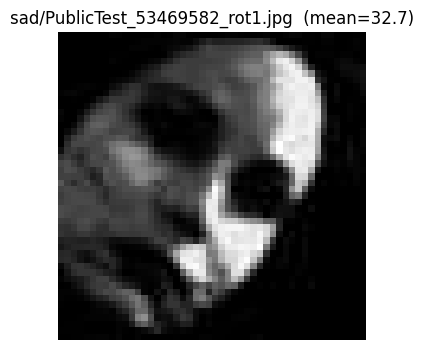

sad/PublicTest_7226402.jpg  (mean=24.8)


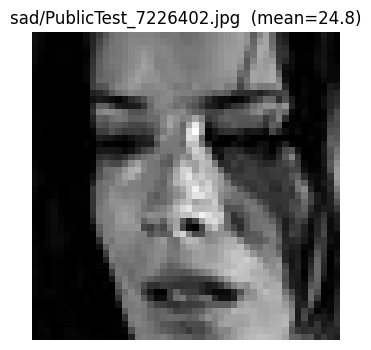

sad/PublicTest_7226402_rot1.jpg  (mean=23.8)


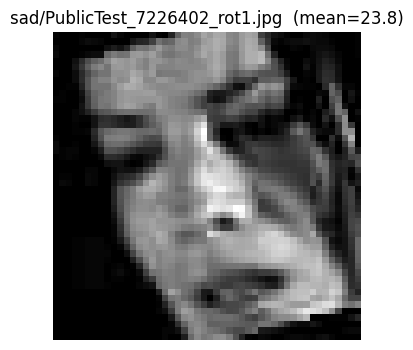

sad/PublicTest_7226402_rot1_con1.jpg  (mean=23.5)


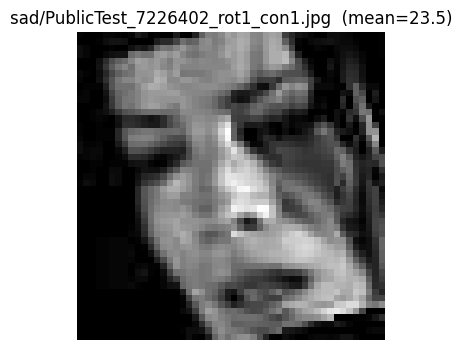

sad/PublicTest_75763309.jpg  (mean=20.5)


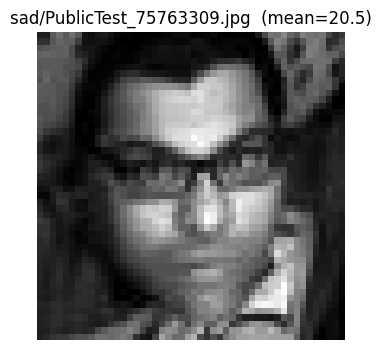

sad/PublicTest_75763309_rot1.jpg  (mean=18.3)


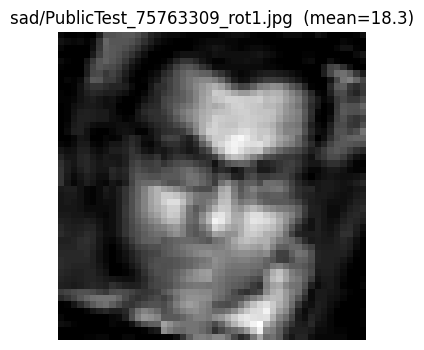

sad/PublicTest_75763309_rot1_con1.jpg  (mean=18.7)


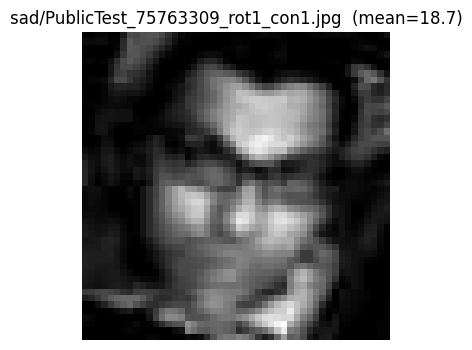

sad/PublicTest_83014731.jpg  (mean=236.9)


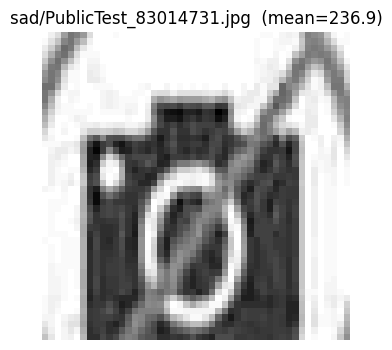

sad/cropped_emotions.141739_rot1.png  (mean=32.9)


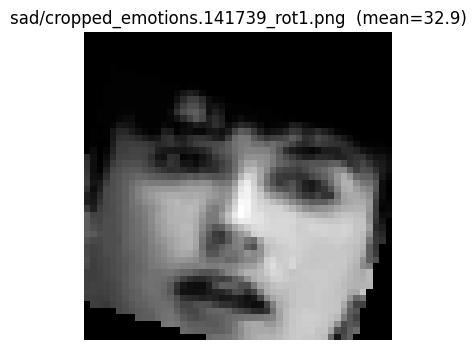

sad/cropped_emotions.172105.png  (mean=24.6)


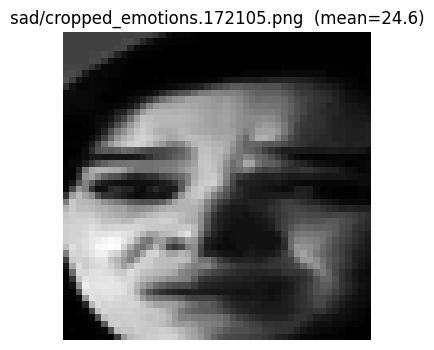

sad/cropped_emotions.172105_rot1.png  (mean=24.1)


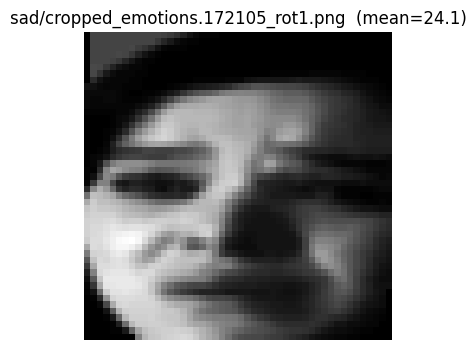

sad/cropped_emotions.499145.png  (mean=33.3)


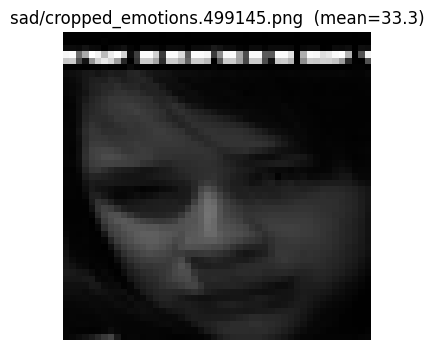

sad/cropped_emotions.499145_con1.png  (mean=32.9)


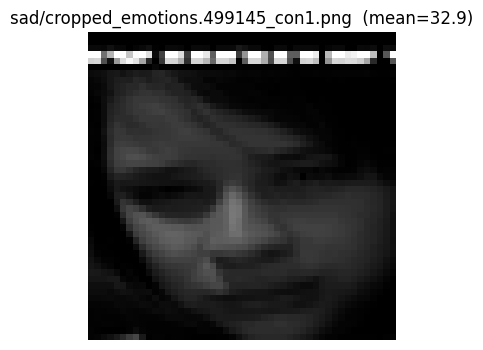

sad/cropped_emotions.499145_rot1.png  (mean=32.0)


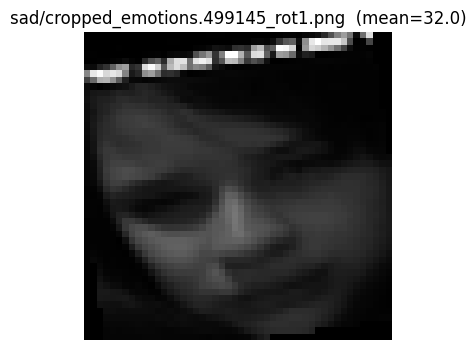

sad/cropped_emotions.499322.png  (mean=34.7)


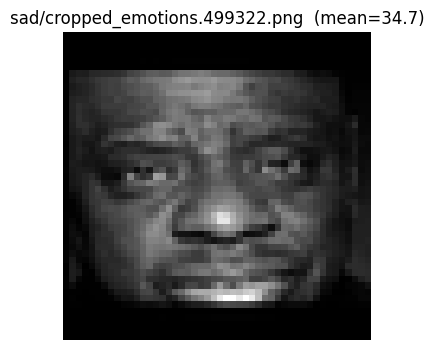

sad/cropped_emotions.499322_rot1.png  (mean=34.2)


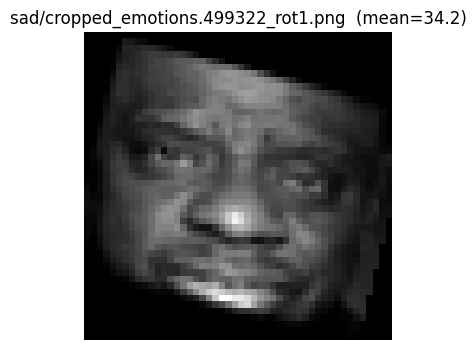

sad/cropped_emotions.499322_rot1_con1.png  (mean=33.5)


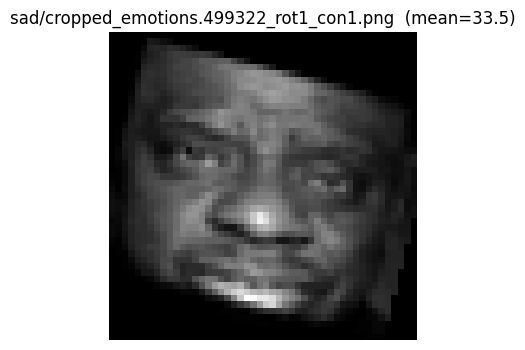

sad/cropped_emotions.6119.png  (mean=31.4)


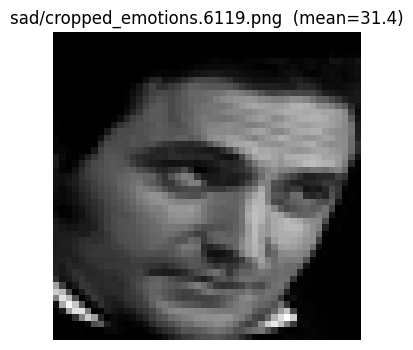

sad/cropped_emotions.6119_rot1.png  (mean=30.1)


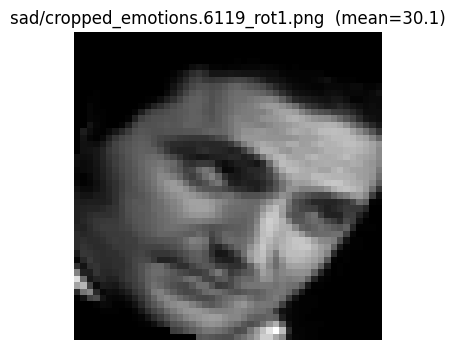

sad/cropped_emotions.6163.png  (mean=30.3)


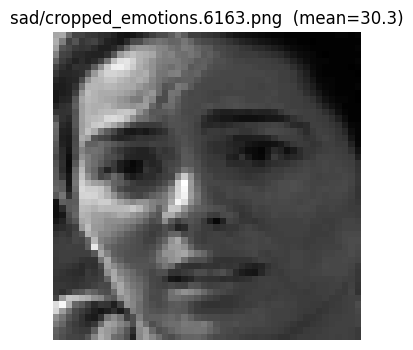

sad/cropped_emotions.6163_con1.png  (mean=29.8)


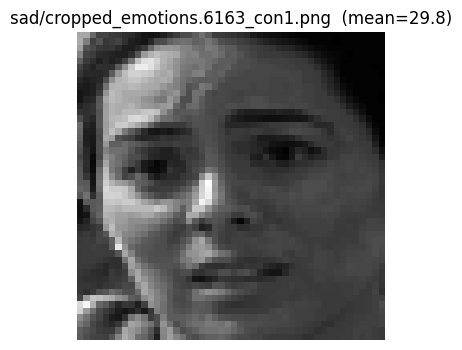

sad/cropped_emotions.6163_rot1.png  (mean=27.2)


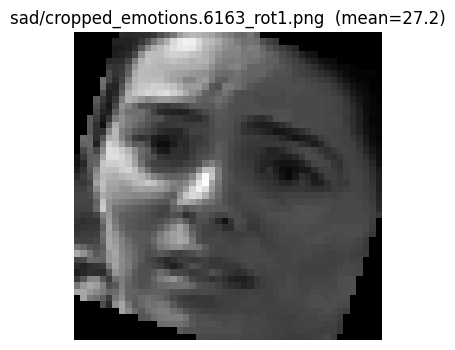

sad/cropped_emotions.6286_rot1.png  (mean=35.0)


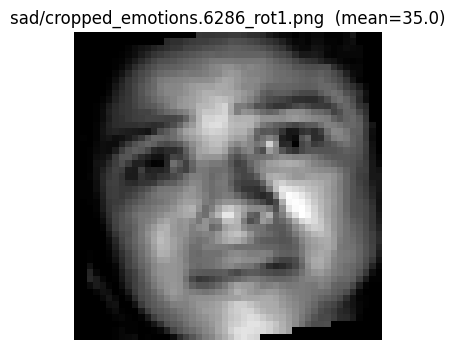

surprise/PrivateTest_23514058.jpg  (mean=31.1)


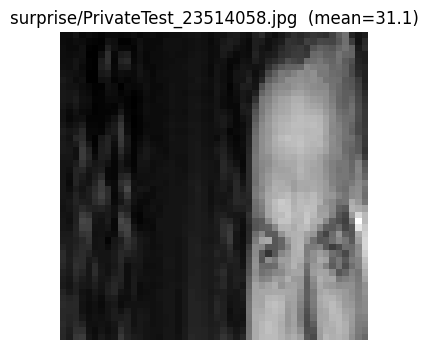

surprise/PrivateTest_23514058_rot1.jpg  (mean=26.1)


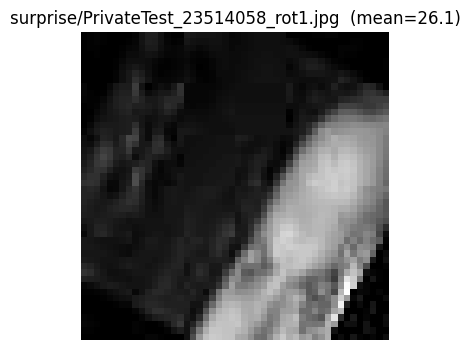

surprise/PrivateTest_23514058_rot1_con1.jpg  (mean=25.6)


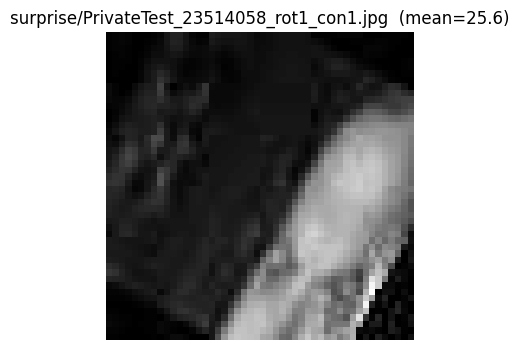

surprise/PrivateTest_23514058_rot1_con1_rot1.jpg  (mean=24.4)


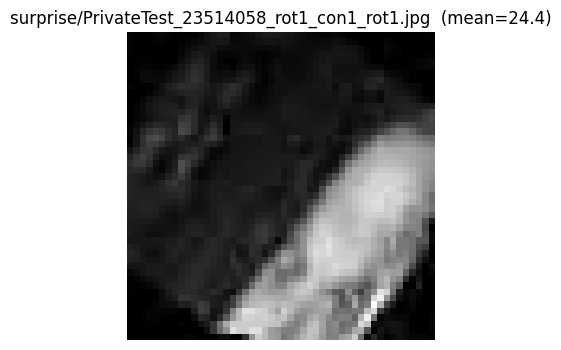

surprise/PrivateTest_23514058_rot1_rot1.jpg  (mean=25.8)


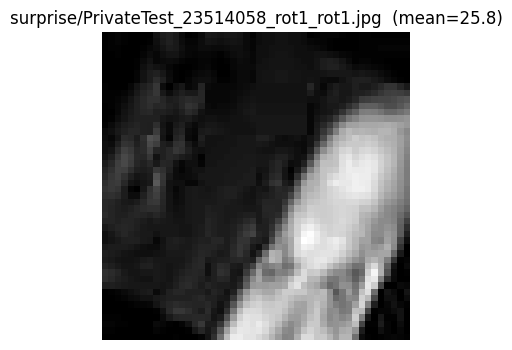

surprise/PrivateTest_23514058_rot2.jpg  (mean=26.2)


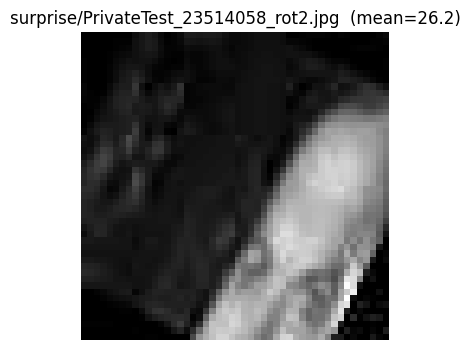

surprise/PrivateTest_57200649.jpg  (mean=244.8)


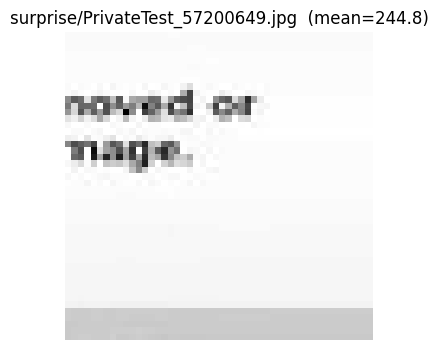

surprise/PrivateTest_57200649_rot1.jpg  (mean=220.5)


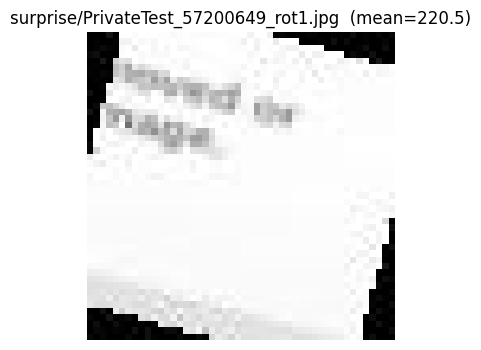

surprise/PrivateTest_58393533_bright1.jpg  (mean=235.3)


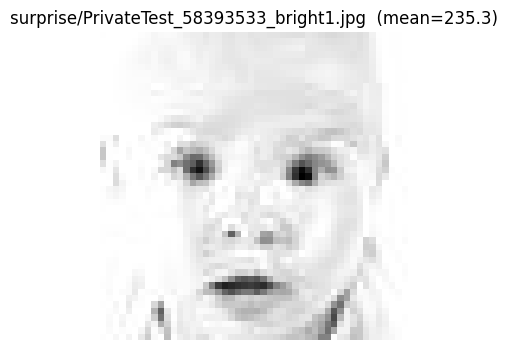

surprise/PrivateTest_94417003_bright1.jpg  (mean=247.2)


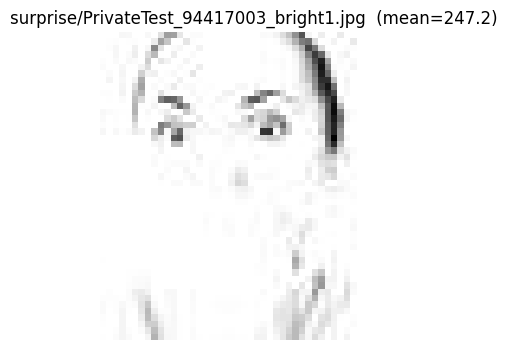

surprise/PublicTest_15712657_bright1.jpg  (mean=246.1)


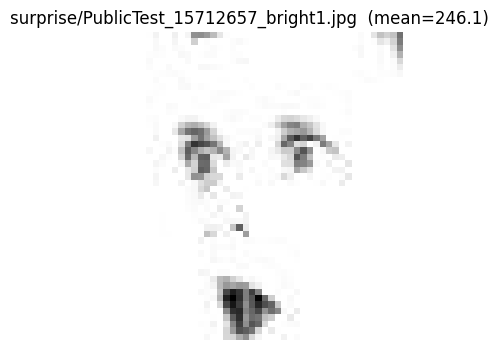

surprise/PublicTest_1709990_rot2_con1_bright1.jpg  (mean=227.5)


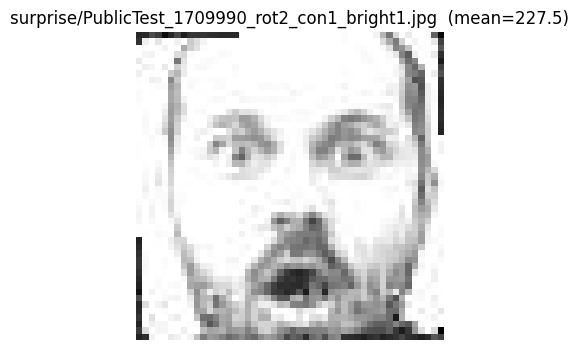

surprise/PublicTest_34645495_bright1.jpg  (mean=237.7)


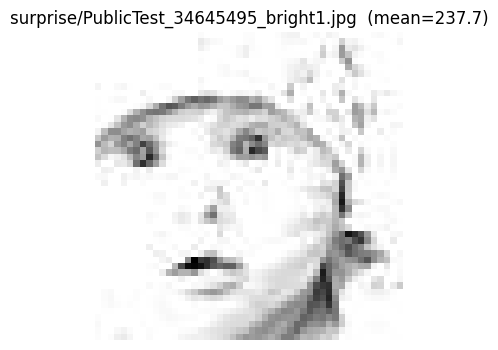

surprise/PublicTest_34645495_bright1_rot1.jpg  (mean=233.5)


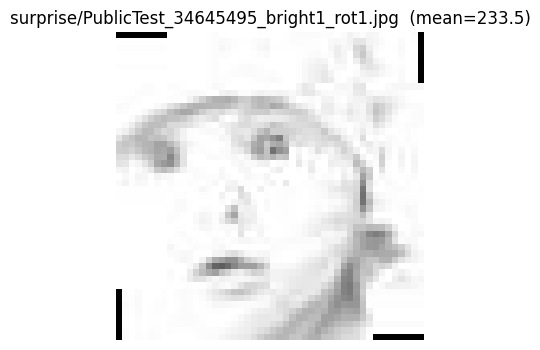

surprise/PublicTest_34990545_rot2_bright1.jpg  (mean=225.6)


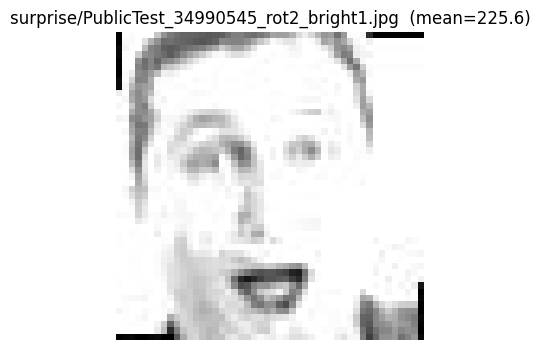

surprise/PublicTest_53795000.jpg  (mean=17.0)


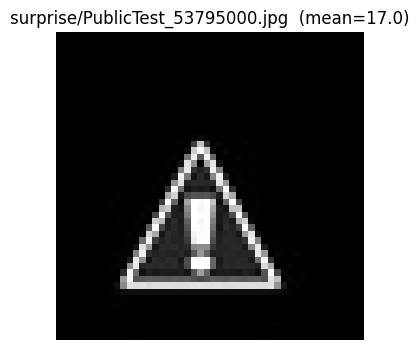

surprise/PublicTest_53795000_rot1.jpg  (mean=17.2)


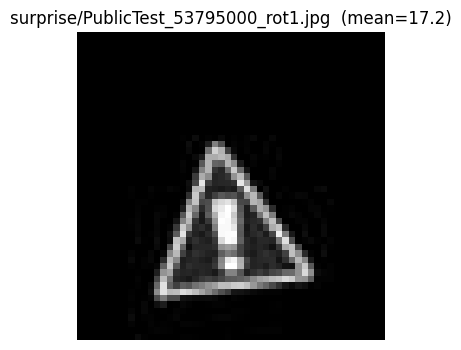

surprise/PublicTest_53795000_rot1_rot1.jpg  (mean=17.2)


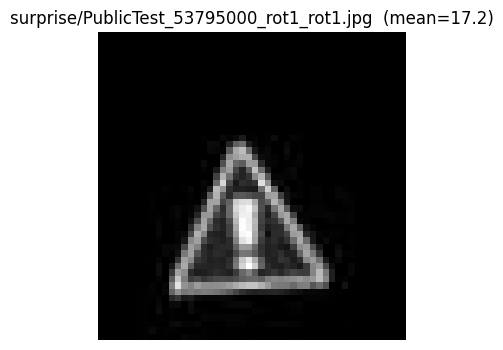

surprise/PublicTest_53795000_rot2.jpg  (mean=17.2)


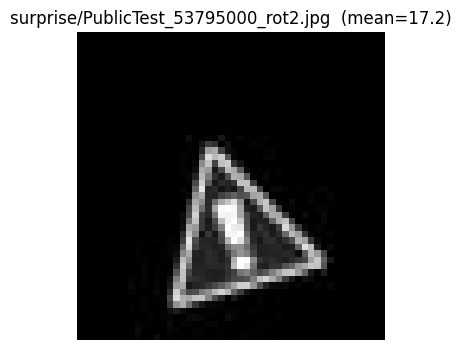

surprise/PublicTest_53795000_rot2_con1.jpg  (mean=16.5)


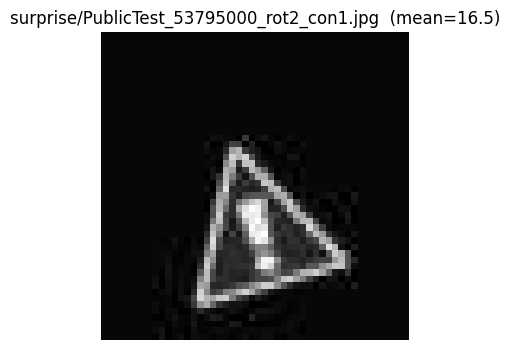

surprise/PublicTest_53795000_rot2_con1_rot1.jpg  (mean=15.8)


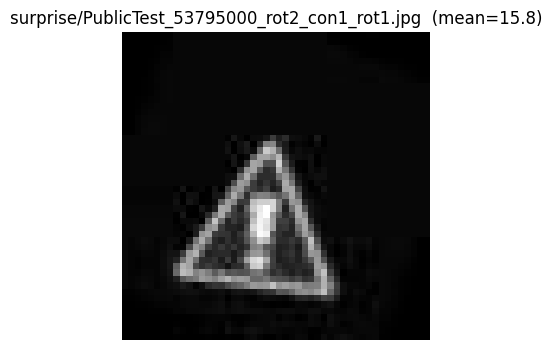

surprise/PublicTest_5954279_con1_bright1.jpg  (mean=242.0)


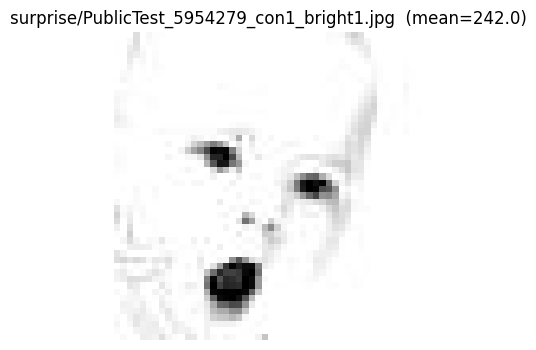

surprise/cropped_emotions.260736~12fffff_con1_bright1.png  (mean=231.6)


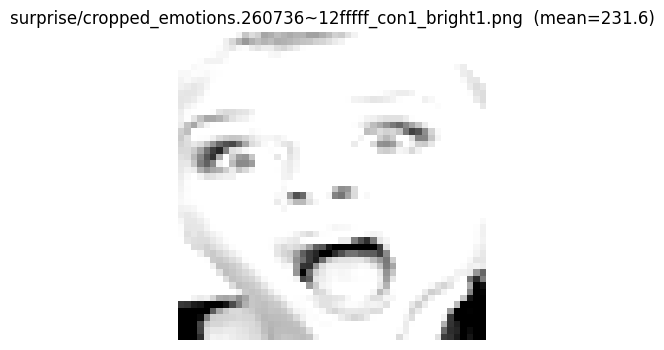

surprise/cropped_emotions.261927~12fffff_rot1_bright1.png  (mean=29.3)


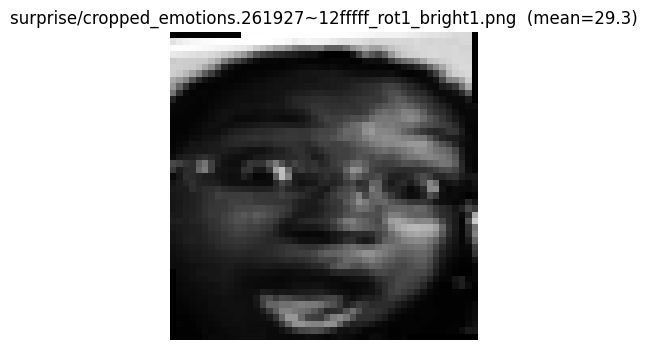

surprise/cropped_emotions.261927~12fffff_rot1_bright1_rot1.png  (mean=28.3)


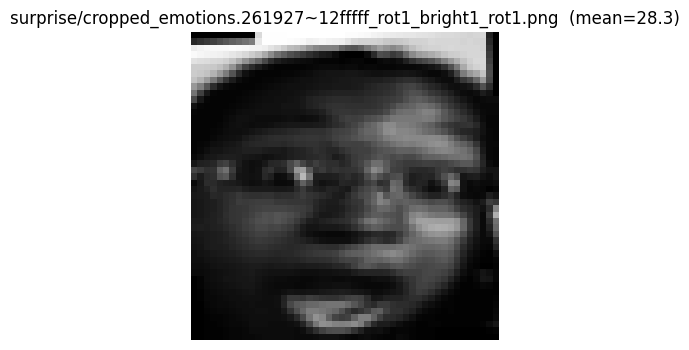

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def show_and_print_threshold_images(
    input_dir='path/to/images',
    low_thresh=35,
    high_thresh=220
):
    """
    For each subfolder in input_dir, finds images whose mean intensity
    is < low_thresh or > high_thresh, prints "folder/filename" and then
    displays each image one by one.
    """

    labels = ['neutral', 'sad', 'surprise']

    for label in labels:
        folder = os.path.join(input_dir, label)
        if not os.path.isdir(folder):
            continue

        for fname in sorted(os.listdir(folder)):
            if not fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                continue
            path = os.path.join(folder, fname)
            try:
                img = Image.open(path).convert('L')
                intensity = np.array(img).mean()
            except Exception as e:
                print(f"Skipping {label}/{fname}: {e}")
                continue

            if intensity < low_thresh or intensity > high_thresh:
                # Print the relative path (title)
                title = f"{label}/{fname}  (mean={intensity:.1f})"
                print(title)

                # Display the image
                plt.figure(figsize=(4,4))
                plt.imshow(img, cmap='gray')
                plt.title(title)
                plt.axis('off')
                plt.show()

if __name__ == "__main__":
    show_and_print_threshold_images()

In [ ]:
import os
import numpy as np
from PIL import Image

def delete_extreme_intensity_images(
    input_dir='path/to/images',
    low_thresh=0.0,
    high_thresh=253.5
):
    """
    Recursively scans each subfolder under input_dir, computes the mean grayscale
    intensity of each image, and deletes any image whose mean is exactly low_thresh
    or strictly greater than high_thresh.
    """
    for label in os.listdir(input_dir):
        folder = os.path.join(input_dir, label)
        if not os.path.isdir(folder):
            continue

        for fname in os.listdir(folder):
            if not fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                continue

            path = os.path.join(folder, fname)
            try:
                img = Image.open(path).convert('L')
                mean_intensity = np.array(img).mean()
            except Exception as e:
                print(f"Skipping {label}/{fname}: {e}")
                continue

            if mean_intensity == low_thresh or mean_intensity > high_thresh:
                try:
                    os.remove(path)
                    print(f"Deleted {label}/{fname} (mean={mean_intensity:.2f})")
                except Exception as e:
                    print(f"Failed to delete {label}/{fname}: {e}")

if __name__ == "__main__":
    delete_extreme_intensity_images()

Deleted neutral/0a973cad50ced47334ed0b891d4221c0cc3eb6473423712ffcd8a39ef_bright1.jpg (mean=0.00)
Deleted neutral/0aad0db6c56d5f49da3b365955df2538418fa05b614f5ef8e1b58cbaf_rot1_bright1.jpg (mean=0.00)
Deleted neutral/0ab024021359357c86296894647f2fd790e37d13e1ee2c13a6ad6fdef_bright1.jpg (mean=0.00)
Deleted neutral/0ad590c140cbbbdd6c77e5077214349d99b9632ba9e258198b519441f_con1_bright1.jpg (mean=0.00)
Deleted neutral/0aecb87fe064e120f73c7b3d41df03a9c91ba16ac36f09e865e70c34f_rot1_bright1.jpg (mean=0.00)
Deleted neutral/0af03227160a2da58befcd7574e3a0832242c9f52563757d3d9fe18bf_bright1.jpg (mean=0.00)
Deleted neutral/0af66dc103c0d6a062a64a74863aa05fa515124e06211796da1a6f5ff_bright1.jpg (mean=0.00)
Deleted neutral/0b199af178c30766d281294f47ac3ae6c72f4c8f30edef552f70fd35f_rot1_con1_bright1.jpg (mean=0.00)
Deleted neutral/0b22737d96e72023eb765815ed4168bf8c216154d89b0055323b11baf_bright1.jpg (mean=0.00)
Deleted neutral/0b35a27261024be63845fe4bed392e7336059e01045e5086d07863d7f_rot1_bright1.jpeg (